<a href="https://colab.research.google.com/github/waytoakash/waytoakash/blob/main/Master_Script_Akash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**⏯ Authorization & Import Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import datetime
import dateutil.parser
import re
from datetime import date

# from dateutil.relativedelta import relativedelta
from functools import reduce
from datetime import datetime
from datetime import date, timedelta

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

import gspread
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe

Mounted at /content/drive


In [ ]:
def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.date

def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.time

def parseDateTimeFormatTZ(row):
  return dateutil.parser.parse(row)

def cleanText(row):
  return row.str.upper().str.strip()

def getDump(mastermerge, dump_name,start_date, end_date):
  start_date = pd.to_datetime(start_date).date()
  end_date = pd.to_datetime(end_date).date()
  file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/"
  reg = re.compile(".+" + dump_name+".csv")

  for (root, dirs, files) in os.walk(file_path):    
      for file in files:
        path = os.path.join(root, file)
        date = str(path).split('/')[7:][0]
        date = pd.to_datetime(date).date()        
        
        if bool(re.match(reg, path)) & (date >= start_date) & (date <= end_date):                 
          temp = pd.read_csv(path,parse_dates=True)        
          temp['DumpDate'] = date
          read_dump_name = str(path).split('/')[9:][0]
          print(read_dump_name + " on Date:: " + str(date) +  " Dump of shape:: " + str(temp.shape) + " read from path:: "+ path)
          mastermerge = mastermerge.append(temp)

  mastermerge[['DumpDate']] = mastermerge[['DumpDate']].apply(changeDateFormat)
  return mastermerge

#📕 **PIP Report_Fortnightly**

##**Data Import and Processing**

In [ ]:
# Jan'22 TSM Payout Data
wb = gc.open_by_key("1xS_Pq0PMgeBXmOJmVx40ofxjCjmiJe00kRhP5lhSlKQ")
ws = wb.worksheet("Jan")
df1 = ws.get_all_values()
TSM_Jan = pd.DataFrame(df1)
TSM_Jan.columns = TSM_Jan.iloc[0]
TSM_Jan = TSM_Jan.drop(0)
TSM_Jan = TSM_Jan.loc[~(TSM_Jan['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Jan['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Jan['Emp Status']=='Inactive')
& ~(TSM_Jan['Emp Status']=='In Training')& ~(TSM_Jan['Emp Status']=='On Hold')]

TSM_Jan = TSM_Jan[['Month', 'TSM mail-id', 'Emp City', 'Role', 'Team','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'Reporting Date',
'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]

# Nov'21 TSM Payout Data
wb = gc.open_by_key("1xS_Pq0PMgeBXmOJmVx40ofxjCjmiJe00kRhP5lhSlKQ")
ws = wb.worksheet("Dec")
df2 = ws.get_all_values()
TSM_Dec = pd.DataFrame(df2)
TSM_Dec.columns = TSM_Dec.iloc[0]
TSM_Dec = TSM_Dec.drop(0)
TSM_Dec = TSM_Dec.loc[~(TSM_Dec['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Dec['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Dec['Emp Status']=='Inactive')]
TSM_Dec = TSM_Dec[['Month', 'TSM mail-id', 'Emp City', 'Role', 'Team','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'Reporting Date',
'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]

# Oct'21 TSM Data Leaderboard
wb = gc.open_by_key("1xS_Pq0PMgeBXmOJmVx40ofxjCjmiJe00kRhP5lhSlKQ")
ws = wb.worksheet("Nov")
df3 = ws.get_all_values()
TSM_Nov = pd.DataFrame(df3)
TSM_Nov.columns = TSM_Nov.iloc[0]
TSM_Nov = TSM_Nov.drop(0)
TSM_Nov = TSM_Nov.loc[~(TSM_Nov['Emp Status']=='Inactive') & ~(TSM_Nov['In PIP/ On Notice Status']=='On Notice')]
TSM_Nov = TSM_Nov[['Month', 'TSM mail-id', 'Emp City', 'Role', 'Team','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'Reporting Date',
       'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]

In [ ]:
TSM_Nov[TSM_Nov['Emp Status']=='Inactive'].value_counts()

Series([], dtype: int64)

In [ ]:
TSM_Jan['DOJ'] = pd.to_datetime(TSM_Jan['DOJ'])
TSM_Jan['Reporting Date'] = pd.to_datetime(TSM_Jan['Reporting Date'])
TSM_Jan['Tenure'] = pd.to_numeric(TSM_Jan['Tenure'])
TSM_Jan['Target'] = pd.to_numeric(TSM_Jan['Target'])
TSM_Jan['IP (HO)'] = pd.to_numeric(TSM_Jan['IP (HO)'])

TSM_Dec['DOJ'] = pd.to_datetime(TSM_Dec['DOJ'])
TSM_Dec['Reporting Date'] = pd.to_datetime(TSM_Dec['Reporting Date'])
TSM_Dec['Tenure'] = pd.to_numeric(TSM_Dec['Tenure'])
TSM_Dec['Target'] = pd.to_numeric(TSM_Dec['Target'])
TSM_Dec['IP (HO)'] = pd.to_numeric(TSM_Dec['IP (HO)'])

TSM_Nov['DOJ'] = pd.to_datetime(TSM_Nov['DOJ'])
TSM_Nov['Reporting Date'] = pd.to_datetime(TSM_Nov['Reporting Date'])
TSM_Nov['Tenure'] = pd.to_numeric(TSM_Nov['Tenure'])
TSM_Nov['Target'] = pd.to_numeric(TSM_Nov['Target'])
TSM_Nov['IP (HO)'] = pd.to_numeric(TSM_Nov['IP (HO)'])

In [ ]:
Jan22 = TSM_Jan[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'Reporting Date','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]
Jan22.rename({'Reporting Date':'DOR'}, inplace=True, axis =1)

Dec21 = TSM_Dec[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'Reporting Date','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]
Dec21.rename({'Reporting Date':'DOR'}, inplace=True, axis =1)

Nov21 = TSM_Nov[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'Reporting Date','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]
Nov21.rename({'Reporting Date':'DOR'}, inplace=True, axis =1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
conditions = [(Jan22['Tenure'] >= 45),(Jan22['Tenure'] <45)]
values = ['>45','<45']
Jan22['Bucket'] = np.select(conditions,values)
Jan22 = Jan22[Jan22.Bucket == ">45"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Last 30 Day calculation

Jan22['Target18'] = Jan22['Target']/30*20

In [ ]:
morethan45day=pd.merge(Jan22,Dec21,how="left",on="TSM mail-id").fillna(0)

In [ ]:
morethan45day

,TSM mail-id,Reporting supervisor Mail ID_x,Emp Status_x,Emp City_x,DOJ_x,DOR_x,Tenure_x,Target_x,IP (HO)_x,Achievement % (HO)_x,Bucket,Target18,Reporting supervisor Mail ID_y,Emp Status_y,Emp City_y,DOJ_y,DOR_y,Tenure_y,Target_y,IP (HO)_y,Achievement % (HO)_y
0,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Active,Gurgaon,2019-11-04,2020-05-08,603.0,1900,247.36,13.02%,>45,1266.666667,nischaya.gupta@nobroker.in,Active,Gurgaon,2019-11-04 00:00:00,2020-05-08 00:00:00,603.0,1900.0,991.0,52.16%
1,rajarajan.s@nobroker.in,ganesh.selvamani1@nobroker.in,Active,Chennai,2019-11-27,2020-05-08,603.0,1750,0.00,0.00%,>45,1166.666667,ganesh.selvamani1@nobroker.in,Active,Chennai,2019-11-27 00:00:00,2020-05-08 00:00:00,603.0,2400.0,2224.2,92.68%
2,mohamed.aasath@nobroker.in,ganesh.selvamani1@nobroker.in,Active,Chennai,2019-12-26,2020-05-08,603.0,1750,0.00,0.00%,>45,1166.666667,ganesh.selvamani1@nobroker.in,Active,Chennai,2019-12-26 00:00:00,2020-05-08 00:00:00,603.0,2000.0,2224.2,111.21%
3,aditi.singh@nobroker.in,manish.negi1@nobroker.in,Active,Gurgaon,2020-03-16,2020-05-08,603.0,1800,247.36,13.74%,>45,1200.000000,manish.negi1@nobroker.in,Active,Gurgaon,2020-03-16 00:00:00,2020-05-08 00:00:00,603.0,1800.0,991.0,55.06%
4,shreyans.arya@nobroker.in,rishabh.goel@nobroker.in,Active,Noida,2020-04-06,2020-05-08,603.0,2100,0.00,0.00%,>45,1400.000000,rishabh.goel@nobroker.in,Active,Noida,2020-04-06 00:00:00,2020-05-08 00:00:00,603.0,1980.0,915.0,46.21%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,pallavi.khattar@nobroker.in,vishal.shukla@nobroker.in,Active,Pune,2021-10-25,2021-11-09,53.0,1500,327.60,21.84%,>45,1000.000000,vishal.shukla@nobroker.in,Active,Pune,2021-10-25 00:00:00,2021-11-09 00:00:00,53.0,800.0,487.0,60.88%
89,luv.maini@nobroker.in,sahil.arora@nobroker.in,Active,Noida,2021-10-25,2021-11-09,53.0,1200,0.00,0.00%,>45,800.000000,sahil.arora@nobroker.in,Active,Noida,2021-10-25 00:00:00,2021-11-09 00:00:00,53.0,480.0,0.0,0.00%
90,praveen.panikar@nobroker.in,ankit.nagda@nobroker.in,Active,Mumbai,2021-10-25,2021-11-11,51.0,684,86.40,12.63%,>45,456.000000,ankit.nagda@nobroker.in,Active,Mumbai,2021-10-25 00:00:00,2021-11-11 00:00:00,51.0,230.0,78.0,33.91%
91,arunesh.mishra@nobroker.in,piyush.wagh@nobroker.in,Active,Navi Mumbai,2021-11-02,2021-11-16,46.0,1000,0.00,0.00%,>45,666.666667,piyush.wagh@nobroker.in,Active,Navi Mumbai,2021-11-02 00:00:00,2021-11-16 00:00:00,46.0,1500.0,24.0,1.60%


In [ ]:
morethan45day['Target12'] = (morethan45day['Target_y']/30)*10
morethan45day['IP12'] = (morethan45day['IP (HO)_y']/30)*10

In [ ]:
morethan45day['Prorated Monthly Target'] = morethan45day['Target18'] + morethan45day['Target12']
morethan45day['Prorated Monthly IP(HO)'] = morethan45day['IP (HO)_x'] + morethan45day['IP12']
morethan45day['Prorated Monthly Achievement'] = morethan45day['Prorated Monthly IP(HO)']/morethan45day['Prorated Monthly Target']

In [ ]:
final30 = morethan45day[['TSM mail-id','Reporting supervisor Mail ID_x','Emp City_x','Tenure_x','Prorated Monthly Target',	'Prorated Monthly IP(HO)',	'Prorated Monthly Achievement']]
final30.head()

,TSM mail-id,Reporting supervisor Mail ID_x,Emp City_x,Tenure_x,Prorated Monthly Target,Prorated Monthly IP(HO),Prorated Monthly Achievement
0,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Gurgaon,603.0,1900.000000,577.693333,0.304049
1,rajarajan.s@nobroker.in,ganesh.selvamani1@nobroker.in,Chennai,603.0,1966.666667,741.400000,0.376983
2,mohamed.aasath@nobroker.in,ganesh.selvamani1@nobroker.in,Chennai,603.0,1833.333333,741.400000,0.404400
3,aditi.singh@nobroker.in,manish.negi1@nobroker.in,Gurgaon,603.0,1800.000000,577.693333,0.320941
4,shreyans.arya@nobroker.in,rishabh.goel@nobroker.in,Noida,603.0,2060.000000,305.000000,0.148058


In [ ]:
# Last 2 months calculations

novoctmerge = pd.merge(Dec21,Nov21,how="left",on="TSM mail-id",suffixes=("_dec","_nov")).fillna(0)

In [ ]:
novoctmerge.columns

Index(['TSM mail-id', 'Reporting supervisor Mail ID_dec', 'Emp Status_dec',
       'Emp City_dec', 'DOJ_dec', 'DOR_dec', 'Tenure_dec', 'Target_dec',
       'IP (HO)_dec', 'Achievement % (HO)_dec',
       'Reporting supervisor Mail ID_nov', 'Emp Status_nov', 'Emp City_nov',
       'DOJ_nov', 'DOR_nov', 'Tenure_nov', 'Target_nov', 'IP (HO)_nov',
       'Achievement % (HO)_nov'],
      dtype='object', name=0)

In [ ]:
novoctmerge['Last 2 Month Target'] = novoctmerge['Target_dec'] + novoctmerge['Target_nov']
novoctmerge['Last 2 Month IP(HO)'] = novoctmerge['IP (HO)_dec'] + novoctmerge['IP (HO)_nov']
novoctmerge['Last 2 Month Achievement'] = novoctmerge['Last 2 Month IP(HO)']/novoctmerge['Last 2 Month Target']

In [ ]:
novoctmerge.head()

,TSM mail-id,Reporting supervisor Mail ID_dec,Emp Status_dec,Emp City_dec,DOJ_dec,DOR_dec,Tenure_dec,Target_dec,IP (HO)_dec,Achievement % (HO)_dec,Reporting supervisor Mail ID_nov,Emp Status_nov,Emp City_nov,DOJ_nov,DOR_nov,Tenure_nov,Target_nov,IP (HO)_nov,Achievement % (HO)_nov,Last 2 Month Target,Last 2 Month IP(HO),Last 2 Month Achievement
0,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Active,Gurgaon,2019-11-04,2020-05-08 00:00:00,603.0,1900,991.0,52.16%,nischaya.gupta@nobroker.in,Active,Gurgaon,2019-11-04 00:00:00,2020-05-08 00:00:00,603.0,1900.0,50.0,2.63%,3800.0,1041.0,0.273947
1,rajarajan.s@nobroker.in,ganesh.selvamani1@nobroker.in,Active,Chennai,2019-11-27,2020-05-08 00:00:00,603.0,2400,2224.2,92.68%,prabish.kumar@nobroker.in,Active,Chennai,2019-11-27 00:00:00,2020-05-08 00:00:00,603.0,2500.0,0.0,0.00%,4900.0,2224.2,0.453918
2,mohamed.aasath@nobroker.in,ganesh.selvamani1@nobroker.in,Active,Chennai,2019-12-26,2020-05-08 00:00:00,603.0,2000,2224.2,111.21%,prabish.kumar@nobroker.in,Active,Chennai,2019-12-26 00:00:00,2020-05-08 00:00:00,603.0,2300.0,0.0,0.00%,4300.0,2224.2,0.517256
3,shilpa.sharma@nobroker.in,manish.negi1@nobroker.in,Active,Gurgaon,2020-02-17,2020-05-08 00:00:00,603.0,1900,427.5,22.50%,manish.negi1@nobroker.in,Active,Gurgaon,2020-02-17 00:00:00,2020-05-08 00:00:00,603.0,1900.0,894.0,47.05%,3800.0,1321.5,0.347763
4,aditi.singh@nobroker.in,manish.negi1@nobroker.in,Active,Gurgaon,2020-03-16,2020-05-08 00:00:00,603.0,1800,991.0,55.06%,manish.negi1@nobroker.in,Active,Gurgaon,2020-03-16 00:00:00,2020-05-08 00:00:00,603.0,1800.0,50.0,2.78%,3600.0,1041.0,0.289167


In [ ]:
final60 = novoctmerge[['TSM mail-id','Reporting supervisor Mail ID_nov','Emp City_nov','Last 2 Month Target','Last 2 Month IP(HO)', 'Last 2 Month Achievement']]
final60.head()

,TSM mail-id,Reporting supervisor Mail ID_nov,Emp City_nov,Last 2 Month Target,Last 2 Month IP(HO),Last 2 Month Achievement
0,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Gurgaon,3800.0,1041.0,0.273947
1,rajarajan.s@nobroker.in,prabish.kumar@nobroker.in,Chennai,4900.0,2224.2,0.453918
2,mohamed.aasath@nobroker.in,prabish.kumar@nobroker.in,Chennai,4300.0,2224.2,0.517256
3,shilpa.sharma@nobroker.in,manish.negi1@nobroker.in,Gurgaon,3800.0,1321.5,0.347763
4,aditi.singh@nobroker.in,manish.negi1@nobroker.in,Gurgaon,3600.0,1041.0,0.289167


In [ ]:
finalmerge = pd.merge(final30,final60,how="left",on="TSM mail-id").fillna(0)
finalmerge.columns

Index(['TSM mail-id', 'Reporting supervisor Mail ID_x', 'Emp City_x',
       'Tenure_x', 'Prorated Monthly Target', 'Prorated Monthly IP(HO)',
       'Prorated Monthly Achievement', 'Reporting supervisor Mail ID_nov',
       'Emp City_nov', 'Last 2 Month Target', 'Last 2 Month IP(HO)',
       'Last 2 Month Achievement'],
      dtype='object', name=0)

In [ ]:
final = finalmerge[['TSM mail-id','Reporting supervisor Mail ID_x','Emp City_x',	'Tenure_x','Prorated Monthly Target',	'Prorated Monthly IP(HO)',	'Prorated Monthly Achievement',
                    'Last 2 Month Target',	'Last 2 Month IP(HO)',	'Last 2 Month Achievement']]

In [ ]:
final.rename({'Reporting supervisor Mail ID_x':'Reporting supervisor Mail ID','Emp City_x':'Emp City','Tenure_x':'Tenure'},inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_PIP = final[final['Prorated Monthly Achievement'] <= 0.40]

In [ ]:
final_PIP # Final Report

,TSM mail-id,Reporting supervisor Mail ID,Emp City,Tenure,Prorated Monthly Target,Prorated Monthly IP(HO),Prorated Monthly Achievement,Last 2 Month Target,Last 2 Month IP(HO),Last 2 Month Achievement
0,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Gurgaon,603.0,1900.000000,577.693333,0.304049,3800.0,1041.0,0.273947
1,rajarajan.s@nobroker.in,ganesh.selvamani1@nobroker.in,Chennai,603.0,1966.666667,741.400000,0.376983,4900.0,2224.2,0.453918
3,aditi.singh@nobroker.in,manish.negi1@nobroker.in,Gurgaon,603.0,1800.000000,577.693333,0.320941,3600.0,1041.0,0.289167
4,shreyans.arya@nobroker.in,rishabh.goel@nobroker.in,Noida,603.0,2060.000000,305.000000,0.148058,3960.0,2115.0,0.534091
5,prince.shah@nobroker.in,suvir.naik@nobroker.in,Mumbai,540.0,855.000000,251.500000,0.294152,1855.0,510.5,0.275202
...,...,...,...,...,...,...,...,...,...,...
88,pallavi.khattar@nobroker.in,vishal.shukla@nobroker.in,Pune,53.0,1266.666667,489.933333,0.386789,1300.0,487.0,0.374615
89,luv.maini@nobroker.in,sahil.arora@nobroker.in,Noida,53.0,960.000000,0.000000,0.000000,480.0,0.0,0.000000
90,praveen.panikar@nobroker.in,ankit.nagda@nobroker.in,Mumbai,51.0,532.666667,112.400000,0.211014,230.0,78.0,0.339130
91,arunesh.mishra@nobroker.in,piyush.wagh@nobroker.in,Navi Mumbai,46.0,1166.666667,8.000000,0.006857,1840.0,24.0,0.013043


In [ ]:
final_PIP.to_csv("PIP Report Jan fortnightly v1.csv")

In [ ]:
# bins = [0.0,0.01,0.03,0.06,0.08,0.1,0.2,0.3,0.5,0.8,1,2,3]
# labels = bins[1:]
# master['entryBin'] = pd.cut(master['entry_per_flat'], bins ,labels=labels)

In [ ]:
bins = [0.0,0.01,0.20,0.30,0.40,0.50]
labels = bins[1:]
final['Achievement_Bin'] = pd.cut(final['Achievement30'],bins,labels==labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
final['Achievement_Bin'].value_counts()

(0.01, 0.2]    35
(0.3, 0.4]     15
(0.2, 0.3]     15
(0.0, 0.01]     1
(0.4, 0.5]      0
Name: Achievement_Bin, dtype: int64

In [ ]:
final.head(5)

,TSM mail-id,Target30,IP30,Achievement30,Target60,IP60,Achievement60,Achievement_Bin
0,abhinaya.singh@nobroker.in,1650.0,225.6,0.136727,3300.0,1467.0,0.444545,"(0.01, 0.2]"
1,abhishek.singh1@nobroker.in,2000.0,555.6,0.277800,3850.0,1153.0,0.299481,"(0.2, 0.3]"
2,abhranil.dey@nobroker.in,1040.0,377.4,0.362885,1300.0,591.0,0.454615,"(0.3, 0.4]"
3,abrar.chauhan@nobroker.in,720.0,62.8,0.087222,1420.0,157.0,0.110563,"(0.01, 0.2]"
6,aishwarye.giri@nobroker.in,720.0,81.6,0.113333,1420.0,262.0,0.184507,"(0.01, 0.2]"


#📕**PIP Report Monthly**

In [ ]:
# Nov'21 TSM Payout Data
wb = gc.open_by_key("12LQMaBOMSQ_6KB0v-C2a4Y6_rSTwsUas5EUThKv9Vn8")
ws = wb.worksheet("Static Target IP")
df2 = ws.get_all_values()
TSM_Oct = pd.DataFrame(df2)
TSM_Oct.columns = TSM_Oct.iloc[0]
TSM_Oct = TSM_Oct.drop(0)
TSM_Oct = TSM_Oct.loc[TSM_Oct['Month']=="11"]
                      
TSM_Oct = TSM_Oct.loc[~(TSM_Oct['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Oct['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Oct['Emp Status']=='Inactive')]

TSM_Oct = TSM_Oct[['Month', 'TSM mail-id', 'Emp City', 'Role', 'Team','Resource','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'DOR',
'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]


# Nov'21 TSM Payout Data
wb = gc.open_by_key("12LQMaBOMSQ_6KB0v-C2a4Y6_rSTwsUas5EUThKv9Vn8")
ws = wb.worksheet("Static Target IP")
df1 = ws.get_all_values()
TSM_Nov = pd.DataFrame(df1)
TSM_Nov.columns = TSM_Nov.iloc[0]
TSM_Nov = TSM_Nov.drop(0)
TSM_Nov = TSM_Nov.loc[TSM_Nov['Month']=="12"]

TSM_Nov = TSM_Nov.loc[~(TSM_Nov['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Nov['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Nov['Emp Status']=='Inactive')]
TSM_Nov = TSM_Nov[['Month', 'TSM mail-id', 'Emp City', 'Role', 'Team','Resource','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'DOR',
'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]
TSM_Nov

,Month,TSM mail-id,Emp City,Role,Team,Resource,Reporting supervisor Mail ID,Emp Status,DOJ,DOR,Tenure,In PIP/ On Notice Status,Target,IP (HO),Achievement % (HO)
278,12,apurba.das@nobroker.in,Gurgaon,Senior TSM,Sales,Referral,nischaya.gupta@nobroker.in,Active,11/4/2019,5/8/2020,603,,1900,745,39.21%
279,12,rajarajan.s@nobroker.in,Chennai,TSM,Mixed,Vendor,paily.chiranjeevi@nobroker.in,Active,11/27/2019,5/8/2020,603,,2400,2224.2,92.68%
281,12,mohamed.aasath@nobroker.in,Chennai,TSM,Mixed,Vendor,paily.chiranjeevi@nobroker.in,Active,12/26/2019,5/8/2020,603,,2000,2224.2,111.21%
283,12,shilpa.sharma@nobroker.in,Gurgaon,TSM,Sales,Campus,manish.negi1@nobroker.in,Active,2/17/2020,5/8/2020,603,,1900,427.5,22.50%
284,12,aditi.singh@nobroker.in,Gurgaon,TSM,Sales,Campus,manish.negi1@nobroker.in,Active,3/16/2020,5/8/2020,603,,1800,745,41.39%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,12,salil.krishna@nobroker.in,Navi Mumbai,TSM,B2C,Vendor,piyush.wagh@nobroker.in,Active,11/22/2021,12/8/2021,24,,500,0,0.00%
437,12,prateek.pathak@nobroker.in,Gurgaon,TSM,Sales,Referral,manish.chanchal@nobroker.in,Active,11/29/2021,12/15/2021,17,,0,0,0.00%
438,12,ankit.jawaharlal@nobroker.in,Navi Mumbai,TSM,B2C,Referral,amaan.lakhani@nobroker.in,Active,11/29/2021,12/12/2021,20,,0,0,0.00%
440,12,nilesh.dilip@nobroker.in,Navi Mumbai,TSM,B2C,Campus,amaan.lakhani@nobroker.in,Active,12/6/2021,,,,0,0,0.00%


In [ ]:
TSM_Nov['DOJ'] = pd.to_datetime(TSM_Nov['DOJ'])
TSM_Nov['DOR'] = pd.to_datetime(TSM_Nov['DOR'])
TSM_Nov['Tenure'] = pd.to_numeric(TSM_Nov['Tenure'])
TSM_Nov['Target'] = pd.to_numeric(TSM_Nov['Target'])
TSM_Nov['IP (HO)'] = pd.to_numeric(TSM_Nov['IP (HO)'])

TSM_Oct['DOJ'] = pd.to_datetime(TSM_Oct['DOJ'])
TSM_Oct['DOR'] = pd.to_datetime(TSM_Oct['DOR'])
TSM_Oct['Tenure'] = pd.to_numeric(TSM_Oct['Tenure'])
TSM_Oct['Target'] = pd.to_numeric(TSM_Oct['Target'])
TSM_Oct['IP (HO)'] = pd.to_numeric(TSM_Oct['IP (HO)'])



In [ ]:
nov21 = TSM_Nov[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'DOR','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]

oct21 = TSM_Oct[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'DOR','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]

In [ ]:
conditions = [(nov21['Tenure'] >= 45),(nov21['Tenure'] <45)]
values = ['>45','<45']
nov21['Bucket'] = np.select(conditions,values)
nov21 = nov21[nov21.Bucket == ">45"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
conditions = [(oct21['Tenure'] >= 45),(oct21['Tenure'] <45)]
values = ['>45','<45']
oct21['Bucket'] = np.select(conditions,values)
oct21 = oct21[oct21.Bucket == ">45"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
merge1=pd.merge(nov21,oct21,how="left",on="TSM mail-id",suffixes=("-M1","-M2")).fillna(0)

In [ ]:
merge1.columns

Index(['TSM mail-id', 'Reporting supervisor Mail ID-M1', 'Emp Status-M1',
       'Emp City-M1', 'DOJ-M1', 'DOR-M1', 'Tenure-M1', 'Target-M1',
       'IP (HO)-M1', 'Achievement % (HO)-M1', 'Bucket-M1',
       'Reporting supervisor Mail ID-M2', 'Emp Status-M2', 'Emp City-M2',
       'DOJ-M2', 'DOR-M2', 'Tenure-M2', 'Target-M2', 'IP (HO)-M2',
       'Achievement % (HO)-M2', 'Bucket-M2'],
      dtype='object', name=0)

In [ ]:
merge1['Combined Target'] = merge1['Target-M2'] + merge1['Target-M1']
merge1['Combined IP(HO)'] = merge1['IP (HO)-M2'] + merge1['IP (HO)-M1']
merge1['Average Achievement'] = round(merge1['Combined IP(HO)']/merge1['Combined Target'],2)

In [ ]:
merge1.columns

Index(['TSM mail-id', 'Reporting supervisor Mail ID-M1', 'Emp Status-M1',
       'Emp City-M1', 'DOJ-M1', 'DOR-M1', 'Tenure-M1', 'Target-M1',
       'IP (HO)-M1', 'Achievement % (HO)-M1', 'Bucket-M1',
       'Reporting supervisor Mail ID-M2', 'Emp Status-M2', 'Emp City-M2',
       'DOJ-M2', 'DOR-M2', 'Tenure-M2', 'Target-M2', 'IP (HO)-M2',
       'Achievement % (HO)-M2', 'Bucket-M2', 'Combined Target',
       'Combined IP(HO)', 'Average Achievement'],
      dtype='object', name=0)

In [ ]:
pip_report_monthly = merge1[['TSM mail-id', 'Reporting supervisor Mail ID-M1', 'Emp Status-M1',
       'Emp City-M1', 'DOJ-M1', 'DOR-M1', 'Tenure-M1', 'Target-M1',
       'IP (HO)-M1', 'Achievement % (HO)-M1', 'Bucket-M1',
       'Reporting supervisor Mail ID-M2', 'Emp Status-M2', 'Emp City-M2',
       'DOJ-M2', 'DOR-M2', 'Tenure-M2', 'Target-M2', 'IP (HO)-M2',
       'Achievement % (HO)-M2', 'Bucket-M2', 'Combined Target',
       'Combined IP(HO)', 'Average Achievement']]

In [ ]:
pip_report_monthly

,TSM mail-id,Reporting supervisor Mail ID-M1,Emp Status-M1,Emp City-M1,DOJ-M1,DOR-M1,Tenure-M1,Target-M1,IP (HO)-M1,Achievement % (HO)-M1,Bucket-M1,Reporting supervisor Mail ID-M2,Emp Status-M2,Emp City-M2,DOJ-M2,DOR-M2,Tenure-M2,Target-M2,IP (HO)-M2,Achievement % (HO)-M2,Bucket-M2,Combined Target,Combined IP(HO),Average Achievement
0,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Active,Gurgaon,2019-11-04,2020-05-08,603.0,1900,745.0,39.21%,>45,nischaya.gupta@nobroker.in,Active,Gurgaon,2019-11-04 00:00:00,2020-05-08 00:00:00,603.0,1900.0,50.0,2.63%,>45,3800.0,795.0,0.21
1,rajarajan.s@nobroker.in,paily.chiranjeevi@nobroker.in,Active,Chennai,2019-11-27,2020-05-08,603.0,2400,2224.2,92.68%,>45,prabish.kumar@nobroker.in,Active,Chennai,2019-11-27 00:00:00,2020-05-08 00:00:00,603.0,2500.0,0.0,0.00%,>45,4900.0,2224.2,0.45
2,mohamed.aasath@nobroker.in,paily.chiranjeevi@nobroker.in,Active,Chennai,2019-12-26,2020-05-08,603.0,2000,2224.2,111.21%,>45,prabish.kumar@nobroker.in,Active,Chennai,2019-12-26 00:00:00,2020-05-08 00:00:00,603.0,2300.0,0.0,0.00%,>45,4300.0,2224.2,0.52
3,shilpa.sharma@nobroker.in,manish.negi1@nobroker.in,Active,Gurgaon,2020-02-17,2020-05-08,603.0,1900,427.5,22.50%,>45,manish.negi1@nobroker.in,Active,Gurgaon,2020-02-17 00:00:00,2020-05-08 00:00:00,603.0,1900.0,804.0,42.32%,>45,3800.0,1231.5,0.32
4,aditi.singh@nobroker.in,manish.negi1@nobroker.in,Active,Gurgaon,2020-03-16,2020-05-08,603.0,1800,745.0,41.39%,>45,manish.negi1@nobroker.in,Active,Gurgaon,2020-03-16 00:00:00,2020-05-08 00:00:00,603.0,1800.0,50.0,2.78%,>45,3600.0,795.0,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,pallavi.khattar@nobroker.in,vishal.shukla@nobroker.in,Active,Pune,2021-10-25,2021-11-09,53.0,800,487.0,60.88%,>45,vishal.shukla@nobroker.in,Active,Pune,2021-10-25 00:00:00,2021-11-09 00:00:00,53.0,500.0,0.0,0.00%,>45,1300.0,487.0,0.37
100,luv.maini@nobroker.in,sahil.arora@nobroker.in,Active,Noida,2021-10-25,2021-11-09,53.0,480,0.0,0.00%,>45,0,0,0,0,0,0.0,0.0,0.0,0,0,480.0,0.0,0.00
101,praveen.panikar@nobroker.in,ankit.nagda@nobroker.in,Active,Mumbai,2021-10-25,2021-11-11,51.0,230,78.0,33.91%,>45,rhitam.dutta@nobroker.in,Active,Mumbai,2021-10-25 00:00:00,2021-11-11 00:00:00,51.0,0.0,0.0,0.00%,>45,230.0,78.0,0.34
102,arunesh.mishra@nobroker.in,piyush.wagh@nobroker.in,Active,Navi Mumbai,2021-11-02,2021-11-16,46.0,1500,24.0,1.60%,>45,amaan.lakhani@nobroker.in,Active,Navi Mumbai,2021-11-02 00:00:00,2021-11-16 00:00:00,46.0,340.0,0.0,0.00%,>45,1840.0,24.0,0.01


In [ ]:
pip_report_monthly.to_csv("PIP_Report_Dec_updatd.csv")

In [ ]:

gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "12LQMaBOMSQ_6KB0v-C2a4Y6_rSTwsUas5EUThKv9Vn8"
rangeName = "PIP Report Monthly"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
#ws.clear()

df = pd.DataFrame(pip_report_monthly)
set_with_dataframe(ws, df)

#**🆑 Demo_Calculater**

In [ ]:
## Demo Questioner Data
demodata = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/25 November 2021/Akash/Questionnaire responses.csv")
demodata = demodata.rename(columns={'Form added date':'Demo Date','meeting__id':'meeting_id'})
demodata['Demo Date'] = pd.to_datetime(demodata['Demo Date']).dt.date
demodata['Demo Date'] = pd.to_datetime(demodata['Demo Date'])
demodata['form_last_updated_on'] = pd.to_datetime(demodata['form_last_updated_on']).dt.date
demodata['form_last_updated_on'] = pd.to_datetime(demodata['form_last_updated_on'])

demodata['meeting__start_date'] = pd.to_datetime(demodata['meeting__start_date']).dt.time
demodata['meeting__end_date'] = pd.to_datetime(demodata['meeting__end_date']).dt.time

################################

participant = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/25 November 2021/Akash/Meeting id and participant name.csv")

In [ ]:
start_date = "2021-11-01"
end_date = "2021-11-25"
demodata1 = demodata.loc[(demodata['Demo Date']>=start_date)&(demodata['Demo Date']<=end_date)]

##**Greater Than 15 Min**

In [ ]:
demo_duration = demodata1.loc[(demodata1['question_label']=="Enter demo duration ( in minutes)") & (demodata1['numeric_value_response']>=15)]
#demo_duration = demo_duration.groupby(['Demo Date','meeting_id']).agg({'numeric_value_response':'sum'}).reset_index()                          

################################
span_demo_self = demodata1.loc[(demodata1['question_label']=="Span of Demo") & (demodata1['text_value_response']=="Self")|(demodata1['text_value_response']=="Shadowing")] 

span_demo_joint = demodata1.loc[(demodata1['question_label']=="Span of Demo") & (demodata1['text_value_response']=="Joint")]


In [ ]:
meeting_participant = pd.merge(demo_duration,participant,how = "left", on = "meeting_id")
meeting_participant[['Demo Date','meeting_id','Meeting owner email','Participant name','Participant email']]
mp1 = meeting_participant.groupby(['Demo Date','meeting_id','Meeting owner email']).agg({'Participant email':'count'}).reset_index()


In [ ]:
# TSM Data from payout calculation sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("TSM")
df_2 = ws.get_all_values()
tsm = pd.DataFrame(df_2)
tsm.columns = tsm.iloc[0]
tsm = tsm.drop(0).reset_index()

tsm1 = tsm.loc[tsm['Month']=="11"]
tsm = tsm1[['TSM mail-id','Emp City','Reporting supervisor Mail ID']]
tsm.rename({'TSM mail-id':'Official Email ID','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
tsm_merge = pd.merge(tsm,mp1, how = "left", left_on ="Official Email ID", right_on = "Meeting owner email")

In [ ]:
conditions = [(tsm_merge['Participant email'] <=1),(tsm_merge['Participant email'] >1)]
values = ['Self','Joint']
tsm_merge['Demo_type'] = np.select(conditions,values,default='no match')

In [ ]:
tsm_merge=tsm_merge.loc[tsm_merge['Demo_type']!="no match"]

In [ ]:
selfdemo = tsm_merge.loc[tsm_merge['Demo_type']=="Self"]

In [ ]:
conditions = [(selfdemo['Participant email'] <=1)]
values = [1]
selfdemo['Self_Demo_Count'] = np.select(conditions,values,default=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
selfdemo.head()

,Official Email ID,Emp City,Reporting Supervisor E-mail ID,Demo Date,meeting_id,Meeting owner email,Participant email,Demo_type,Self_Demo_Count
0,gaurav.kapoor@nobroker.in,Bangalore,mrinmoy.chakraborty@nobroker.in,2021-11-05,8a9696827cd9ebda017cef56d46e2a3b,gaurav.kapoor@nobroker.in,1.0,Self,1
1,gaurav.kapoor@nobroker.in,Bangalore,mrinmoy.chakraborty@nobroker.in,2021-11-06,8a9681827cf26e4a017cf3ed0edf0305,gaurav.kapoor@nobroker.in,1.0,Self,1
2,gaurav.kapoor@nobroker.in,Bangalore,mrinmoy.chakraborty@nobroker.in,2021-11-10,8a9696827cd9ebda017d084f4b9001a1,gaurav.kapoor@nobroker.in,1.0,Self,1
3,gaurav.kapoor@nobroker.in,Bangalore,mrinmoy.chakraborty@nobroker.in,2021-11-10,8a9696827cd9ebda017d08723cd002ad,gaurav.kapoor@nobroker.in,1.0,Self,1
6,gaurav.kapoor@nobroker.in,Bangalore,mrinmoy.chakraborty@nobroker.in,2021-11-13,8a96b1827d1446ed017d18d71c2a193a,gaurav.kapoor@nobroker.in,1.0,Self,1


In [ ]:

selfdemo = selfdemo.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'meeting_id':'count'}).reset_index()
selfdemo = selfdemo.rename(columns = {'meeting_id' : 'Self_Demo_Count'})
selfdemo

,Official Email ID,Emp City,Reporting Supervisor E-mail ID,Self_Demo_Count
0,aayush.pandey@nobroker.in,Gurgaon,shivam.aggarwal@nobroker.in,22
1,abhishek.singh1@nobroker.in,Ahmedabad,dishant.agrawal@nobroker.in,3
2,abhranil.dey@nobroker.in,Pune,bhushan.s@nobroker.in,5
3,abrar.chauhan@nobroker.in,South Mumbai,bosco.dsouza@nobroker.in,2
4,aditya.jain@nobroker.in,Gurgaon,manish.negi1@nobroker.in,16
...,...,...,...,...
114,yash.poojari@nobroker.in,Mumbai,ankit.nagda@nobroker.in,2
115,yogendra.patil@nobroker.in,Pune,vishal.shukla@nobroker.in,3
116,yogesh.saroj@nobroker.in,South Mumbai,bosco.dsouza@nobroker.in,2
117,yogesh.sood@nobroker.in,Gurgaon,manish.negi1@nobroker.in,6


In [ ]:
jointdemo = tsm_merge.loc[tsm_merge['Demo_type']=="Joint"]
jointdemo = jointdemo.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'Participant email':'sum'}).reset_index()

jointdemo = jointdemo.rename(columns={'Participant email':'Joint_Demo_Count'})
jointdemo['Joint_Demo_Count_Final'] = (jointdemo['Joint_Demo_Count']/2)
jointdemo

,Official Email ID,Emp City,Reporting Supervisor E-mail ID,Joint_Demo_Count,Joint_Demo_Count_Final
0,abrar.chauhan@nobroker.in,South Mumbai,bosco.dsouza@nobroker.in,6.0,3.0
1,aditi.singh@nobroker.in,Gurgaon,manish.negi1@nobroker.in,18.0,9.0
2,ankur.yadav@nobroker.in,Gurgaon,nischaya.gupta@nobroker.in,5.0,2.5
3,ansari.vali@nobroker.in,South Mumbai,yogesh.darra@nobroker.in,12.0,6.0
4,arpan.vairagade@nobroker.in,Nagpur,nischaya.gupta@nobroker.in,18.0,9.0
5,ashish.patel@nobroker.in,South Mumbai,ankit.nagda@nobroker.in,2.0,1.0
6,atif.kazi@nobroker.in,Mumbai,rushabh.shah@nobroker.in,22.0,11.0
7,bilal.jehangir@nobroker.in,Mumbai,sahil.ahmed@nobroker.in,6.0,3.0
8,dipankar.das1@nobroker.in,Kolkata,dishant.agrawal@nobroker.in,8.0,4.0
9,ezaz.rashid@nobroker.in,South Mumbai,amit.bind@nobroker.in,2.0,1.0


In [ ]:
Final_demo_count = pd.merge(selfdemo,jointdemo, how = "left", on = ['Official Email ID',	'Emp City',	'Reporting Supervisor E-mail ID']).fillna(0)
Final_demo_count['Vallid_Demo_Count'] = Final_demo_count['Joint_Demo_Count_Final']+Final_demo_count['Self_Demo_Count']

summary = Final_demo_count.groupby(['Official Email ID','Reporting Supervisor E-mail ID']).agg({'Self_Demo_Count':"sum",'Joint_Demo_Count_Final':'sum','Vallid_Demo_Count':'sum'}).reset_index()
summary['Vallid_Demo_Count'].sum()

947.5

In [ ]:
summary

,Official Email ID,Reporting Supervisor E-mail ID,Self_Demo_Count,Joint_Demo_Count_Final,Vallid_Demo_Count
0,aayush.pandey@nobroker.in,shivam.aggarwal@nobroker.in,22,0.0,22.0
1,abhishek.singh1@nobroker.in,dishant.agrawal@nobroker.in,3,0.0,3.0
2,abhranil.dey@nobroker.in,bhushan.s@nobroker.in,5,0.0,5.0
3,abrar.chauhan@nobroker.in,bosco.dsouza@nobroker.in,2,3.0,5.0
4,aditya.jain@nobroker.in,manish.negi1@nobroker.in,16,0.0,16.0
...,...,...,...,...,...
114,yash.poojari@nobroker.in,ankit.nagda@nobroker.in,2,0.0,2.0
115,yogendra.patil@nobroker.in,vishal.shukla@nobroker.in,3,5.5,8.5
116,yogesh.saroj@nobroker.in,bosco.dsouza@nobroker.in,2,4.0,6.0
117,yogesh.sood@nobroker.in,manish.negi1@nobroker.in,6,0.0,6.0


##**Less than 15 min**

In [ ]:
demo_duration = demodata1.loc[(demodata1['question_label']=="Enter demo duration ( in minutes)") & (demodata1['numeric_value_response']<15)]

meeting_participant = pd.merge(demo_duration,participant,how = "left", on = "meeting_id")
meeting_participant[['Demo Date','meeting_id','Meeting owner email','Participant name','Participant email']]
mp2 = meeting_participant.groupby(['Demo Date','meeting_id','Meeting owner email']).agg({'Participant email':'count'}).reset_index()

In [ ]:
tsm_merge2 = pd.merge(tsm,mp2, how = "left", left_on ="Official Email ID", right_on = "Meeting owner email")

In [ ]:
conditions = [(tsm_merge2['Participant email'] <=1),(tsm_merge2['Participant email'] >1)]
values = ['Self','Joint']
tsm_merge2['Demo_type'] = np.select(conditions,values,default='no match')

In [ ]:
tsm_merge2=tsm_merge2.loc[tsm_merge2['Demo_type']!="no match"]
selfdemo2 = tsm_merge2.loc[tsm_merge2['Demo_type']=="Self"]

In [ ]:
conditions = [(selfdemo2['Participant email'] <=1)]
values = [1]
selfdemo2['Self_Demo_Count2'] = np.select(conditions,values,default=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#selfdemo2 = selfdemo2.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'Self_Demo_Count2':'sum'}).reset_index()
selfdemo2 = selfdemo2.groupby('Emp City').agg({'Self_Demo_Count2':'sum'}).reset_index()

In [ ]:
jointdemo2 = tsm_merge2.loc[tsm_merge2['Demo_type']=="Joint"]
#jointdemo2 = jointdemo2.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'Participant email':'sum'}).reset_index()
jointdemo2 = jointdemo2.groupby('Emp City').agg({'meeting_id':'count'}).reset_index()
jointdemo2 = jointdemo2.rename(columns={'meeting_id':'Joint_Demo_Count2'})
#jointdemo2['Joint_Demo_Count_Final2'] = jointdemo2['Joint_Demo_Count2']/2
jointdemo2

,Emp City,Joint_Demo_Count2
0,South Mumbai,2


In [ ]:
Final_demo_count2 = pd.merge(selfdemo2,jointdemo2, how = "outer", on = 'Emp City').fillna(0)
Final_demo_count2['Invallid_Demo_Count'] = Final_demo_count2['Joint_Demo_Count2']+Final_demo_count2['Self_Demo_Count2']

summary2 = Final_demo_count2.groupby('Emp City').agg({'Self_Demo_Count2':"sum",'Joint_Demo_Count2':'sum','Invallid_Demo_Count':'sum'})

In [ ]:
summary2

,Self_Demo_Count2,Joint_Demo_Count2,Invallid_Demo_Count
Emp City,,,
Bangalore,3.0,0.0,3.0
Hyderabad,1.0,0.0,1.0
Mumbai,5.0,0.0,5.0
Noida,1.0,0.0,1.0
South Mumbai,0.0,2.0,2.0


In [ ]:
Final_Summary = pd.merge(summary,summary2, how = "left", on = 'Emp City').fillna(0).reset_index()

In [ ]:
Final_Summary['Overall_Demo'] = Final_Summary['Vallid_Demo_Count']+Final_Summary['Invallid_Demo_Count']
Final_Summary = Final_Summary[['Emp City','Self_Demo_Count', 'Joint_Demo_Count','Vallid_Demo_Count','Invallid_Demo_Count','Overall_Demo']]

Final_Summary

,Emp City,Self_Demo_Count,Joint_Demo_Count,Vallid_Demo_Count,Invallid_Demo_Count,Overall_Demo
0,Ahmedabad,45,6.0,51.0,0.0,51.0
1,Bangalore,124,4.0,128.0,3.0,131.0
2,Chennai,46,1.0,47.0,0.0,47.0
3,Gurgaon,109,15.0,124.0,0.0,124.0
4,Hyderabad,82,1.0,83.0,1.0,84.0
5,Jaipur,40,1.0,41.0,0.0,41.0
6,Kolkata,4,5.0,9.0,0.0,9.0
7,Mumbai,101,44.0,145.0,5.0,150.0
8,Nagpur,6,17.0,23.0,0.0,23.0
9,Navi Mumbai,32,14.0,46.0,0.0,46.0


In [ ]:
Final_Summary.to_csv("Demo_Summary_Nov_25.csv")

##**Other**

In [ ]:
#lb_tsm = lb_tsm.fillna(0)
#lb_tsm1 = lb_tsm.loc[lb_tsm['Official Email ID']!=""]

self_demo_count = span_demo_self.groupby(['meeting_id','Demo Date']).agg({'meeting__lead_id':'count'}).reset_index()
self_demo_count = self_demo_count.rename(columns={"meeting_id":'meeting_id'})

a1 = pd.merge(self_demo_count,participant,how="left",on = "meeting_id")
a1 = a1.fillna(0)
a2 = a1.groupby(['Participant email','Demo Date']).agg({'meeting_id':'count'}).reset_index()

a3 = a2.loc[a2['Participant email']!=0]
a3 = a3.rename(columns={'Participant email':'Official Email ID'})
a4 = a3.groupby('Official Email ID').agg({'meeting_id':'sum'})

self_demo_count = pd.merge(tsm,a4,how="left",on="Official Email ID")
self_demo_count = self_demo_count.rename(columns={'meeting_id':'Self_Demo_count'})
self_demo_count['Self_Demo_count'].fillna(0,inplace = True)
self_demo_count

,Official Email ID,Emp City,Reporting Supervisor E-mail ID,Self_Demo_count
0,gaurav.kapoor@nobroker.in,Bangalore,mrinmoy.chakraborty@nobroker.in,0.0
1,apurba.das@nobroker.in,Gurgaon,nischaya.gupta@nobroker.in,0.0
2,rajarajan.s@nobroker.in,Chennai,prabish.kumar@nobroker.in,0.0
3,junaid.chaudhary@nobroker.in,Navi Mumbai,subhojeet.karmakar@nobroker.in,0.0
4,mohamed.aasath@nobroker.in,Chennai,prabish.kumar@nobroker.in,0.0
...,...,...,...,...
142,rahul.pradhanani@nobroker.in,Mumbai,rhitam.dutta@nobroker.in,0.0
143,praveen.panikar@nobroker.in,Mumbai,rhitam.dutta@nobroker.in,0.0
144,arunesh.mishra@nobroker.in,Navi Mumbai,amaan.lakhani@nobroker.in,0.0
145,abdal.khan@nobroker.in,Navi Mumbai,rhitam.dutta@nobroker.in,0.0


In [ ]:
joint_demo_count = span_demo_joint.groupby(['meeting_id','Demo Date']).agg({'meeting__lead_id':'count'}).reset_index()
b1 = pd.merge(joint_demo_count,participant,how="left",on = "meeting_id")
b1 = b1.fillna(0)
b2 = b1.groupby(['Participant email','Demo Date']).agg({'meeting_id':'count'}).reset_index()

b3 = b2.loc[b2['Participant email']!=0]
b3 = b3.rename(columns={'Participant email':'Official Email ID'})
b4 = b3.groupby('Official Email ID').agg({'meeting_id':'sum'})

joint_demo_count = pd.merge(tsm,b4,how="left",on="Official Email ID")
joint_demo_count = joint_demo_count.rename(columns={'meeting_id':'Joint_Demo_count'})
joint_demo_count['Joint_Demo_count'].fillna(0,inplace = True)
joint_demo_count['Joint_Demo_count_Final'] = joint_demo_count['Joint_Demo_count']/2
joint_demo_count

,Official Email ID,Emp City,Reporting Supervisor E-mail ID,Joint_Demo_count,Joint_Demo_count_Final
0,gaurav.kapoor@nobroker.in,Bangalore,mrinmoy.chakraborty@nobroker.in,0.0,0.0
1,apurba.das@nobroker.in,Gurgaon,nischaya.gupta@nobroker.in,0.0,0.0
2,rajarajan.s@nobroker.in,Chennai,prabish.kumar@nobroker.in,0.0,0.0
3,junaid.chaudhary@nobroker.in,Navi Mumbai,subhojeet.karmakar@nobroker.in,0.0,0.0
4,mohamed.aasath@nobroker.in,Chennai,prabish.kumar@nobroker.in,0.0,0.0
...,...,...,...,...,...
142,rahul.pradhanani@nobroker.in,Mumbai,rhitam.dutta@nobroker.in,0.0,0.0
143,praveen.panikar@nobroker.in,Mumbai,rhitam.dutta@nobroker.in,0.0,0.0
144,arunesh.mishra@nobroker.in,Navi Mumbai,amaan.lakhani@nobroker.in,0.0,0.0
145,abdal.khan@nobroker.in,Navi Mumbai,rhitam.dutta@nobroker.in,0.0,0.0


In [ ]:
Final_demo_count = pd.merge(self_demo_count,joint_demo_count, how = "left", on = ['Official Email ID',	'Emp City',	'Reporting Supervisor E-mail ID'])
Final_demo_count['Total_Demo_Count'] = Final_demo_count['Joint_Demo_count_Final']+Final_demo_count['Self_Demo_count']
summary = Final_demo_count.groupby('Emp City').agg({'Self_Demo_count':"sum",'Joint_Demo_count_Final':'sum','Total_Demo_Count':'sum'})
Final_demo_count['Total_Demo_Count'].sum()

0.0

#**🎲 ASM Score Weekly**

##**Import Different Dataset & Pre-processing**

In [ ]:
start = "2022-01-22"
end = "2022-01-28"

In [ ]:
## HR Data
wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
ws = wb.worksheet("Hood Headcount")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ', 'Business Unit','Location', 'Department', 'Designation', 'Reporting Supervisor',
       'Reporting Supervisor E-mail ID', 'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date', 'LWD', 'Type of Exit','Reason of Exit', 'Tenure',
       'On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])


In [ ]:
## Leaves Data
leaves = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/31 January 2022/Akash/leaves details.csv")
leaves.rename(columns={"Employee ID":"Emp Code"},inplace=True)


leaves['From'] = pd.to_datetime(leaves['From'])
leaves['To'] = pd.to_datetime(leaves['To'])

leaves

,Emp Code,Name,Job Title,Department,Applied on date on which leave application request was created/made,Leave Type,Sub Category,From,To,Total Days / Hours,Working Days / Hours,Full-day/Half-day,First/Second Half,Paid/Unpaid,Approved by,Approval date,Employee Leave Message,Manager Leave Message
0,NBTS10031,Suvankar Swarnakar,Account Manager (AM_NB__HT),Hood Team (NB__HT),10-01-2022,Earned Leave.,NaN,2022-01-13,2022-01-18,6.0,5.0,All Full Days,NaN,Paid,Debayan Das (NBTS7932),10-01-2022,please approve. 12th January and 19th January ...,NaN
1,NBTS10033,AMIT PATIL,Account Manager (AM_NB__HT),Hood Team (NB__HT),05-01-2022,Earned Leave.,NaN,2022-01-06,2022-01-10,5.0,4.0,All Full Days,NaN,Paid,Devang More,08-01-2022,Grandfather passed away yeasterday night\nplea...,NaN
2,NBTS10033,AMIT PATIL,Account Manager (AM_NB__HT),Hood Team (NB__HT),30-12-2021,Optional Holiday,NaN,2022-01-01,2022-01-01,1.0,1.0,Full Day,NaN,Paid,Devang More,08-01-2022,Out of station for some urgent work.,NaN
3,NBTS10034,Prafull Gaurkhede,Attendance Spoc (ATT_NB__HT),Hood Team (NB__HT),28-12-2021,Earned Leave.,NaN,2022-01-01,2022-01-10,10.0,8.0,All Full Days,NaN,Paid,Ayush Garg (NBTS6308),20-01-2022,Required Leave for Marriage,NaN
4,NBTS10036,Irabasappa Girisinakoppa,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),13-01-2022,Optional Holiday,NaN,2022-01-14,2022-01-14,1.0,1.0,Full Day,NaN,Paid,Rizwan Fasal (NBTS5249),14-01-2022,i am taking optional holiday on 14th January f...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,NBTS9904,BUKKE SURESH NAIK,Account Manager (AM_NB__HT),Hood Team (NB__HT),13-01-2022,Optional Holiday,NaN,2022-01-14,2022-01-14,1.0,1.0,Full Day,NaN,Paid,Surendar S,13-01-2022,sankranti Festival,NaN
885,NBTS9904,BUKKE SURESH NAIK,Account Manager (AM_NB__HT),Hood Team (NB__HT),15-01-2022,Earned Leave.,NaN,2022-01-15,2022-01-15,1.0,1.0,Full Day,NaN,Paid,Surendar S,15-01-2022,Festival,NaN
886,NBTS9904,BUKKE SURESH NAIK,Account Manager (AM_NB__HT),Hood Team (NB__HT),20-01-2022,Optional Holiday,NaN,2022-01-16,2022-01-16,1.0,1.0,Full Day,NaN,Paid,Surendar S,21-01-2022,Festival leave,NaN
887,NBTS9935,JANMEJAYA SAHOO,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),14-01-2022,Optional Holiday,NaN,2022-01-14,2022-01-14,1.0,1.0,Full Day,NaN,Paid,Rizwan Fasal (NBTS5249),14-01-2022,taking on 15th jan,NaN


In [ ]:

# ASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("ASM")
df_1 = ws.get_all_values()
asm = pd.DataFrame(df_1)
asm.columns = asm.iloc[0]
asm = asm.drop(0).reset_index()

asm1 = asm.loc[asm['Month']=="1"]
asm = asm1[['ASM Mail','City']].reset_index()

'''
#hr data for AASM
hr1 = hr.loc[hr['Role']=="AASM"]
hr1.columns
hr2 = hr1[['Emp Code', 'Employee Name','Official Email ID','Reporting Supervisor E-mail ID','Role']]
'''
asm

,index,ASM Mail,City
0,76,edwin.anthony@nobroker.in,Pune
1,77,bhushan.s@nobroker.in,Pune
2,78,sahil.arora@nobroker.in,Noida
3,79,rishabh.goel@nobroker.in,Noida
4,80,nischaya.gupta@nobroker.in,Gurgaon
5,81,mrinmoy.chakraborty@nobroker.in,Bangalore
6,82,dishant.agrawal@nobroker.in,Ahmedabad
7,83,sachin.solanke@nobroker.in,Mumbai
8,84,naresha.v@nobroker.in,Bangalore
9,85,yogesh.darra@nobroker.in,South Mumbai


In [ ]:
# AASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("AASM")
df_1 = ws.get_all_values()
aasm = pd.DataFrame(df_1)
aasm.columns = aasm.iloc[0]
aasm = aasm.drop(0).reset_index()

aasm1 = aasm.loc[aasm['Month']=="1"]
aasm = aasm1[['EMPCode','TSM mail-id','Emp City','Reporting supervisor Mail ID','Role']]
aasm.rename({'EMPCode':'Emp Code','TSM mail-id':'Official Email ID','Emp City':'City','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True,axis=1)
aasm

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Emp Code,Official Email ID,City,Reporting Supervisor E-mail ID,Role
25,NBTS3353,gaurav.kapoor@nobroker.in,Bangalore,upendra.rao@nobroker.in,AASM
26,NBTS3697,avesh.khan@nobroker.in,Navi Mumbai,abhishek.gond@nobroker.in,AASM
27,NBTS4098,sneh.dogra@nobroker.in,Pune,vishal.shukla@nobroker.in,AASM
28,NBTS4400,pooja.s@nobroker.in,Noida,rishabh.goel@nobroker.in,AASM
29,NBTS6168,sadiq.shaikh@nobroker.in,South Mumbai,yogesh.darra@nobroker.in,AASM
30,NBTS6925,rushabh.shah@nobroker.in,Mumbai,sachin.solanke@nobroker.in,AASM
31,NBTS6041,rohith.patil@nobroker.in,Bangalore,naresha.v@nobroker.in,AASM


In [ ]:
# TSM list from Payout Calculation Sheet

wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("TSM")
df_2 = ws.get_all_values()
tsm = pd.DataFrame(df_2)
tsm.columns = tsm.iloc[0]
tsm = tsm.drop(0).reset_index()

tsm1 = tsm.loc[tsm['Month']=="1"]
tsm = tsm1[['TSM mail-id','Emp City','Reporting supervisor Mail ID']]
tsm.rename({'TSM mail-id':'Official Email ID','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True, axis=1)
tsm.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(157, 3)

In [ ]:
## Demo

wb = gc.open_by_key("1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c")
ws = wb.worksheet("masterDEMO")
md = ws.get_all_values()
demo = pd.DataFrame(md)
demo.columns = demo.iloc[0]
demo = demo.drop(0).reset_index()
demo.columns
demo = demo[['Form Filled Date', 'Form Filled By', 'Emp Code','Emp Email ID', 'City', 'Role', 'Manager Email ID', 'Emp Status', 'DOJ','Lead ID', 'Meeting ID', 'Meeting Status', 'Meeting Client Type',
       'Meeting Creation Date', 'Meeting Start Date', 'Meeting End Date','Product Demo Given', 'Recording Link', 'Demo Date', 'Demo Type','Demo Society POC', 'Demo Participants', 'Demo Duration (in mins)',
       'Demo Mode', 'Demo Participant Count', 'Demo Team Type','Competitor Name', 'Competitor Product']]

In [ ]:
## Demo audit Data
demoaudit = pd.read_csv("/content/drive/MyDrive/ASM Score/ASM Score Jan22/ASM Demo Audit - Wk4 Jan.csv")

demoaudit = demoaudit[['Timestamp', 'Email Address', 'Enter the full name of the TSM',
       'Enter the email address of the TSM', 'Enter Auditor name below','City', 'Sales Leader', 'Date of Audit', 'Date of Demo','Timestamp_Split']]
demoaudit['Date of Audit'] = pd.to_datetime(demoaudit['Date of Audit'])
demoaudit['Timestamp_Split'] = pd.to_datetime(demoaudit['Timestamp_Split'])
demoaudit

,Timestamp,Email Address,Enter the full name of the TSM,Enter the email address of the TSM,Enter Auditor name below,City,Sales Leader,Date of Audit,Date of Demo,Timestamp_Split
0,4/30/2021 17:27:38,sidharth.p@nobroker.in,Test,xyz@nobroker.in,Test,Chennai,Ayanava Dasgupta,2021-04-30,4/29/2021,2021-04-30
1,5/7/2021 19:08:59,nivesh.bhat@nobroker.in,TEST,TEST@nobroker.in,TEST,Chennai,Ayanava Dasgupta,2021-05-07,5/7/2021,2021-05-07
2,5/7/2021 19:17:08,nivesh.bhat@nobroker.in,TEST,TEST@nobroker.in,TEST,Jaipur,Shobhna Arora,2021-05-07,5/7/2021,2021-05-07
3,5/7/2021 19:28:15,nivesh.bhat@nobroker.in,TEST,TEST@nobroker.in,TEST,Nagpur,Govind Gupta,2021-05-07,5/7/2021,2021-05-07
4,5/7/2021 21:09:08,nivesh.bhat@nobroker.in,TEST,TEST@nobroker.in,TEST,Jaipur,Shobhna Arora,2021-05-07,5/7/2021,2021-05-07
...,...,...,...,...,...,...,...,...,...,...
2957,1/31/2022 21:58:03,ankur.dixit1@nobroker.in,ritika gurjar,ritika.gurjar@nobroker.in,Ankur Dixit,Gurgaon,Ayanava Dasgupta,2022-01-31,1/29/2022,2022-01-31
2958,1/31/2022 22:12:40,edwin.anthony@nobroker.in,shardool.vikram,shardool.vikram@nobroker.in,Edwin,Pune,Ayanava Dasgupta,2022-01-31,12/31/2021,2022-01-31
2959,1/31/2022 22:15:17,edwin.anthony@nobroker.in,shardool.vikram,shardool.vikram@nobroker.in,Edwin,Pune,Ayanava Dasgupta,2022-01-31,1/25/2022,2022-01-31
2960,1/31/2022 22:17:51,edwin.anthony@nobroker.in,jheel.dave,jheel.dave@nobroker.in,Edwin,Pune,Ayanava Dasgupta,2022-01-31,1/31/2022,2022-01-31


In [ ]:
## Meeting
meeting = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/31 January 2022/Akash/MIS-Tab2-Meeting-A with meeting start date filter.csv")

meeting['start_date'] = pd.to_datetime(pd.to_datetime(meeting['start_date']).dt.date)

meeting1 = meeting.loc[(meeting['start_date']>=start)&(meeting['start_date']<=end)]
meeting2 = meeting1.loc[meeting['status']=="completed"]
meeting_final = meeting2.groupby('employee_code').agg({'Lead_id':'count'}).reset_index()
meeting_final = meeting_final.rename(columns={'employee_code':'Emp Code','Lead_id':'completed meetings'})
meeting_final['Emp Code'] = meeting_final['Emp Code'].str.upper()

In [ ]:
## Task Data
task = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/31 January 2022/Akash/Tasks in sales hierarchy.csv")
task['Created on'] = pd.to_datetime(task['Created on']).dt.date
task['Created on'] = pd.to_datetime(task['Created on'])

task1 = task.loc[(task['Created on']>=start)&(task['Created on']<=end)]
task2 = task1.loc[task['Task status']=="closed"]
task_final = task2.groupby('Task owner').agg({'Lead id':'count'}).reset_index()
task_final = task_final.rename(columns = {'Task owner':'Official Email ID','Lead id':'closed task'})
task_final['Official Email ID'] = task_final['Official Email ID'].str.lower()
task_final

,Official Email ID,closed task
0,vaibhav.kundan@nobroker.in,24
1,abhishek.singh1@nobroker.in,12
2,abrar.chauhan@nobroker.in,22
3,aditi.singh@nobroker.in,22
4,aditya.jain@nobroker.in,65
...,...,...
138,yogendra.patil@nobroker.in,33
139,yogesh.saroj@nobroker.in,15
140,yogesh.sood@nobroker.in,75
141,yogesh.tripathi@nobroker.in,18


In [ ]:
task_final[task_final['Official Email ID']=="gaurav.kapoor@nobroker.in"]

,Official Email ID,closed task
41,gaurav.kapoor@nobroker.in,15


In [ ]:
# Non Complaint TSM %
#noncomplaint = ("https://docs.google.com/spreadsheets/d/1PFhcoaNGpGAS2UsYkmQXz8W0X3WK_SerKeiJKxoaJ4k/edit#gid=1522828501")
wb = gc.open_by_key("1arrGASS2PTmKuRVkIn6Eqq9bkYyKnLwRvVeLasZFTG8") # Need to change when mnonth chnage
ws = wb.worksheet("Final")
df6 = pd.DataFrame(ws.get_all_values())
df6.columns = df6.iloc[0]
noncomplaint = df6.drop(0).reset_index()
noncomplaint

,index,ASM Mail,Direct TSM,AASM TSM,Total TSM,Non-Compliant,Non-Compliant%
0,1,edwin.anthony@nobroker.in,4,0,4,1,25.00%
1,2,bhushan.s@nobroker.in,3,0,3,0,0.00%
2,3,sahil.arora@nobroker.in,5,0,5,0,0.00%
3,4,rishabh.goel@nobroker.in,8,1,9,2,22.22%
4,5,nischaya.gupta@nobroker.in,6,0,6,0,0.00%
5,6,dishant.agrawal@nobroker.in,8,0,8,2,25.00%
6,7,sachin.solanke@nobroker.in,9,1,10,0,0.00%
7,8,naresha.v@nobroker.in,4,0,4,0,0.00%
8,9,vivek.nikam@nobroker.in,1,0,1,0,0.00%
9,10,yogesh.darra@nobroker.in,11,1,12,3,25.00%


In [ ]:
Sales_Leader = pd.read_csv("/content/drive/MyDrive/ASM Score/Sales Leader.csv")
Sales_Leader.rename({'City':'Location'},inplace=True, axis=1)

In [ ]:
score = pd.read_csv('/content/drive/MyDrive/ASM Score/score.csv')
weightage = pd.read_csv('/content/drive/MyDrive/ASM Score/weightage.csv')

score.fillna(0, inplace = True)
weightage

,Parameter,Weightage
0,ASM Demo Audits,25%
1,Location,0%
2,Overall Demos,0%
3,TSM Uniview non-compliant %,0%
4,Meeting completed,35%
5,Task completed,40%


In [ ]:
dmt_score = pd.read_csv("/content/drive/MyDrive/ASM Score/ASM Score_Nov'21/Demo_Meeting_Task_Parameter.csv")
dmt_score

,Overall demo,Meeting completed,Task completed,Score
0,0.0,0.0,0.0,0.0
1,0.3,1.2,1.2,1.0
2,0.6,2.4,2.4,2.0
3,0.9,3.6,3.6,3.0
4,1.2,4.8,4.8,4.0
5,1.5,6.0,6.0,5.0
6,1.8,7.2,7.2,6.0
7,2.1,8.4,8.4,7.0
8,2.4,9.6,9.6,8.0
9,2.7,10.8,10.8,9.0


In [ ]:
score=score[['ASM Demo Audits',	'Location distance',	'Overall demo',	'TSM Uniview non-compliant %',	'Meeting completed',	'Task completed',	'Score']]


##**Calculations & Pre-Processing**

In [ ]:
# Leave Calculation
'''
leaves1 = leaves.loc[(leaves['From']>=start)&(leaves['To']<=end)]
leaves1['Total_leaves'] = leaves1['To']-leaves1['From']
leaves3 = pd.DataFrame(leaves1.groupby('Emp Code').agg({'Total_leaves':'sum'}).reset_index())
leaves3['leave count'] = leaves3['Total_leaves'].dt.days

leaves1 = leaves.loc[(leaves['From']>=start)&(leaves['To']<=end)]
leaves1['Total_leaves'] = leaves1['To']-leaves1['From']
leaves3 = pd.DataFrame(leaves1.groupby('Emp Code').agg({'Working Days / Hours':'sum'}).reset_index())
#leaves3['leave count'] = leaves3['Total_leaves'].dt.days
leaves3
'''
leaves1 = leaves.loc[(leaves['From']>=start)&(leaves['To']<=end)]
on_leave = leaves1[['Emp Code','Working Days / Hours']]

on_leaves = on_leave.groupby('Emp Code').agg({'Working Days / Hours':'sum'}).reset_index()
leaves3 = on_leaves.loc[on_leaves['Working Days / Hours']>=0]
leaves3 = leaves3.rename(columns={"Working Days / Hours":'leave count'})
leaves3


,Emp Code,leave count
0,NBTS10273,1.0
1,NBTS10467,1.0
2,NBTS10574,0.0
3,NBTS11450,1.0
4,NBTS11466,1.0
...,...,...
65,NBTS9315,1.0
66,NBTS9441,0.5
67,NBTS9614,1.0
68,NBTS9619,1.0


In [ ]:
leaves3[leaves3['Emp Code']=="NBTS3353"]

,Emp Code,leave count


In [ ]:
# Demo Calculation

demo['Form Filled Date'] = pd.to_datetime(pd.to_datetime(demo['Form Filled Date']).dt.date)
demo['DOJ'] = pd.to_datetime(pd.to_datetime(demo['DOJ']).dt.date)
demo['Meeting Creation Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Creation Date']).dt.date)
demo['Meeting Start Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Start Date']).dt.date)
demo['Meeting End Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting End Date']).dt.date)
demo['Demo Date'] = pd.to_datetime(pd.to_datetime(demo['Demo Date']).dt.date)

demo = demo.loc[(demo['Demo Date']>=start)&(demo['Demo Date']<=end)]
demo = demo.loc[demo['Meeting Status']=="completed"]
demo = demo.loc[~(demo['Demo Team Type']=="")]


demo = demo.loc[~(demo['Emp Email ID']=="")]
demo = demo.rename(columns={'Emp Email ID':'Official Email ID','Manager Email ID':'Reporting Supervisor E-mail ID'})
md1 = demo.groupby(['Official Email ID','Role','Reporting Supervisor E-mail ID']).agg({'Meeting ID':'count'}).reset_index()
Final_demo_count = md1.rename(columns = {'Meeting ID':'Total_Demo_Count'})


demodf3 = Final_demo_count.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
demodf3

,Reporting Supervisor E-mail ID,Total_Demo_Count
0,abhishek.gond@nobroker.in,12
1,ajit.kumar@nobroker.in,6
2,akshay.wagh@nobroker.in,3
3,amit.bind@nobroker.in,8
4,ankit.nagda@nobroker.in,7
5,ankur.dixit1@nobroker.in,24
6,bhushan.s@nobroker.in,19
7,dishant.agrawal@nobroker.in,19
8,edwin.anthony@nobroker.in,6
9,ganesh.selvamani1@nobroker.in,40


In [ ]:
demodf1 = pd.merge(Final_demo_count, hr, how = "left",left_on = 'Reporting Supervisor E-mail ID', right_on = 'Official Email ID').fillna(0)
demodf2 = demodf1[['Official Email ID_x','Role_x','Reporting Supervisor E-mail ID_x','Role_y','Total_Demo_Count']]
demodf2 = demodf2.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID','Role_y':'Reporting Supervisor Role'})
demodf2

,Official Email ID,Role,Reporting Supervisor E-mail ID,Reporting Supervisor Role,Total_Demo_Count
0,abhishek.singh1@nobroker.in,TSM,dishant.agrawal@nobroker.in,ASM,2
1,aditi.singh@nobroker.in,TSM,manish.negi1@nobroker.in,ASM,4
2,aditya.jain@nobroker.in,TSM,manish.negi1@nobroker.in,ASM,6
3,ajay.kumar2@nobroker.in,TSM,jebus.vijay@nobroker.in,Senior ASM,5
4,akshay.ashok@nobroker.in,TSM,piyush.wagh@nobroker.in,Senior ASM,2
...,...,...,...,...,...
104,yash.shah@nobroker.in,TSM,sachin.solanke@nobroker.in,ASM IC,1
105,yogendra.patil@nobroker.in,TSM,vishal.shukla@nobroker.in,ASM,3
106,yogesh.saroj@nobroker.in,TSM,yogesh.darra@nobroker.in,Senior ASM,9
107,yogesh.sood@nobroker.in,TSM,ankur.dixit1@nobroker.in,ASM,3


In [ ]:
demo_aasm = demodf2.loc[demodf2['Reporting Supervisor Role']=="AASM"]
demo_aasm_hr = pd.merge(demo_aasm,hr,how = 'left', left_on="Reporting Supervisor E-mail ID", right_on="Official Email ID").fillna(0)
demo_aasm_hr=demo_aasm_hr[['Official Email ID_x',	'Role_x',	'Reporting Supervisor E-mail ID_x',	'Reporting Supervisor Role','Reporting Supervisor E-mail ID_y',	'Total_Demo_Count']]
demo_aasm_hr = demo_aasm_hr.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID_AASM','Reporting Supervisor E-mail ID_y':'Reporting Supervisor E-mail ID'})


In [ ]:
demo_asm = demodf2.loc[(demodf2['Reporting Supervisor Role']=="ASM") | (demodf2['Reporting Supervisor Role']=="Senior ASM") | (demodf2['Reporting Supervisor Role']=="ASM IC")]

In [ ]:
demo_asm1 = pd.merge(demo_asm,demo_aasm_hr, how = "outer", on = 'Official Email ID').fillna(0)
demo_asm1['Total_Demo_Count'] = demo_asm1['Total_Demo_Count_x']+demo_asm1['Total_Demo_Count_y']
demo_asm1['Reporting Supervisor E-mail ID'] = np.where(demo_asm1['Reporting Supervisor E-mail ID_x']==0,demo_asm1['Reporting Supervisor E-mail ID_y'],demo_asm1['Reporting Supervisor E-mail ID_x'])

final_demo = demo_asm1.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
final_demo

,Reporting Supervisor E-mail ID,Total_Demo_Count
0,ajit.kumar@nobroker.in,6.0
1,akshay.wagh@nobroker.in,3.0
2,ankit.nagda@nobroker.in,7.0
3,ankur.dixit1@nobroker.in,24.0
4,bhushan.s@nobroker.in,19.0
5,dishant.agrawal@nobroker.in,19.0
6,edwin.anthony@nobroker.in,6.0
7,ganesh.selvamani1@nobroker.in,40.0
8,jebus.vijay@nobroker.in,26.0
9,manish.negi1@nobroker.in,11.0


In [ ]:
#Demo audit count Calculation

demoaudit1 = demoaudit.loc[(demoaudit['Timestamp_Split']>=start)&(demoaudit['Timestamp_Split']<=end)]
demoaudit2 = demoaudit1.groupby('Email Address').agg({'Timestamp_Split':'count'}).reset_index()
demoaudit2['Email Address'] = demoaudit2['Email Address'].str.lower()
demoaudit2

,Email Address,Timestamp_Split
0,ajit.kumar@nobroker.in,3
1,akshay.wagh@nobroker.in,3
2,ankit.nagda@nobroker.in,3
3,ankur.dixit1@nobroker.in,3
4,bhushan.s@nobroker.in,3
5,dishant.agrawal@nobroker.in,6
6,edwin.anthony@nobroker.in,3
7,ganesh.selvamani1@nobroker.in,3
8,gaurav.kapoor@nobroker.in,1
9,jebus.vijay@nobroker.in,6


In [ ]:
#TSM Calculation

tsmemail = pd.merge(tsm,hr,how = 'left', on = 'Official Email ID')
tsmdata = tsmemail[['Official Email ID','Emp Code','Location','Reporting Supervisor E-mail ID_x','Status','Department','Designation',]].fillna(0)
tsmdata = tsmdata.loc[tsmdata['Emp Code']!= 0]

meetingmerge = pd.merge(tsmdata,meeting_final,how = "left", on = "Emp Code").fillna(0)
taskmerge = pd.merge(meetingmerge,task_final,how = "left", on = "Official Email ID").fillna(0)
slmerge = pd.merge(taskmerge,Sales_Leader,how  = "left", on = "Location").fillna(0)

slmerge['Emp Code'] = slmerge['Emp Code'].str.upper()
leaves3['Emp Code'] = leaves3['Emp Code'].str.upper()

leavemerge = pd.merge(slmerge,leaves3,how= "left", on = "Emp Code").fillna("0")
leavemerge['leave count'] = pd.to_numeric(leavemerge['leave count'])
leavemerge.rename({'Reporting Supervisor E-mail ID_x':'ASM Mail'},inplace =True, axis = 1)

finaltsm = leavemerge[['Official Email ID', 'Emp Code', 'Location','ASM Mail','Status','Designation','SL Name','completed meetings', 'closed task','leave count']]

In [ ]:
x = finaltsm.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum'}).reset_index()
x

,ASM Mail,completed meetings,closed task,leave count
0,abhishek.gond@nobroker.in,19.0,52.0,0.0
1,ajaykumar.g@nobroker.in,0.0,0.0,0.0
2,ajit.kumar@nobroker.in,32.0,40.0,3.0
3,akshay.wagh@nobroker.in,75.0,158.0,1.0
4,amit.bind@nobroker.in,29.0,62.0,0.0
5,ankit.nagda@nobroker.in,82.0,83.0,1.0
6,ankur.dixit1@nobroker.in,84.0,257.0,0.0
7,bhushan.s@nobroker.in,37.0,33.0,3.0
8,dishant.agrawal@nobroker.in,62.0,123.0,0.0
9,edwin.anthony@nobroker.in,23.0,91.0,0.0


In [ ]:
xx1 = pd.merge(tsm,aasm, how = 'outer', on = "Reporting Supervisor E-mail ID")

xx2 = xx1.loc[xx1['Role']=="AASM"]

xx3 = xx2.groupby('Official Email ID_y').agg({'Official Email ID_x':'count'}).reset_index()

xx4 = xx3.loc[(xx3['Official Email ID_y'] !="pankaj.ojha@nobroker.in")]

xx5 = pd.merge(xx4,aasm, how = 'left', left_on = "Official Email ID_y",right_on="Official Email ID")

xx5 = xx5.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID_y":"AASM","Official Email ID_x":"TSM count"})

xx6 = xx5[['ASM Email','AASM','TSM count']]

xx6

,ASM Email,AASM,TSM count
0,abhishek.gond@nobroker.in,avesh.khan@nobroker.in,4
1,upendra.rao@nobroker.in,gaurav.kapoor@nobroker.in,0
2,rishabh.goel@nobroker.in,pooja.s@nobroker.in,8
3,naresha.v@nobroker.in,rohith.patil@nobroker.in,4
4,sachin.solanke@nobroker.in,rushabh.shah@nobroker.in,9
5,yogesh.darra@nobroker.in,sadiq.shaikh@nobroker.in,11
6,vishal.shukla@nobroker.in,sneh.dogra@nobroker.in,3


In [ ]:
yy1 = tsm.groupby('Reporting Supervisor E-mail ID').agg({'Official Email ID':'count'}).reset_index()
yy2 = yy1.loc[yy1['Reporting Supervisor E-mail ID']!=""]
yy2 = yy2.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID":"TSM mapped"})

zz1 = pd.merge(yy2,xx6, how="left",left_on="ASM Email",right_on="AASM").reset_index()
hr_data = hr[['Official Email ID','Role']]
zz2 = pd.merge(zz1,hr_data,how="left",left_on="ASM Email_x",right_on="Official Email ID").reset_index()
zz2 = zz2.fillna(0)
# Removing those who are reporting other than ASM, Senior ASM, ASM IC
asm_list = zz2.loc[(zz2['Role']!="AASM")&(zz2['Role']!="City Head")&(zz2['Role']!="DCH")&(zz2['Role']!="CIty Head")&(zz2['Role']!="Regional Sales Manager")]
aasm_list = zz2.loc[(zz2['Role']=="AASM")]

aasm_list1 = aasm_list[["TSM mapped","ASM Email_x","ASM Email_y"]]
aasm_list1

asm_list1 = asm_list[['ASM Email_x',"TSM mapped","Role"]].reset_index()
asm_list1

Final_emp = pd.merge(asm_list1,aasm_list1,how="left",left_on="ASM Email_x",right_on="ASM Email_y").reset_index()
Final_emp = Final_emp.fillna(0)

Final_emp["TSM's Final"] = Final_emp['TSM mapped_x'] + Final_emp['TSM mapped_y']
Final_emp = Final_emp[['ASM Email_x_x',"TSM's Final","Role"]]
Final_emp

,ASM Email_x_x,TSM's Final,Role
0,ajit.kumar@nobroker.in,3.0,ASM
1,akshay.wagh@nobroker.in,7.0,ASM
2,ankit.nagda@nobroker.in,6.0,Senior ASM
3,ankur.dixit1@nobroker.in,4.0,ASM
4,bhushan.s@nobroker.in,3.0,ASM
5,dishant.agrawal@nobroker.in,8.0,ASM
6,edwin.anthony@nobroker.in,4.0,ASM
7,ganesh.selvamani1@nobroker.in,9.0,ASM
8,jebus.vijay@nobroker.in,7.0,Senior ASM
9,manish.negi1@nobroker.in,6.0,ASM


In [ ]:
Final_emp = Final_emp.rename(columns={'ASM Email_x_x':'ASM Mail','TSM\'s Final':'TSM\'s Mapped'})
Final_emp

,ASM Mail,TSM's Mapped,Role
0,ajit.kumar@nobroker.in,3.0,ASM
1,akshay.wagh@nobroker.in,7.0,ASM
2,ankit.nagda@nobroker.in,6.0,Senior ASM
3,ankur.dixit1@nobroker.in,4.0,ASM
4,bhushan.s@nobroker.in,3.0,ASM
5,dishant.agrawal@nobroker.in,8.0,ASM
6,edwin.anthony@nobroker.in,4.0,ASM
7,ganesh.selvamani1@nobroker.in,9.0,ASM
8,jebus.vijay@nobroker.in,7.0,Senior ASM
9,manish.negi1@nobroker.in,6.0,ASM


In [ ]:
# ASM Calculation

asmdata3 = pd.merge(Final_emp,finaltsm,how = "left", on="ASM Mail").fillna(0)

asm_data = asmdata3[['ASM Mail','Role','Official Email ID','Emp Code','Location','Status','Designation','SL Name']]

asmdata3 = asmdata3.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum',"TSM\'s Mapped":'max'}).reset_index()
asmdata4 = pd.merge(asmdata3,asm_data,how='left',on='ASM Mail')


finalasm = asmdata4.loc[asmdata4["TSM's Mapped"]!= "0"]
finalasmdata = pd.merge(finalasm,demoaudit2,how='left',left_on="ASM Mail",right_on="Email Address").fillna(0)
finalasmdata = finalasmdata.groupby(['ASM Mail','Location','SL Name']).agg({'completed meetings':'max','closed task':'max','leave count':'max','TSM\'s Mapped':'max','Timestamp_Split':'max'}).reset_index()
finalasmdata = finalasmdata.drop([4,14]).reset_index() ###Need to check the duplicste asm

finalasmdata

,index,ASM Mail,Location,SL Name,completed meetings,closed task,leave count,TSM's Mapped,Timestamp_Split
0,0,ajit.kumar@nobroker.in,Pune,Ayan,32.0,40.0,3.0,3.0,3.0
1,1,akshay.wagh@nobroker.in,Bengaluru,Paily,75.0,158.0,1.0,7.0,3.0
2,2,ankit.nagda@nobroker.in,Mumbai,Shobhna,82.0,83.0,1.0,6.0,3.0
3,3,ankur.dixit1@nobroker.in,Gurgaon,Ayan,84.0,257.0,0.0,4.0,3.0
4,5,bhushan.s@nobroker.in,Pune,Ayan,37.0,33.0,3.0,3.0,3.0
5,6,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,62.0,123.0,0.0,8.0,6.0
6,7,edwin.anthony@nobroker.in,Pune,Ayan,23.0,91.0,0.0,4.0,3.0
7,8,ganesh.selvamani1@nobroker.in,Chennai,Paily,117.0,90.0,1.0,9.0,3.0
8,9,jebus.vijay@nobroker.in,Hyderabad,Paily,94.0,230.0,0.0,7.0,6.0
9,10,manish.negi1@nobroker.in,Gurgaon,Ayan,84.0,246.0,4.0,6.0,3.0


##**Mapping and Other Calculation**

In [ ]:
y = finalasmdata

y["TSM's Mapped"] = pd.to_numeric(y["TSM's Mapped"])
y['TSM Final Count'] = (((y["TSM's Mapped"]*6)-(y['leave count']))/6)
y.fillna(0,inplace=True)
y.columns
y1 = y[['ASM Mail','Location','SL Name',"TSM's Mapped",'TSM Final Count','Timestamp_Split','completed meetings','closed task']]

y1['Demo Audits'] = y1['Timestamp_Split']
y1['Meetings'] = (y1['completed meetings']/y1['TSM Final Count']).fillna(0)
y1['Tasks'] = (y1['closed task']/y1['TSM Final Count']).fillna(0)

y1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,Timestamp_Split,completed meetings,closed task,Demo Audits,Meetings,Tasks
0,ajit.kumar@nobroker.in,Pune,Ayan,3.0,2.500000,3.0,32.0,40.0,3.0,12.800000,16.000000
1,akshay.wagh@nobroker.in,Bengaluru,Paily,7.0,6.833333,3.0,75.0,158.0,3.0,10.975610,23.121951
2,ankit.nagda@nobroker.in,Mumbai,Shobhna,6.0,5.833333,3.0,82.0,83.0,3.0,14.057143,14.228571
3,ankur.dixit1@nobroker.in,Gurgaon,Ayan,4.0,4.000000,3.0,84.0,257.0,3.0,21.000000,64.250000
4,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,3.0,37.0,33.0,3.0,14.800000,13.200000
5,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,8.0,8.000000,6.0,62.0,123.0,6.0,7.750000,15.375000
6,edwin.anthony@nobroker.in,Pune,Ayan,4.0,4.000000,3.0,23.0,91.0,3.0,5.750000,22.750000
7,ganesh.selvamani1@nobroker.in,Chennai,Paily,9.0,8.833333,3.0,117.0,90.0,3.0,13.245283,10.188679
8,jebus.vijay@nobroker.in,Hyderabad,Paily,7.0,7.000000,6.0,94.0,230.0,6.0,13.428571,32.857143
9,manish.negi1@nobroker.in,Gurgaon,Ayan,6.0,5.333333,3.0,84.0,246.0,3.0,15.750000,46.125000


In [ ]:
# Meeting Score
y1 = y1.sort_values(by=['Meetings'],ascending=True)
y1 = y1.sort_values(by=['Tasks'],ascending=True)

#monthly_score['Meetings'] = monthly_score['Meetings'].str.replace("%","")
dmt_score['Meeting completed'] = pd.to_numeric(dmt_score['Meeting completed'])
dmt_score = dmt_score.rename(columns = {'Meeting completed':'Meetings'})

In [ ]:
m1 = y1[['ASM Mail','Meetings']]
m1 = m1.sort_values(by=["Meetings"],ascending=True)
Meeting_Score1 = pd.merge_asof(m1,dmt_score, on='Meetings', direction='nearest')

In [ ]:
Meeting_Score1.rename(columns={'Score':'Meeting_Score'},inplace=True)
Meeting_Score = Meeting_Score1[['ASM Mail','Meetings','Meeting_Score']]

In [ ]:
# Task Score
dmt_score['Task completed'] = pd.to_numeric(dmt_score['Task completed'])
dmt_score = dmt_score.rename(columns = {'Task completed':'Tasks'})

In [ ]:
t1 = y1[['ASM Mail','Tasks']]
t1 = t1.sort_values(by=["Tasks"],ascending=True)
Task_Score1 = pd.merge_asof(t1,dmt_score, on='Tasks', direction='nearest')

Task_Score1.rename(columns = {'Score':'Task_Score'},inplace=True)
Task_Score = Task_Score1[['ASM Mail', 'Tasks', 'Task_Score']]

In [ ]:
#ASM_DemoAudits_Score

y2 = y1[['ASM Mail','Demo Audits']]
y2 = y2.sort_values(by=['Demo Audits'],ascending=True)
y3 = y2.loc[y2['Demo Audits']!=0]
y3
demo_score = score[['ASM Demo Audits','Score']]

demo_score = demo_score[10:]

demo_score = demo_score[['ASM Demo Audits','Score']].replace(0,"")

demo_score = demo_score.rename(columns={'ASM Demo Audits':'Demo Audits'})
demo_score['Demo Audits'] = pd.to_numeric(demo_score['Demo Audits'])


demo_score = demo_score.drop(index =10)
demo_score = demo_score.drop([21,22,23,24,25])
#demo_score = demo_score.dropna().reset_index()

ASM_Demo_Audits_Score1 = pd.merge_asof(y3,demo_score, on='Demo Audits', direction='nearest') # Vlookup to the nearest score as per parameter

ASM_Demo_Audits_Score1.rename(columns={'Score':'ASM_Demo_Audits_Score'},inplace=True)
ASM_Demo_Audits_Score = ASM_Demo_Audits_Score1[['ASM Mail', 'Demo Audits', 'ASM_Demo_Audits_Score']]
ASM_Demo_Audits_Score


,ASM Mail,Demo Audits,ASM_Demo_Audits_Score
0,subhojeet.karmakar@nobroker.in,1.0,3
1,manish.negi1@nobroker.in,3.0,10
2,akshay.wagh@nobroker.in,3.0,10
3,edwin.anthony@nobroker.in,3.0,10
4,vishal.shukla@nobroker.in,3.0,10
5,nischaya.gupta@nobroker.in,3.0,10
6,ajit.kumar@nobroker.in,3.0,10
7,ankit.nagda@nobroker.in,3.0,10
8,bhushan.s@nobroker.in,3.0,10
9,ganesh.selvamani1@nobroker.in,3.0,10


In [ ]:
## Demo Merging

finaldemo_merge = pd.merge(y1,ASM_Demo_Audits_Score,how = "left", on = "ASM Mail").fillna(0)
finaldemo_merge = finaldemo_merge.rename(columns={'Demo Audits_x':'Demo Audits','ASM_Demo_Audits_Score':'Demo_Audits_Score'})

finalmeetingmerge = pd.merge(finaldemo_merge,Meeting_Score,how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge = pd.merge(finalmeetingmerge,Task_Score, how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge.rename({'Meetings_x':'Meetings', 'Tasks_x':'Tasks'},inplace= True, axis = 1)
merge1 = finaltaskmerge[['ASM Mail','Location', 'SL Name', "TSM's Mapped", "TSM Final Count",'completed meetings', 'closed task', 'Demo Audits','Meetings', 'Tasks',
                          'Demo_Audits_Score','Meeting_Score','Task_Score']]

weeklydemo_merge = pd.merge(merge1,final_demo,how = 'left',left_on='ASM Mail',right_on = "Reporting Supervisor E-mail ID").fillna(0)

weeklydemo_merge.rename({'Reporting Supervisor E-mail ID':'Official_Email_ID','Total_Demo_Count':'Weekly_Demo'},inplace = True, axis = 1)

weeklydemo_merge['Overall demo'] = (weeklydemo_merge['Weekly_Demo']/weeklydemo_merge['TSM Final Count'])
weeklydemo_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Demo Audits,Meetings,Tasks,Demo_Audits_Score,Meeting_Score,Task_Score,Official_Email_ID,Weekly_Demo,Overall demo
0,mayank.singh2@nobroker.in,Mumbai,Shobhna,2.0,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.000000
1,rishabh.goel@nobroker.in,Noida,Shobhna,10.0,9.333333,24.0,44.0,0.0,2.571429,4.714286,0.0,2.0,4.0,rishabh.goel@nobroker.in,11.0,1.178571
2,ganesh.selvamani1@nobroker.in,Chennai,Paily,9.0,8.833333,117.0,90.0,3.0,13.245283,10.188679,10.0,11.0,8.0,ganesh.selvamani1@nobroker.in,40.0,4.528302
3,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,37.0,33.0,3.0,14.800000,13.200000,10.0,12.0,11.0,bhushan.s@nobroker.in,19.0,7.600000
4,yogesh.darra@nobroker.in,South Mumbai,Shobhna,13.0,12.833333,117.0,178.0,0.0,9.116883,13.870130,0.0,8.0,12.0,yogesh.darra@nobroker.in,57.0,4.441558
5,ankit.nagda@nobroker.in,Mumbai,Shobhna,6.0,5.833333,82.0,83.0,3.0,14.057143,14.228571,10.0,12.0,12.0,ankit.nagda@nobroker.in,7.0,1.200000
6,sahil.arora@nobroker.in,Noida,Shobhna,5.0,5.000000,33.0,73.0,0.0,6.600000,14.600000,0.0,5.0,12.0,sahil.arora@nobroker.in,10.0,2.000000
7,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,7.0,7.000000,38.0,105.0,1.0,5.428571,15.000000,3.0,5.0,12.0,subhojeet.karmakar@nobroker.in,10.0,1.428571
8,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,8.0,8.000000,62.0,123.0,6.0,7.750000,15.375000,10.0,6.0,12.5,dishant.agrawal@nobroker.in,19.0,2.375000
9,ajit.kumar@nobroker.in,Pune,Ayan,3.0,2.500000,32.0,40.0,3.0,12.800000,16.000000,10.0,11.0,12.5,ajit.kumar@nobroker.in,6.0,2.400000


In [ ]:
#Demo_Score
d1 = weeklydemo_merge[['ASM Mail','Overall demo']]

d1 = d1.sort_values(by=["Overall demo"],ascending=True).fillna(0)

Demo_Score1 = pd.merge_asof(d1,dmt_score, on='Overall demo', direction='nearest')

Demo_Score1.rename(columns = {'Score':'Demo_Score'},inplace=True)
Demo_Score = Demo_Score1[['ASM Mail', 'Overall demo', 'Demo_Score']]
Demo_Score


,ASM Mail,Overall demo,Demo_Score
0,mayank.singh2@nobroker.in,0.000000,0.0
1,akshay.wagh@nobroker.in,0.439024,1.0
2,piyush.wagh@nobroker.in,0.571429,2.0
3,rishabh.goel@nobroker.in,1.178571,4.0
4,ankit.nagda@nobroker.in,1.200000,4.0
5,subhojeet.karmakar@nobroker.in,1.428571,5.0
6,edwin.anthony@nobroker.in,1.500000,5.0
7,sahil.arora@nobroker.in,2.000000,7.0
8,manish.negi1@nobroker.in,2.062500,7.0
9,dishant.agrawal@nobroker.in,2.375000,8.0


In [ ]:
finalweekly_demomerge = pd.merge(weeklydemo_merge,Demo_Score, how = "left", on = "ASM Mail").fillna(0)
finalweekly_demomerge.rename(columns = {'Overall demo_x':'Overall_demo'},inplace=True)

finalmerge = finalweekly_demomerge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count','completed meetings', 'closed task','Weekly_Demo', 'Demo Audits', 'Meetings', 'Tasks', 'Overall_demo',
       'Demo_Score','Demo_Audits_Score', 'Meeting_Score', 'Task_Score']]

finalmerge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score
0,mayank.singh2@nobroker.in,Mumbai,Shobhna,2.0,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,rishabh.goel@nobroker.in,Noida,Shobhna,10.0,9.333333,24.0,44.0,11.0,0.0,2.571429,4.714286,1.178571,4.0,0.0,2.0,4.0
2,ganesh.selvamani1@nobroker.in,Chennai,Paily,9.0,8.833333,117.0,90.0,40.0,3.0,13.245283,10.188679,4.528302,14.0,10.0,11.0,8.0
3,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,37.0,33.0,19.0,3.0,14.800000,13.200000,7.600000,14.0,10.0,12.0,11.0
4,yogesh.darra@nobroker.in,South Mumbai,Shobhna,13.0,12.833333,117.0,178.0,57.0,0.0,9.116883,13.870130,4.441558,14.0,0.0,8.0,12.0
5,ankit.nagda@nobroker.in,Mumbai,Shobhna,6.0,5.833333,82.0,83.0,7.0,3.0,14.057143,14.228571,1.200000,4.0,10.0,12.0,12.0
6,sahil.arora@nobroker.in,Noida,Shobhna,5.0,5.000000,33.0,73.0,10.0,0.0,6.600000,14.600000,2.000000,7.0,0.0,5.0,12.0
7,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,7.0,7.000000,38.0,105.0,10.0,1.0,5.428571,15.000000,1.428571,5.0,3.0,5.0,12.0
8,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,8.0,8.000000,62.0,123.0,19.0,6.0,7.750000,15.375000,2.375000,8.0,10.0,6.0,12.5
9,ajit.kumar@nobroker.in,Pune,Ayan,3.0,2.500000,32.0,40.0,6.0,3.0,12.800000,16.000000,2.400000,8.0,10.0,11.0,12.5


##**Mapping of Uniview Non-Compliant & Final ASM Score**

In [ ]:
noncomplaint = noncomplaint[['ASM Mail', 'Non-Compliant%']]
non_complaint_merge = pd.merge(finalmerge,noncomplaint, how = "left", on = "ASM Mail")
non_complaint_merge = non_complaint_merge.rename(columns={'Non-Compliant%':'TSM Uniview non-compliant %'})
#non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].fillna(0)
non_complaint_merge = non_complaint_merge.sort_values(by=['TSM Uniview non-compliant %'],ascending=True)
non_complaint_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,TSM Uniview non-compliant %
0,mayank.singh2@nobroker.in,Mumbai,Shobhna,2.0,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00%
15,sachin.solanke@nobroker.in,Mumbai,Shobhna,12.0,11.750000,156.0,303.0,54.0,0.0,13.276596,25.787234,4.595745,14.0,0.0,11.0,14.0,0.00%
14,akshay.wagh@nobroker.in,Bengaluru,Paily,7.0,6.833333,75.0,158.0,3.0,3.0,10.975610,23.121951,0.439024,1.0,10.0,9.0,14.0,0.00%
12,vishal.shukla@nobroker.in,Pune,Ayan,3.0,3.000000,27.0,57.0,10.0,3.0,9.000000,19.000000,3.333333,11.0,10.0,7.0,14.0,0.00%
19,ankur.dixit1@nobroker.in,Gurgaon,Ayan,4.0,4.000000,84.0,257.0,24.0,3.0,21.000000,64.250000,6.000000,14.0,10.0,14.0,14.0,0.00%
9,ajit.kumar@nobroker.in,Pune,Ayan,3.0,2.500000,32.0,40.0,6.0,3.0,12.800000,16.000000,2.400000,8.0,10.0,11.0,12.5,0.00%
7,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,7.0,7.000000,38.0,105.0,10.0,1.0,5.428571,15.000000,1.428571,5.0,3.0,5.0,12.0,0.00%
10,naresha.v@nobroker.in,Bengaluru,Paily,6.0,6.000000,82.0,100.0,18.0,5.0,13.666667,16.666667,3.000000,10.0,10.0,11.0,13.0,0.00%
3,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,37.0,33.0,19.0,3.0,14.800000,13.200000,7.600000,14.0,10.0,12.0,11.0,0.00%
6,sahil.arora@nobroker.in,Noida,Shobhna,5.0,5.000000,33.0,73.0,10.0,0.0,6.600000,14.600000,2.000000,7.0,0.0,5.0,12.0,0.00%


In [ ]:
non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].str.replace("%","")
non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].fillna(0)
non_complaint_merge['TSM Uniview non-compliant %'] = pd.to_numeric(non_complaint_merge['TSM Uniview non-compliant %'])
non_complaint_merge = non_complaint_merge.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
non_complaint_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,TSM Uniview non-compliant %
0,mayank.singh2@nobroker.in,Mumbai,Shobhna,2.0,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
6,sahil.arora@nobroker.in,Noida,Shobhna,5.0,5.000000,33.0,73.0,10.0,0.0,6.600000,14.600000,2.000000,7.0,0.0,5.0,12.0,0.00
3,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,37.0,33.0,19.0,3.0,14.800000,13.200000,7.600000,14.0,10.0,12.0,11.0,0.00
10,naresha.v@nobroker.in,Bengaluru,Paily,6.0,6.000000,82.0,100.0,18.0,5.0,13.666667,16.666667,3.000000,10.0,10.0,11.0,13.0,0.00
7,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,7.0,7.000000,38.0,105.0,10.0,1.0,5.428571,15.000000,1.428571,5.0,3.0,5.0,12.0,0.00
20,nischaya.gupta@nobroker.in,Gurgaon,Ayan,6.0,6.000000,133.0,423.0,36.0,3.0,22.166667,70.500000,6.000000,14.0,10.0,14.0,14.0,0.00
19,ankur.dixit1@nobroker.in,Gurgaon,Ayan,4.0,4.000000,84.0,257.0,24.0,3.0,21.000000,64.250000,6.000000,14.0,10.0,14.0,14.0,0.00
12,vishal.shukla@nobroker.in,Pune,Ayan,3.0,3.000000,27.0,57.0,10.0,3.0,9.000000,19.000000,3.333333,11.0,10.0,7.0,14.0,0.00
14,akshay.wagh@nobroker.in,Bengaluru,Paily,7.0,6.833333,75.0,158.0,3.0,3.0,10.975610,23.121951,0.439024,1.0,10.0,9.0,14.0,0.00
15,sachin.solanke@nobroker.in,Mumbai,Shobhna,12.0,11.750000,156.0,303.0,54.0,0.0,13.276596,25.787234,4.595745,14.0,0.0,11.0,14.0,0.00


In [ ]:
score['TSM Uniview non-compliant %'] = score['TSM Uniview non-compliant %'].str.replace("%","")
score['TSM Uniview non-compliant %'] = pd.to_numeric(score['TSM Uniview non-compliant %'])
score = score.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
score = score[['TSM Uniview non-compliant %','Score']]

score = score.drop([21,22,23,24,25]).reset_index()
score

,index,TSM Uniview non-compliant %,Score
0,20,0.00,10.0
1,19,2.50,9.0
2,18,5.00,8.0
3,17,7.50,7.0
4,16,10.00,6.0
5,15,13.33,5.0
6,14,16.66,4.0
7,13,20.00,3.0
8,12,25.00,2.0
9,11,35.00,1.0


In [ ]:
non_complaint_merge = pd.merge_asof(non_complaint_merge,score,on='TSM Uniview non-compliant %',direction='nearest')
non_complaint_merge.rename({'Score':'Non-Compliant_Score'},inplace=True,axis =1)

In [ ]:
non_complaint_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,TSM Uniview non-compliant %,index,Non-Compliant_Score
0,mayank.singh2@nobroker.in,Mumbai,Shobhna,2.0,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,20,10.0
1,sahil.arora@nobroker.in,Noida,Shobhna,5.0,5.000000,33.0,73.0,10.0,0.0,6.600000,14.600000,2.000000,7.0,0.0,5.0,12.0,0.00,20,10.0
2,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,37.0,33.0,19.0,3.0,14.800000,13.200000,7.600000,14.0,10.0,12.0,11.0,0.00,20,10.0
3,naresha.v@nobroker.in,Bengaluru,Paily,6.0,6.000000,82.0,100.0,18.0,5.0,13.666667,16.666667,3.000000,10.0,10.0,11.0,13.0,0.00,20,10.0
4,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,7.0,7.000000,38.0,105.0,10.0,1.0,5.428571,15.000000,1.428571,5.0,3.0,5.0,12.0,0.00,20,10.0
5,nischaya.gupta@nobroker.in,Gurgaon,Ayan,6.0,6.000000,133.0,423.0,36.0,3.0,22.166667,70.500000,6.000000,14.0,10.0,14.0,14.0,0.00,20,10.0
6,ankur.dixit1@nobroker.in,Gurgaon,Ayan,4.0,4.000000,84.0,257.0,24.0,3.0,21.000000,64.250000,6.000000,14.0,10.0,14.0,14.0,0.00,20,10.0
7,vishal.shukla@nobroker.in,Pune,Ayan,3.0,3.000000,27.0,57.0,10.0,3.0,9.000000,19.000000,3.333333,11.0,10.0,7.0,14.0,0.00,20,10.0
8,akshay.wagh@nobroker.in,Bengaluru,Paily,7.0,6.833333,75.0,158.0,3.0,3.0,10.975610,23.121951,0.439024,1.0,10.0,9.0,14.0,0.00,20,10.0
9,sachin.solanke@nobroker.in,Mumbai,Shobhna,12.0,11.750000,156.0,303.0,54.0,0.0,13.276596,25.787234,4.595745,14.0,0.0,11.0,14.0,0.00,20,10.0


In [ ]:
finalmerge = non_complaint_merge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count', 'completed meetings', 'closed task', 'Weekly_Demo','Demo Audits','Meetings','Tasks','Overall_demo','TSM Uniview non-compliant %','Demo_Score',
                                  'Demo_Audits_Score','Meeting_Score','Task_Score','Non-Compliant_Score']]
finalmerge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non-Compliant_Score
0,mayank.singh2@nobroker.in,Mumbai,Shobhna,2.0,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,10.0
1,sahil.arora@nobroker.in,Noida,Shobhna,5.0,5.000000,33.0,73.0,10.0,0.0,6.600000,14.600000,2.000000,0.00,7.0,0.0,5.0,12.0,10.0
2,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,37.0,33.0,19.0,3.0,14.800000,13.200000,7.600000,0.00,14.0,10.0,12.0,11.0,10.0
3,naresha.v@nobroker.in,Bengaluru,Paily,6.0,6.000000,82.0,100.0,18.0,5.0,13.666667,16.666667,3.000000,0.00,10.0,10.0,11.0,13.0,10.0
4,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,7.0,7.000000,38.0,105.0,10.0,1.0,5.428571,15.000000,1.428571,0.00,5.0,3.0,5.0,12.0,10.0
5,nischaya.gupta@nobroker.in,Gurgaon,Ayan,6.0,6.000000,133.0,423.0,36.0,3.0,22.166667,70.500000,6.000000,0.00,14.0,10.0,14.0,14.0,10.0
6,ankur.dixit1@nobroker.in,Gurgaon,Ayan,4.0,4.000000,84.0,257.0,24.0,3.0,21.000000,64.250000,6.000000,0.00,14.0,10.0,14.0,14.0,10.0
7,vishal.shukla@nobroker.in,Pune,Ayan,3.0,3.000000,27.0,57.0,10.0,3.0,9.000000,19.000000,3.333333,0.00,11.0,10.0,7.0,14.0,10.0
8,akshay.wagh@nobroker.in,Bengaluru,Paily,7.0,6.833333,75.0,158.0,3.0,3.0,10.975610,23.121951,0.439024,0.00,1.0,10.0,9.0,14.0,10.0
9,sachin.solanke@nobroker.in,Mumbai,Shobhna,12.0,11.750000,156.0,303.0,54.0,0.0,13.276596,25.787234,4.595745,0.00,14.0,0.0,11.0,14.0,10.0


In [ ]:
finalmerge['Final_score'] = round(finalmerge['Meeting_Score']*0.10 +finalmerge['Task_Score']*0.10 + finalmerge['Demo_Audits_Score']*0.25+
                                  finalmerge['Demo_Score']*0.50+finalmerge['Non-Compliant_Score']*0.05,2)
finalmerge['Rank'] = finalmerge['Final_score'].rank(method='max',ascending=False)

In [ ]:
finalmerge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non-Compliant_Score,Final_score,Rank
0,mayank.singh2@nobroker.in,Mumbai,Shobhna,2.0,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,10.0,0.50,21.0
1,sahil.arora@nobroker.in,Noida,Shobhna,5.0,5.000000,33.0,73.0,10.0,0.0,6.600000,14.600000,2.000000,0.00,7.0,0.0,5.0,12.0,10.0,5.70,17.0
2,bhushan.s@nobroker.in,Pune,Ayan,3.0,2.500000,37.0,33.0,19.0,3.0,14.800000,13.200000,7.600000,0.00,14.0,10.0,12.0,11.0,10.0,12.30,3.0
3,naresha.v@nobroker.in,Bengaluru,Paily,6.0,6.000000,82.0,100.0,18.0,5.0,13.666667,16.666667,3.000000,0.00,10.0,10.0,11.0,13.0,10.0,10.40,7.0
4,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,7.0,7.000000,38.0,105.0,10.0,1.0,5.428571,15.000000,1.428571,0.00,5.0,3.0,5.0,12.0,10.0,5.45,18.0
5,nischaya.gupta@nobroker.in,Gurgaon,Ayan,6.0,6.000000,133.0,423.0,36.0,3.0,22.166667,70.500000,6.000000,0.00,14.0,10.0,14.0,14.0,10.0,12.80,2.0
6,ankur.dixit1@nobroker.in,Gurgaon,Ayan,4.0,4.000000,84.0,257.0,24.0,3.0,21.000000,64.250000,6.000000,0.00,14.0,10.0,14.0,14.0,10.0,12.80,2.0
7,vishal.shukla@nobroker.in,Pune,Ayan,3.0,3.000000,27.0,57.0,10.0,3.0,9.000000,19.000000,3.333333,0.00,11.0,10.0,7.0,14.0,10.0,10.60,6.0
8,akshay.wagh@nobroker.in,Bengaluru,Paily,7.0,6.833333,75.0,158.0,3.0,3.0,10.975610,23.121951,0.439024,0.00,1.0,10.0,9.0,14.0,10.0,5.80,16.0
9,sachin.solanke@nobroker.in,Mumbai,Shobhna,12.0,11.750000,156.0,303.0,54.0,0.0,13.276596,25.787234,4.595745,0.00,14.0,0.0,11.0,14.0,10.0,10.00,8.0


In [ ]:
#Write to CSV

finalmerge.to_csv("ASM_Score_22-28_Jan_V1.csv")

#**📜 TSM Input Funnel**

##**Custom Functions**

In [ ]:
def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.date

def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.time

def parseDateTimeFormatTZ(row):
  return dateutil.parser.parse(row)

def cleanText(row):
  return row.str.upper().str.strip()

def getDump(mastermerge, dump_name,start_date, end_date):
  start_date = pd.to_datetime(start_date).date()
  end_date = pd.to_datetime(end_date).date()
  file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/"
  reg = re.compile(".+" + dump_name+".csv")

  for (root, dirs, files) in os.walk(file_path):    
      for file in files:
        path = os.path.join(root, file)
        date = str(path).split('/')[7:][0]
        date = pd.to_datetime(date).date()        
        
        if bool(re.match(reg, path)) & (date >= start_date) & (date <= end_date):                 
          temp = pd.read_csv(path,parse_dates=True)        
          temp['DumpDate'] = date
          read_dump_name = str(path).split('/')[9:][0]
          print(read_dump_name + " on Date:: " + str(date) +  " Dump of shape:: " + str(temp.shape) + " read from path:: "+ path)
          mastermerge = mastermerge.append(temp)

  mastermerge[['DumpDate']] = mastermerge[['DumpDate']].apply(changeDateFormat)
  return mastermerge

##**Import Dataset & Pre-processing**

In [ ]:
DumpDate = '07 December 2021'
#DumpDate = DumpDate.strftime("%d %B %Y")
file_path = "pd.read_csv(/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Dec 2021/"

In [ ]:
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','Leadgen','UH'])]
HR = HR[HR['Emp Status'] == 'Active']
HR = HR[HR['On Field Status'] == 'On Field']
HR = HR[['Emp Code','Emp Email ID','City', 'Role', 'Manager Email ID']]


In [ ]:
HR_tag = HR[['Emp Code','Emp Email ID','Manager Email ID','Role','City']]
HR_tag

,Emp Code,Emp Email ID,Manager Email ID,Role,City
125,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru
143,NBTS3378,shivam.aggarwal@nobroker.in,ankur.dixit1@nobroker.in,AASM,Gurgaon
150,NBTS3403,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Senior TSM,Gurgaon
220,NBTS3659,rajarajan.s@nobroker.in,paily.chiranjeevi@nobroker.in,TSM,Chennai
223,NBTS3697,avesh.khan@nobroker.in,abhishek.gond@nobroker.in,AASM,Navi Mumbai
...,...,...,...,...,...
3255,NBTS13943,mohana.kv@nobroker.in,paily.chiranjeevi@nobroker.in,TSM,Chennai
3261,NBTS13949,ankur.verma@nobroker.in,naresha.v@nobroker.in,TSM,Bengaluru
3264,NBTS13952,raj.palvankar@nobroker.in,subhojeet.karmakar@nobroker.in,TSM,Navi Mumbai
3267,NBTS14085,ajay.kumar2@nobroker.in,jebus.vijay@nobroker.in,TSM,Hyderabad


In [ ]:
dump_name = 'MIS-Tab1-Prospect-A new 16 dec'
Lead = pd.read_csv("/content/drive/MyDrive/Other/mis_tab1_prospect_a_new_16_dec_2021-12-07T07_07_27.327248Z.csv",parse_dates=True)


'''
Lead = Lead[['lead_id', 'employee_code','created_on', 'last_updated_on', 'lead_city','is_prospect', 'lead_status', 'lead_sub_status','lead_warmth', 'close_date',
       'source', 'tag', 'interested_feature', 'mc_election_date', 'number_of_apartments' ,
       'has_existing_vms', 'vms_software_in_use', 'has_existing_erp','erp_software_in_use', 
       'pincode', 'latitude','longitude','society name id']]

Lead = Lead[~(Lead['employee_code'].isna())]
Lead[['created_on', 'last_updated_on','close_date','mc_election_date']] = Lead[['created_on', 'last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']] = Lead[['lead_warmth',
                                                                                                                           'employee_code','lead_city',
                                                                                                                           'interested_feature','vms_software_in_use',
                                                                                                                          'erp_software_in_use']].apply(cleanText)
'''
Lead.rename({'lead_id':'Lead ID', 'employee_code':'Emp Code','created_on':'Lead Creation Date', 'last_updated_on':'Lead Last Update Date', 'lead_city':'Lead City',
             'is_prospect':'Propect (yes/no)', 'lead_status':'Lead Status', 'lead_sub_status':'Lead Sub Status','lead_warmth':'Lead Warmth', 'close_date':'Lead Close Date',
       'source':'Lead Source', 'tag':'Lead Tag','society name id':'Society ID','number_of_apartments':'Lead Flats'}, inplace= True, axis = 1)

Lead = Lead[['Lead ID','Emp Code','Lead Creation Date']]

Lead_tag = pd.merge(Lead,HR,how='left',on='Emp Code')

Lead_tag['tag'] = np.where((Lead_tag['Role']=="Leadgen") | (Lead_tag['Role']=="UH"),"Central","City")


Leadgrp = Lead_tag.groupby(['Emp Code','tag','Lead Creation Date']).agg({'Lead ID': 'count'}).reset_index()
Leadgrp = Leadgrp.rename(columns={'Lead Creation Date':'Date','Lead ID':'Lead ID Count'})

Leadgrp
#Leadgrp.to_csv('export1.lead')

NameError: ignored

In [ ]:
Lead_tag

,Lead ID,Emp Code,Lead Creation Date,Emp Email ID,Manager Email ID,Role,City,tag
0,8a9693827d608ac4017d6fa1b945395b,NBTS13512,2021-11-30,sohail.dhakpade@nobroker.in,shashwat.singh@nobroker.in,TSM,Navi Mumbai,City
1,8a9693827d608ac4017d6fa01ace394a,NBTS5818,2021-11-30,ashish.kumar@nobroker.in,sristi.agarwal@nobroker.in,UH,Bengaluru,Central
2,8a96a9827d6e655c017d6f9868ab04cb,NBTS13512,2021-11-30,sohail.dhakpade@nobroker.in,shashwat.singh@nobroker.in,TSM,Navi Mumbai,City
3,8a9693827d608ac4017d6f8d853738c6,NBTS13650,2021-11-30,akanksha.singh@nobroker.in,rishabh.goel@nobroker.in,TSM,Noida,City
4,8a96a9827d6e655c017d6f8aaad8046c,NBTS5818,2021-11-30,ashish.kumar@nobroker.in,sristi.agarwal@nobroker.in,UH,Bengaluru,Central
...,...,...,...,...,...,...,...,...
154427,8a9696a476b9050f0176bc74355e04bc,NBTS3353,2021-01-01,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,City
154428,8a9695af76b904260176bc71600202be,NBTS7252,2021-01-01,NaN,NaN,NaN,NaN,City
154429,8a9696a476b9050f0176bc57478604a7,NBTS4931,2021-01-01,umashree.gv@nobroker.in,sristi.agarwal@nobroker.in,Leadgen,Bengaluru,Central
154430,8a9689827c30a6d5017c32ccd6f01016,NBTS8512,2021-01-01,kushal.panchal@nobroker.in,sahil.ahmed@nobroker.in,TSM,Mumbai,City


In [ ]:
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter -AVI'
meeting = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/30 November 2021/Akash/MIS-Tab2-Meeting-A with meeting start date filter -AVI.csv",parse_dates=True)
meeting = meeting[['Lead_id','meeting_id','status', 'created_on','start_date', 'last_updated_on','employee_code','meeting_type']]
meeting.rename({'Lead_id':'Lead ID','meeting_id':'Meeting ID', 'status':'Meeting Status', 
                          'start_date':'Meeting Start Date','created_on':'Meeting Creation Date','last_updated_on':'Meeting Last Update Date','employee_code':'Emp Code','meeting_type':'Meeting Type'}, inplace =True, axis = 1)
meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']] = meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']].apply(changeDateFormat)
meeting = meeting[meeting['Meeting Status'].isin({'completed','scheduled'})]
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('mc_meeting','Demo Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('sm_meeting','Demo Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('handover_meeting','Handover Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('builder_meeting','Builder Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('followup','Followup Meeting')
meeting = meeting[meeting['Meeting Type'].isin({'Demo Meeting','Handover Meeting','Builder Meeting','Followup Meeting'})]
meeting = meeting.groupby(['Emp Code','Meeting Status','Meeting Type','Meeting Start Date','Lead ID']).agg({'Meeting ID': 'count'}).reset_index()
#meeting = meeting.groupby(['Emp Code','Meeting Start Date']).agg({'Meeting ID': 'count','Meeting Status':'count','Meeting Type':'count'}).reset_index()
meeting = meeting.pivot_table(index=['Emp Code','Meeting Start Date','Lead ID'],columns=['Meeting Type','Meeting Status'],values='Meeting ID',aggfunc='sum').reset_index()
meeting.columns = meeting.columns.map(' '.join).str.strip(' ')
meeting = meeting.rename(columns={'Meeting Start Date':'Date'})
meeting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Emp Code,Date,Lead ID,Builder Meeting completed,Builder Meeting scheduled,Demo Meeting completed,Demo Meeting scheduled,Followup Meeting completed,Followup Meeting scheduled,Handover Meeting completed,Handover Meeting scheduled
0,\tNBTS12881,2021-09-21,8a9691827c05b04d017c06baa5c3029f,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,\tNBTS12881,2021-09-23,8a9691827c05b04d017c06baa5c3029f,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,NBST11770,2021-08-08,8a9689827b1a6225017b1b838cea0834,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NBST11770,2021-08-08,8a96a6827af785d0017b119cfa56551d,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NBST11770,2021-08-08,8a96a6827af785d0017b119f7e385533,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34381,nbts7435,2021-11-28,8a96969c76955d430176998106b906a7,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34382,nbts7435,2021-11-28,8a9696a476b9050f0176e2d4174d2438,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34383,nbts7435,2021-11-28,8a9696a476b9050f0176eb167002420c,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34384,nbts7435,2021-11-29,8a96a6827af785d0017af7d19dfe01e0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
dump_name = 'Tasks in sales hierarchy'
Tasks = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/30 November 2021/Akash/Tasks in sales hierarchy.csv",parse_dates=True)
Tasks = Tasks[['Lead id', 'Task id','Task status', 'Task type', 'Created on','Created by','Task owner', 'Last updated on', 'Task due date']]
Tasks[['Created on','Last updated on', 'Task due date']] = Tasks[[ 'Created on','Last updated on', 'Task due date']].apply(changeDateFormat)
Tasks[['Task type','Task status']] = Tasks[['Task type','Task status']].apply(cleanText)
Tasks.rename({'Lead id':'Lead ID', 'Task id':'Task ID', 'Created on':'Task Creation Date','Created by':'Task Created By','Last updated on':'Task Last Updated On'}, inplace = True, axis =1)
Tasks_grp = Tasks.groupby(['Task owner','Task Last Updated On','Task status','Lead ID']).agg({'Task ID': 'count'}).reset_index()
Tasks_grp['Task owner'] = Tasks_grp['Task owner'].str.lower().replace(" ", " ")
Tasks_grp = Tasks_grp.pivot_table(index=['Task owner','Task Last Updated On','Lead ID'],columns=['Task status'],values='Task ID',aggfunc='sum').reset_index()
Tasks_grp = Tasks_grp.rename(columns={'Task Last Updated On':'Date','CLOSED':'Tasks Status Closed','OPEN':'Tasks Status Open','TASK_CANCELLED':'Tasks Status Cancelled'})
Tasks_grp

Task status,Task owner,Date,Lead ID,Tasks Status Closed,Tasks Status Open,Tasks Status Cancelled
0,aasif.ahmad@nobroker.in,2021-08-07,8a96969c76955d43017699dad7cd0801,1.0,NaN,NaN
1,aasif.ahmad@nobroker.in,2021-08-07,8a96988976955c250176982d65430314,1.0,NaN,NaN
2,aasif.ahmad@nobroker.in,2021-08-10,8a968f827b13f7d2017b15db992e0b3f,1.0,NaN,NaN
3,aasif.ahmad@nobroker.in,2021-08-10,8a96a6827af785d0017b10bb25da4efb,1.0,NaN,NaN
4,aasif.ahmad@nobroker.in,2021-08-12,8a96a6ae7b13c607017b1fc4678d3d0c,1.0,NaN,NaN
...,...,...,...,...,...,...
59214,yogesh.tripathi@nobroker.in,2021-11-28,8a968f827d2b538c017d2c4a746c01cf,2.0,NaN,NaN
59215,yogesh.tripathi@nobroker.in,2021-11-28,8a96a2827ca316d0017cc635719f0cf8,2.0,NaN,NaN
59216,zainab.chechatwala@nobroker.in,2021-11-23,8a9693827d327cb3017d4c1f5e055c57,1.0,NaN,NaN
59217,zainab.chechatwala@nobroker.in,2021-11-23,8a96a7827d4a6594017d4b72242e0304,1.0,NaN,NaN


In [ ]:
dump_name = 'MIS-Tab7-Phone-Call-Record-Sales-Team new'
Calls = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/30 November 2021/Akash/MIS-Tab7-Phone-Call-Record-Sales-Team new.csv",parse_dates=True)
#Calls = pd.read_csv(file_path + DumpDate + "/Deepa Raghav/"+ dump_name +".csv",parse_dates=True)
Calls = Calls[['Lead_id_', 'primary_email_address', 'hierarchy', 'created_on','dispose_name', 'call_ringing_time', 'subtracted_talk_time_sec', 'agent_talk_time_sec']]
Calls[['created_on']] = Calls[['created_on']].apply(changeDateFormat)
Calls.rename({'Lead_id_':'Lead ID', 'created_on':'Call Date','primary_email_address':'Calling Emp', 'dispose_name': 'Call Status'}, inplace = True, axis = 1)
Calls['Calling Emp'] = Calls['Calling Emp'].str.lower().replace(" ", "")
#Calls = Calls[Calls['Call Status'].isin(['Call Not Answered By Customer','Customer Call Answered'])]

def call_not(row):
  if 'Call Not Answered By Agent' in row['Call Status']:
    return 1
  else:
    return 0

Calls['Call Not Answered By Agent']=Calls.apply(call_not,axis=1)


Calls_grup = Calls.groupby(['Calling Emp','Call Date','Lead ID']).agg({'call_ringing_time':'count','subtracted_talk_time_sec': 'sum','Call Not Answered By Agent':'sum'}).reset_index()
Calls_grup = Calls_grup.rename(columns={'Call Date':'Date','call_ringing_time':'Total Dialled Calls','subtracted_talk_time_sec':'Actual Call Time'})
Calls_g

,Calling Emp,Date,Lead ID,Total Dialled Calls,Actual Call Time,Call Not Answered By Agent
0,aasif.ahmad@nobroker.in,2021-08-01,8a96804373de225b0173e191f8db008f,3,81.0,0
1,aasif.ahmad@nobroker.in,2021-08-01,8a96898873abd7000173bd850a150682,3,81.0,0
2,aasif.ahmad@nobroker.in,2021-08-03,8a9680e7734cefe201734d0155380071,1,103.0,0
3,aasif.ahmad@nobroker.in,2021-08-03,8a9692d0766c77960176700554d5068c,1,103.0,0
4,aasif.ahmad@nobroker.in,2021-08-03,8a969e8279c0e2670179c252e7d21bef,1,103.0,0
...,...,...,...,...,...,...
41798,zaiba.farheen@nobroker.in,2021-11-16,8a9684df749cf1100174b0a361ba2083,3,72.0,1
41799,zaiba.farheen@nobroker.in,2021-11-16,8a968a8c7778618601778af85f1558c3,5,0.0,0
41800,zaiba.farheen@nobroker.in,2021-11-16,8a968fb276f1e9140176fb0f02cc5cec,3,72.0,1
41801,zaiba.farheen@nobroker.in,2021-11-16,8a969d83786f4150017874678cb51950,2,124.0,0


In [ ]:
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','Leadgen','UH'])]
HR = HR[HR['Emp Status'] == 'Active']
HR = HR[HR['On Field Status'] == 'On Field']
HR = HR[['Emp Code','Emp Email ID','City', 'Role', 'Manager Email ID']]
HR1 = HR[['Emp Code','Emp Email ID']]
HR['City'] = HR['City'].str.replace('Bengaluru','Bangalore')
HR3 = HR[['Emp Code','Emp Email ID','Role']]

In [ ]:
DumpDate = '30 November 2021'
dump_name = 'Demo Recording (>15mins)'
Demos = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Dec 2021/07 December 2021/Akash/Demo Recording (>15mins).csv",parse_dates=True) ##Change Path
Demos[['date']] = Demos[['date']].apply(changeDateFormat)
Demos = Demos[~(Demos['meeting_id'].isna())]
Demos = Demos.rename(columns={'date':'Date'})
Demos['duration'] = (Demos['duration']/60).round(2)
Demos = Demos.groupby(['email','Date','lead_id']).agg({'meeting_id': 'count','duration':'sum'}).reset_index()
Demos = Demos.rename(columns={'meeting_id':'Demo Count','duration':'Total Demo Duration in Minutes'})
Demos

,email,Date,lead_id,Demo Count,Total Demo Duration in Minutes
0,aakarshika.u@nobroker.in,2021-01-17,8a9695b176f1ea0b0176fffc882749a3,1,22.78
1,aakarshika.u@nobroker.in,2021-01-23,8a9695af76b904260176c8fb1244314a,1,60.30
2,aakarshika.u@nobroker.in,2021-01-24,8a968fb276f1e91401771b5323eb7a4c,1,27.68
3,aakarshika.u@nobroker.in,2021-01-24,8a9695b176f1ea0b0176fffc882749a3,1,44.72
4,aakarshika.u@nobroker.in,2021-02-02,8a968a8b7761b9b90177626cbedc0585,2,42.20
...,...,...,...,...,...
15782,zuber.khan@nobroker.in,2021-01-17,8a9695b176f1ea0b01771046e2f31179,1,16.23
15783,zuber.khan@nobroker.in,2021-01-19,8a968fb276f1e91401771a18f66e7239,1,16.47
15784,zuber.khan@nobroker.in,2021-01-24,8a968c0575b2bd1a0175bc93ff2b043a,1,16.27
15785,zuber.khan@nobroker.in,2021-01-24,8a96969b768b1fe9017690372268102d,1,16.45


In [ ]:
dump_name = 'Agent Distances MTD'
#file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/" # Need to active when data available in datalake
#Dist = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True) # Need to active when data available in datalake
Dist = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/13 November 2021/Hari/Agent Distances MTD.csv",parse_dates=True)# need to remove when dump available in datalake.
# Dist[['day','first_time','last_time']] = Dist[['day','first_time','last_time']].apply(changeDateTimeFormat)
# # Dist['Total Location Points'] = Dist['last_time'] - Dist['first_time']
# # Dist['Total Location Points'] = (Dist['Total Location Points']/pd.Timedelta(minutes=1)/15).astype(int)
Dist['total_distance'] = Dist['total_distance'].round(2)

Dist.rename({'email':'Emp Email ID', 'day':'Date', 'total_distance': 'Total Distance Travelled(kms)','num_points':'Points_Captured'}, inplace = True, axis = 1)
Dist = Dist[['Emp Email ID','Date','Total Distance Travelled(kms)','Points_Captured']]
Dist['Emp Email ID'] = Dist['Emp Email ID'].str.lower().replace(" ", "")


dump_name = 'Agent Distances MTD'
Dump_Date = '01 November 2021'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/"
Dist1 = pd.read_csv(file_path + Dump_Date + "/Hari/"+ dump_name +".csv",parse_dates=True)
# Dist[['day','first_time','last_time']] = Dist[['day','first_time','last_time']].apply(changeDateTimeFormat)
# # Dist['Total Location Points'] = Dist['last_time'] - Dist['first_time']
# # Dist['Total Location Points'] = (Dist['Total Location Points']/pd.Timedelta(minutes=1)/15).astype(int)
Dist1['total_distance'] = Dist1['total_distance'].round(2)

Dist1.rename({'email':'Emp Email ID', 'day':'Date', 'total_distance': 'Total Distance Travelled(kms)','num_points':'Points_Captured'}, inplace = True, axis = 1)
Dist1 = Dist1[['Emp Email ID','Date','Total Distance Travelled(kms)','Points_Captured']]
Dist1['Emp Email ID'] = Dist1['Emp Email ID'].str.lower().replace(" ", "")
st2['Emp Email ID'].str.lower().replace(" ", "")

Dist = Dist.append(Dist1, ignore_index=True)
Dist = Dist.append(Dist2, ignore_index=True)
Dist = Dist.append(Dist3, ignore_index=True)

In [ ]:
Dist

,Emp Email ID,Date,Total Distance Travelled(kms),Points_Captured
0,kausikdevkumar.soni@nobroker.in,2021-11-01,4.23,176
1,kausikdevkumar.soni@nobroker.in,2021-11-02,19.95,180
2,kausikdevkumar.soni@nobroker.in,2021-11-03,32.51,179
3,kausikdevkumar.soni@nobroker.in,2021-11-04,0.05,121
4,kausikdevkumar.soni@nobroker.in,2021-11-05,15.44,162
...,...,...,...,...
46687,NaN,2021-08-29,6.15,54
46688,NaN,2021-08-30,43.46,57
46689,NaN,2021-08-31,6.33,60
46690,NaN,2021-08-02,0.12,45


##**Final Merge**

In [ ]:
distance_merge = pd.merge(HR_tag,Dist,left_on='Emp Email ID',right_on='Emp Email ID',how='left')
distance_merge.dropna()
distance_merge['Date'] = pd.to_datetime(distance_merge['Date'])

Lead_tag['Lead Creation Date'] = pd.to_datetime(Lead_tag['Lead Creation Date'],errors='coerce')
Lead_tag_cen = Lead_tag.loc[Lead_tag['tag']=="Central"]
Lead_tag_cit = Lead_tag.loc[Lead_tag['tag']=="City"]
Lead_tag_cen1 = Lead_tag_cen.groupby(['Emp Email ID','Lead Creation Date']).agg({'Lead ID':'count'}).reset_index().rename(columns={"Lead ID":"Central Leads","Lead Creation Date":"Date"})
Lead_tag_cit1 = Lead_tag_cit.groupby(['Emp Email ID','Lead Creation Date']).agg({'Lead ID':'count'}).reset_index().rename(columns={"Lead ID":"City Leads","Lead Creation Date":"Date"})

merge1 = pd.merge(distance_merge,Lead_tag_cen1,on=["Emp Email ID","Date"],how="outer")
merge2 = pd.merge(merge1,Lead_tag_cit1,on=["Emp Email ID","Date"],how="outer")

meeting['Date'] = pd.to_datetime(meeting['Date'],errors='coerce')
x = pd.merge(Lead_tag,meeting,on=["Lead ID","Emp Code"],how="outer")
x['Emp Code'] = x['Emp Code'].str.upper()
x['tag'] = x['tag'].replace(np.nan,"City")
meet_cen = x.loc[x['tag']=="Central"]
meet_cit = x.loc[x['tag']=="City"]
meet_cen1 = meet_cen.groupby(['Emp Email ID','Lead Creation Date']).agg({'Builder Meeting completed':'sum', 
                                                                         'Builder Meeting scheduled':'sum','Demo Meeting completed':'sum', 
                                                                         'Demo Meeting scheduled':'sum','Followup Meeting completed':'sum', 
                                                                         'Followup Meeting scheduled':'sum','Handover Meeting completed':'sum', 
                                                                         'Handover Meeting scheduled':'sum'}).reset_index().rename(columns={
                                                                             'Builder Meeting completed':'Central Builder Meeting completed',
                                                                             'Builder Meeting scheduled':'Central Builder Meeting scheduled',
                                                                             'Demo Meeting scheduled':'Central Demo Meeting scheduled',
                                                                             'Demo Meeting completed':'Central Demo Meeting completed',
                                                                             'Followup Meeting completed':'Central Followup Meeting completed',
                                                                             'Followup Meeting scheduled':'Central Followup Meeting scheduled',
                                                                             'Handover Meeting completed':'Central Handover Meeting completed',
                                                                             'Handover Meeting scheduled':'Central Handover Meeting scheduled',
                                                                             'Lead Creation Date' : 'Date'})
                                                                         
meet_cit1 = meet_cit.groupby(['Emp Email ID','Lead Creation Date']).agg({'Builder Meeting completed':'sum', 
                                                                         'Builder Meeting scheduled':'sum','Demo Meeting completed':'sum', 
                                                                         'Demo Meeting scheduled':'sum','Followup Meeting completed':'sum', 
                                                                         'Followup Meeting scheduled':'sum','Handover Meeting completed':'sum', 
                                                                         'Handover Meeting scheduled':'sum'}).reset_index().rename(columns={
                                                                             'Builder Meeting completed':'City Builder Meeting completed',
                                                                             'Builder Meeting scheduled':'City Builder Meeting scheduled',
                                                                             'Demo Meeting scheduled':'City Demo Meeting scheduled',
                                                                             'Demo Meeting completed':'City Demo Meeting completed',
                                                                             'Followup Meeting completed':'City Followup Meeting completed',
                                                                             'Followup Meeting scheduled':'City Followup Meeting scheduled',
                                                                             'Handover Meeting completed':'City Handover Meeting completed',
                                                                             'Handover Meeting scheduled':'City Handover Meeting scheduled',
                                                                             'Lead Creation Date' : 'Date'})

merge3 = pd.merge(merge2,meet_cen1,on=['Emp Email ID','Date'],how='outer')
merge4 = pd.merge(merge3,meet_cit1,on=['Emp Email ID','Date'],how='outer')


Tasks_grp
Tasks_grp['Date'] = pd.to_datetime(Tasks_grp['Date'],errors='coerce')
y = pd.merge(Lead_tag,Tasks_grp,on='Lead ID',how="outer")
y['tag'] = y['tag'].replace(np.nan,"City")
tasks_cen = y.loc[y['tag']=="Central"]
tasks_cit = y.loc[y['tag']=="City"]
tasks_cen1 = tasks_cen.groupby(['Emp Email ID','Date']).agg({'Tasks Status Closed':'sum','Tasks Status Open':'sum','Tasks Status Cancelled':'sum'}).rename(columns={
    'Tasks Status Closed':'Central Tasks Status Closed','Tasks Status Open':'Central Tasks Status Open','Tasks Status Cancelled':'Central Tasks Status Cancelled'
}).reset_index()



tasks_cit1 = tasks_cit.groupby(['Emp Email ID','Date']).agg({'Tasks Status Closed':'sum','Tasks Status Open':'sum','Tasks Status Cancelled':'sum'}).rename(columns={
    'Tasks Status Closed':'City Tasks Status Closed','Tasks Status Open':'City Tasks Status Open','Tasks Status Cancelled':'City Tasks Status Cancelled'
}).reset_index()

merge5 = pd.merge(merge4,tasks_cit1,on=['Emp Email ID','Date'],how='outer')
merge6 = pd.merge(merge5,tasks_cen1,on=['Emp Email ID','Date'],how='outer')


Calls_grup
Calls_grup['Date'] = pd.to_datetime(Calls_grup['Date'],errors='coerce')
z = pd.merge(Lead_tag,Calls_grup,on='Lead ID',how="outer")
z['tag'] = z['tag'].replace(np.nan,"City")
calls_cen = z.loc[z['tag']=="Central"]
calls_cit = z.loc[z['tag']=="City"]
calls_cit

calls_cen1 = calls_cen.groupby(['Emp Email ID','Lead Creation Date']).agg({'Total Dialled Calls':'sum',
                                                                           'Actual Call Time':'sum',
                                                                           'Call Not Answered By Agent':'sum'}).rename(columns={"Lead Creation Date":'Date',
                                                                                                                                'Total Dialled Calls':'Central Total Dialled Calls',
                                                                                                                                'Actual Call Time':'Central Actual Call Time',
                                                                                                                                'Call Not Answered By Agent':'Central Call Not Answered By Agent'}).reset_index()


calls_cit1 = calls_cit.groupby(['Emp Email ID','Lead Creation Date']).agg({'Total Dialled Calls':'sum',
                                                                           'Actual Call Time':'sum',
                                                                           'Call Not Answered By Agent':'sum'}).rename(columns={"Lead Creation Date":'Date',
                                                                                                                                'Total Dialled Calls':'City Total Dialled Calls',
                                                                                                                                'Actual Call Time':'City Actual Call Time',
                                                                                                                                'Call Not Answered By Agent':'City Call Not Answered By Agent'}).reset_index()

merge7 = pd.merge(merge6,calls_cit1,left_on=['Emp Email ID','Date'],right_on=['Emp Email ID','Lead Creation Date'],how='outer')
merge8 = pd.merge(merge7,calls_cen1,left_on=['Emp Email ID','Date'],right_on=['Emp Email ID','Lead Creation Date'],how='outer')

Demos['Date'] = pd.to_datetime(Demos['Date'],errors='coerce')
Demos = Demos.rename(columns={'lead_id':'Lead ID','email':'Emp Email ID'})
a = pd.merge(Lead_tag,Demos,on=['Lead ID','Emp Email ID'],how="outer")
a['tag'] = a['tag'].replace(np.nan,"City")
demos_cen = a.loc[a['tag']=="Central"]
demos_cit = a.loc[a['tag']=="City"]

demos_cen1 = demos_cen.groupby(['Emp Email ID','Date']).agg({'Demo Count':'sum',
                                                             'Total Demo Duration in Minutes':'sum'}).rename(columns={'Demo Count':'Central Demo Count',
                                                                                                                      'Total Demo Duration in Minutes':'Central Total Demo Duration in Minutes'}).reset_index()


demos_cit1 = demos_cit.groupby(['Emp Email ID','Date']).agg({'Demo Count':'sum',
                                                             'Total Demo Duration in Minutes':'sum'}).rename(columns={'Demo Count':'City Demo Count',
                                                                                                                      'Total Demo Duration in Minutes':'City Total Demo Duration in Minutes'}).reset_index()


merge9 = pd.merge(merge8,demos_cit1,on=['Emp Email ID','Date'],how='outer')
merge10 = pd.merge(merge9,demos_cen1,on=['Emp Email ID','Date'],how='outer')

mastermerge = merge10
#mastermerge = mastermerge.fillna(0)
#mastermerge = mastermerge.loc[mastermerge['Emp Code']!=0]
mastermerge

,Emp Code,Emp Email ID,Manager Email ID,Role,City,Date,Total Distance Travelled(kms),Points_Captured,Central Leads,City Leads,Central Builder Meeting completed,Central Builder Meeting scheduled,Central Demo Meeting completed,Central Demo Meeting scheduled,Central Followup Meeting completed,Central Followup Meeting scheduled,Central Handover Meeting completed,Central Handover Meeting scheduled,City Builder Meeting completed,City Builder Meeting scheduled,City Demo Meeting completed,City Demo Meeting scheduled,City Followup Meeting completed,City Followup Meeting scheduled,City Handover Meeting completed,City Handover Meeting scheduled,City Tasks Status Closed,City Tasks Status Open,City Tasks Status Cancelled,Central Tasks Status Closed,Central Tasks Status Open,Central Tasks Status Cancelled,Lead Creation Date_x,City Total Dialled Calls,City Actual Call Time,City Call Not Answered By Agent,Lead Creation Date_y,Central Total Dialled Calls,Central Actual Call Time,Central Call Not Answered By Agent,City Demo Count,City Total Demo Duration in Minutes,Central Demo Count,Central Total Demo Duration in Minutes
0,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-01,9.95,180.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-01,9.0,104.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-02,46.48,176.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2021-11-02,0.0,0.0,0.0,NaT,NaN,NaN,NaN,1.0,37.13,NaN,NaN
2,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-03,40.35,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-04,2.90,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-05,74.59,170.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,2021-11-05,4.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30309,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2.0,34.00,NaN,NaN
30310,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1.0,16.23,NaN,NaN
30311,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1.0,16.47,NaN,NaN
30312,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2.0,32.72,NaN,NaN


In [ ]:
# Write to Google Sheet

spreadSheetId = "1UeC2VsXtjj2eKoMo15K0TbioQmI-ok_mzuIhRQxMIWk"
rangeName = "Split"

column = 1
row = 1

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)

#Clearing Sheet
ws.clear()

#Writting to sheet

set_with_dataframe(ws, mastermerge, row=row, col=column, include_index=False, include_column_header=True)

##**Not Required Anymore**

In [ ]:
Master_Merge = pd.merge(HR_tag,Dist,left_on='Emp Email ID',right_on='Emp Email ID',how='left')

Leadgrp['Date'] = pd.to_datetime(Leadgrp['Date'],errors='coerce')
meeting['Date'] = pd.to_datetime(meeting['Date'],errors='coerce')
Tasks_grp['Date'] = pd.to_datetime(Tasks_grp['Date'],errors='coerce')
Calls_grup['Date'] = pd.to_datetime(Calls_grup['Date'],errors='coerce')
merge1 = pd.merge(Lead_tag,meeting,how='outer',on=['Lead ID','Emp Code'])
merge1 = merge1.loc[merge1['tag']=="City"]
'''
merge2 = pd.merge(merge1,Tasks_grp,how="outer",on=['Lead ID','Date'])
merge3 = pd.merge(merge2,Calls_grup,how='outer',on=['Lead ID','Date'])
Demos['Date'] = pd.to_datetime(Demos['Date'],errors='coerce')
Demos = Demos.rename(columns={'lead_id':'Lead ID'})
Master_Merge = pd.merge(merge3,Demos,left_on=['Lead ID','Date'],right_on=['Lead ID','Date'],how='outer')


spreadSheetId = "1fgCWOA-b2yJxF4AOJPdNFi40wACT6kZNBGwbBkBAimI"
rangeName = "funnel split"


wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
df = pd.DataFrame(Master_Merge)
set_with_dataframe(ws, df)
'''

#Master_Merge['tag'] = Master_Merge['tag'].replace(np.nan,"City")
#Master_Merge = Master_Merge.fillna(0)
#Master_Merge.head()
merge1

In [ ]:
merge1 = merge1.loc[merge1['tag']=="City"]
Mergecity_group = merge1.groupby(['Emp Email ID']).agg({'Lead ID':'count'}).reset_index()

In [ ]:
Master_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268666 entries, 0 to 268665
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Lead ID                         268666 non-null  object        
 1   Emp Code                        178719 non-null  object        
 2   Lead Creation Date              167068 non-null  object        
 3   Emp Email ID                    96741 non-null   object        
 4   Manager Email ID                96741 non-null   object        
 5   Role                            96741 non-null   object        
 6   City                            96741 non-null   object        
 7   tag                             167068 non-null  object        
 8   Date                            124185 non-null  datetime64[ns]
 9   Builder Meeting completed       1244 non-null    float64       
 10  Builder Meeting scheduled       36 non-null      float64

In [ ]:
Master_Merge.columns

Index(['Lead ID', 'Emp Code', 'Lead Creation Date', 'Emp Email ID',
       'Manager Email ID', 'Role', 'City', 'tag', 'Date',
       'Builder Meeting completed', 'Builder Meeting scheduled',
       'Demo Meeting completed', 'Demo Meeting scheduled',
       'Followup Meeting completed', 'Followup Meeting scheduled',
       'Handover Meeting completed', 'Handover Meeting scheduled',
       'Task owner', 'Tasks Status Closed', 'Tasks Status Open',
       'Tasks Status Cancelled', 'Calling Emp', 'Total Dialled Calls',
       'Actual Call Time', 'Call Not Answered By Agent', 'email', 'Demo Count',
       'Total Demo Duration in Minutes'],
      dtype='object')

In [ ]:
Final = Master_Merge.groupby(['Lead ID','Lead Creation Date','Emp Email ID','Manager Email ID','City','tag','Date']).agg({'Builder Meeting completed':'sum', 'Builder Meeting scheduled':'sum','Demo Meeting completed':'sum', 
'Demo Meeting scheduled':'sum','Followup Meeting completed':'sum', 'Followup Meeting scheduled':'sum','Handover Meeting completed':'sum', 'Handover Meeting scheduled':'sum','Tasks Status Closed':'sum', 'Tasks Status Open':'sum',
'Tasks Status Cancelled':'sum', 'Total Dialled Calls':'sum','Actual Call Time':'sum', 'Call Not Answered By Agent':'sum','Demo Count':'sum','Total Demo Duration in Minutes':'sum'}).reset_index()

In [ ]:
Final.shape

(19653, 23)

##**not required anymore**

In [ ]:
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM'])]
HR = HR[HR['Emp Status'] == 'Active']
HR = HR[HR['On Field Status'] == 'On Field']
HR = HR[['Emp Code','Emp Email ID','City', 'Role', 'Manager Email ID']]
HR1 = HR[['Emp Code','Emp Email ID']]
HR['City'] = HR['City'].str.replace('Bengaluru','Bangalore')
HR3 = HR[['Emp Code','Emp Email ID','Role']]

In [ ]:
HR.columns

Index(['Emp Code', 'Emp Email ID', 'City', 'Role', 'Manager Email ID'], dtype='object')

In [ ]:
lead_count = Master_Merge

In [ ]:
Master_Merge = pd.merge(HR3,Dist,left_on='Emp Email ID',right_on='Emp Email ID',how='left')

Master_Merge['Date'] = pd.to_datetime(Master_Merge['Date'],errors='coerce')
Lead_tag['Date'] = pd.to_datetime(Leadgrp['Date'],errors='coerce')
meeting['Date'] = pd.to_datetime(meeting['Date'],errors='coerce')
Tasks_grp['Date'] = pd.to_datetime(Tasks_grp['Date'],errors='coerce')
Calls_grup['Date'] = pd.to_datetime(Calls_grup['Date'],errors='coerce')

Master_Merge = pd.merge(Master_Merge,Lead_tag,left_on=['Emp Code','Date','Lead ID'],right_on=['Emp Code','Date','Lead ID'],how='left')
'''
Master_Merge = pd.merge(Master_Merge,meeting,left_on=['Emp Code','Date'],right_on=['Emp Code','Date'],how='left')
Master_Merge = pd.merge(Master_Merge,HR1,left_on=['Emp Code'],right_on=['Emp Code'],how='left')
Master_Merge = pd.merge(Master_Merge,Tasks_grp,left_on=['Emp Email ID_x','Date'],right_on=['Task owner','Date'],how='left')
Master_Merge = pd.merge(Master_Merge,Calls_grup,left_on=['Emp Email ID_x','Date'],right_on=['Calling Emp','Date'],how='left')
Master_Merge = Master_Merge.rename(columns={'Emp Email ID_x':'Emp Email ID'})'''
Master_Merge

KeyError: ignored

In [ ]:
Master_Merge = pd.merge(HR,Master_Merge,left_on='Emp Code',right_on='Emp Code',how='left')
Master_Merge = Master_Merge.rename(columns={'Emp Email ID_x':'Emp Email ID'})

In [ ]:
Master_Merge.to_csv('master.csv')

In [ ]:
Demos['Date'] = pd.to_datetime(Demos['Date'],errors='coerce')
Master_Merge = pd.merge(Master_Merge,Demos,left_on=['Emp Email ID','Date'],right_on=['email','Date'],how='left')

In [ ]:
Master_Merge = Master_Merge[['Emp Code', 'Emp Email ID', 'City', 'Role', 'Manager Email ID',
       'Date', 'Lead ID Count', 'Builder Meeting completed',
       'Builder Meeting scheduled', 'Demo Meeting completed',
       'Demo Meeting scheduled', 'Followup Meeting completed',
       'Followup Meeting scheduled', 'Handover Meeting completed',
       'Handover Meeting scheduled', 'Tasks Status Closed', 'Tasks Status Open', 'Tasks Status Cancelled',
       'Total Dialled Calls','Call Not Answered By Agent', 'Actual Call Time', 'Total Distance Travelled(kms)', 'Points_Captured',
       'Demo Count', 'Total Demo Duration in Minutes']]
Master_Merge = Master_Merge.rename(columns={'Emp Email ID_x':'Emp Email ID','meeting_id':'Valid Demo Links'})
Master_Merge = Master_Merge.rename(columns={'Lead ID':'Lead Count','Meeting ID':'Meeting Count','Task ID':'Task Count'})
Master_Merge = Master_Merge.dropna(subset=['Emp Code'])

In [ ]:
Master_Merge.shape

(12295, 25)

##Write To sheet


In [ ]:
# Write to Google Sheet

spreadSheetId = "1UeC2VsXtjj2eKoMo15K0TbioQmI-ok_mzuIhRQxMIWk"
rangeName = "Split"

column = 1
row = 1

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)

#Clearing Sheet
ws.clear()

#Writting to sheet
#df = pd.DataFrame(Master_Df_Merge)
set_with_dataframe(ws, Final, row=row, col=column, include_index=False, include_column_header=True)

#**🎲 ASM Score Monthly**

##**Import Dataset**

In [ ]:
start = "2021-12-01"
end = "2021-12-31"

In [ ]:
## HR Data
wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
ws = wb.worksheet("Hood Headcount")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ', 'Business Unit','Location', 'Department', 'Designation', 'Reporting Supervisor',
       'Reporting Supervisor E-mail ID', 'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date', 'LWD', 'Type of Exit','Reason of Exit', 'Tenure',
       'On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])

## Leaves Data
leaves = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/01 January 2022/Akash/leaves details.csv")
leaves.rename({' ID':'Emp Code'},inplace =True,axis=1)

leaves['From'] = pd.to_datetime(leaves['From'])
leaves['To'] = pd.to_datetime(leaves['To'])
leaves

,Emp Code,Name,Job Title,Department,Applied on date on which leave application request was created/made,Leave Type,Sub Category,From,To,Total Days / Hours,Working Days / Hours,Full-day/Half-day,First/Second Half,Paid/Unpaid,Approved by,Approval date,Leave Message,Manager Leave Message
0,NBTS10031,Suvankar Swarnakar,Account Manager (AM_NB__HT),Hood Team (NB__HT),14-12-2021,Earned Leave.,NaN,2021-12-14,2021-12-14,1.0,1.0,Full Day,NaN,Paid,Subhadip Bera,14-12-2021,please approve. sick leave.,NaN
1,NBTS10031,Suvankar Swarnakar,Account Manager (AM_NB__HT),Hood Team (NB__HT),19-12-2021,Earned Leave.,NaN,2021-12-19,2021-12-19,1.0,1.0,Full Day,NaN,Paid,Subhadip Bera,19-12-2021,please approve,NaN
2,NBTS10033,AMIT PATIL,Account Manager (AM_NB__HT),Hood Team (NB__HT),11-12-2021,Earned Leave.,NaN,2021-12-10,2021-12-11,2.0,2.0,All Full Days,NaN,Paid,Ajinkya Padalkar,19-12-2021,"Hi Sir,\nPlease approved my medical leaves as ...",NaN
3,NBTS10036,Irabasappa Girisinakoppa,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),24-12-2021,Optional Holiday,NaN,2021-12-25,2021-12-25,1.0,1.0,Full Day,NaN,Paid,Rizwan Fasal (NBTS5249),26-12-2021,I am taking optional leave for Christmas Fest ...,NaN
4,NBTS10037,POOJA PATIL,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),22-12-2021,Optional Holiday,NaN,2021-12-25,2021-12-25,1.0,1.0,Full Day,NaN,Paid,DHRUV SANGHVI,24-12-2021,Christmas holiday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,NBTS9919,Abhinaya singh,Territory Sales Manager - L1 (TSML1_NB__HT),Hood Team (NB__HT),01-12-2021,Optional Holiday,NaN,2021-12-01,2021-12-01,1.0,1.0,Full Day,NaN,Paid,Bhushan Baburao Shekokare,01-12-2021,NaN,Auto Approved : By applying on behalf of employee
789,NBTS9926,KRISHNA KUMAR,Account Manager (AM_NB__HT),Hood Team (NB__HT),05-12-2021,Earned Leave.,NaN,2021-12-04,2021-12-05,2.0,2.0,All Full Days,NaN,Paid,Aakash Tomar (NBTS2351),07-12-2021,Marriage Leave,NaN
790,NBTS9926,KRISHNA KUMAR,Account Manager (AM_NB__HT),Hood Team (NB__HT),21-12-2021,Earned Leave.,NaN,2021-12-07,2021-12-07,1.0,1.0,Full Day,NaN,Paid,Aakash Tomar,22-12-2021,Marriage Leave,NaN
791,NBTS9935,JANMEJAYA SAHOO,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),14-12-2021,Earned Leave.,NaN,2021-12-15,2021-12-16,2.0,2.0,All Full Days,NaN,Paid,Shridhar Prabhuswamimath,14-12-2021,"Sick leave, i will be unable to go any onsite ...",NaN


In [ ]:
# ASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("ASM")
df_1 = ws.get_all_values()
asm = pd.DataFrame(df_1)
asm.columns = asm.iloc[0]
asm = asm.drop(0).reset_index()

asm1 = asm.loc[asm['Month']=="12"]
asm = asm1[['ASM Mail','City']]


#hr data for AASM
hr1 = hr.loc[hr['Role']=="AASM"]
hr1.columns
hr2 = hr1[['Emp Code', 'Employee Name','Official Email ID','Reporting Supervisor E-mail ID','Role']]
hr2

,Emp Code,Employee Name,Official Email ID,Reporting Supervisor E-mail ID,Role
126,NBTS3353,Gaurav Kapoor,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM
144,NBTS3378,Shivam Aggarwal,shivam.aggarwal@nobroker.in,ankur.dixit1@nobroker.in,AASM
221,NBTS3659,Rajarajan S,rajarajan.s@nobroker.in,ganesh.selvamani1@nobroker.in,AASM
224,NBTS3697,Avesh Haroon Khan,avesh.khan@nobroker.in,abhishek.gond@nobroker.in,AASM
327,NBTS4035,Mohamed Aasath Sikkanthar Batcha,mohamed.aasath@nobroker.in,ganesh.selvamani1@nobroker.in,AASM
336,NBTS4098,Sneh Dogra,sneh.dogra@nobroker.in,vishal.shukla@nobroker.in,AASM
425,NBTS4400,Pooja,pooja.s@nobroker.in,rishabh.goel@nobroker.in,AASM
853,NBTS5815,Pankaj Ojha,pankaj.ojha@nobroker.in,sachin.solanke@nobroker.in,AASM
922,NBTS6041,Rohith Patil,rohith.patil@nobroker.in,naresha.v@nobroker.in,AASM
975,NBTS6168,Sadiq Shaikh,sadiq.shaikh@nobroker.in,yogesh.darra@nobroker.in,AASM


In [ ]:
# TSM list from Payout Calculation Sheet

wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("TSM")
df_2 = ws.get_all_values()
tsm = pd.DataFrame(df_2)
tsm.columns = tsm.iloc[0]
tsm = tsm.drop(0).reset_index()

tsm1 = tsm.loc[tsm['Month']=="12"]
tsm = tsm1[['TSM mail-id','Emp City','Reporting supervisor Mail ID']]
tsm.rename({'TSM mail-id':'Official Email ID','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True, axis=1)
tsm.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(166, 3)

In [ ]:
# Demo Data

wb = gc.open_by_key("1h-dauIMaB77pKmK4Znq5G4toBr_bRaFQiDkpUhjCpSo")
ws = wb.worksheet("Master Demo")
md = ws.get_all_values()
demo = pd.DataFrame(md)
demo.columns = demo.iloc[0]
demo = demo.drop(0).reset_index()


In [ ]:
# Demo Calculation

demo['Form Filled Date'] = pd.to_datetime(pd.to_datetime(demo['Form Filled Date']).dt.date)
demo['DOJ'] = pd.to_datetime(pd.to_datetime(demo['DOJ']).dt.date)
demo['Meeting Creation Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Creation Date']).dt.date)
demo['Meeting Start Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Start Date']).dt.date)
demo['Meeting End Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting End Date']).dt.date)
demo['Demo Date'] = pd.to_datetime(pd.to_datetime(demo['Demo Date']).dt.date)

demo = demo.loc[(demo['Demo Date']>=start)&(demo['Demo Date']<=end)]
demo = demo.loc[demo['Meeting Status']=="completed"]
demo = demo.loc[~(demo['Demo Team Type']=="")]


demo = demo.loc[~(demo['Emp Email ID']=="")]
demo = demo.rename(columns={'Emp Email ID':'Official Email ID','Manager Email ID':'Reporting Supervisor E-mail ID'})
md1 = demo.groupby(['Official Email ID','Role','Reporting Supervisor E-mail ID']).agg({'Meeting ID':'count'}).reset_index()
Final_demo_count = md1.rename(columns = {'Meeting ID':'Total_Demo_Count'})


demodf3 = Final_demo_count.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
demodf3

,Reporting Supervisor E-mail ID,Total_Demo_Count
0,abhishek.gond@nobroker.in,18
1,ajit.kumar@nobroker.in,63
2,akshay.wagh@nobroker.in,68
3,amit.bind@nobroker.in,13
4,ankit.nagda@nobroker.in,91
5,ankur.dixit1@nobroker.in,105
6,ayanava.dasgupta@nobroker.in,2
7,bhushan.s@nobroker.in,47
8,dishant.agrawal@nobroker.in,121
9,edwin.anthony@nobroker.in,37


In [ ]:
demodf1 = pd.merge(Final_demo_count, hr, how = "left",left_on = 'Reporting Supervisor E-mail ID', right_on = 'Official Email ID').fillna(0)
demodf2 = demodf1[['Official Email ID_x','Role_x','Reporting Supervisor E-mail ID_x','Role_y','Total_Demo_Count']]
demodf2 = demodf2.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID','Role_y':'Reporting Supervisor Role'})

In [ ]:
demodf2

,Official Email ID,Role,Reporting Supervisor E-mail ID,Reporting Supervisor Role,Total_Demo_Count
0,abdul.kareem@nobroker.in,TSM,gaurav.kapoor@nobroker.in,AASM,8
1,abhishek.singh1@nobroker.in,TSM,dishant.agrawal@nobroker.in,ASM,15
2,abrar.chauhan@nobroker.in,TSM,yogesh.darra@nobroker.in,Senior ASM,13
3,aditi.singh@nobroker.in,TSM,manish.negi1@nobroker.in,ASM,20
4,aditya.jain@nobroker.in,TSM,manish.negi1@nobroker.in,ASM,21
...,...,...,...,...,...
144,yogendra.patil@nobroker.in,TSM,vishal.shukla@nobroker.in,ASM,12
145,yogesh.saroj@nobroker.in,TSM,yogesh.darra@nobroker.in,Senior ASM,22
146,yogesh.sood@nobroker.in,TSM,ankur.dixit1@nobroker.in,ASM,10
147,yogesh.tripathi@nobroker.in,TSM,sahil.arora@nobroker.in,ASM,15


In [ ]:
demo_aasm = demodf2.loc[demodf2['Reporting Supervisor Role']=="AASM"]
demo_aasm_hr = pd.merge(demo_aasm,hr,how = 'left', left_on="Reporting Supervisor E-mail ID", right_on="Official Email ID").fillna(0)
demo_aasm_hr=demo_aasm_hr[['Official Email ID_x',	'Role_x',	'Reporting Supervisor E-mail ID_x',	'Reporting Supervisor Role','Reporting Supervisor E-mail ID_y',	'Total_Demo_Count']]
demo_aasm_hr = demo_aasm_hr.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID_AASM','Reporting Supervisor E-mail ID_y':'Reporting Supervisor E-mail ID'})

demo_asm = demodf2.loc[(demodf2['Reporting Supervisor Role']=="ASM") | (demodf2['Reporting Supervisor Role']=="Senior ASM") | (demodf2['Reporting Supervisor Role']=="ASM IC")]


In [ ]:
demo_asm1 = pd.merge(demo_asm,demo_aasm_hr, how = "outer", on = 'Official Email ID').fillna(0)
demo_asm1['Total_Demo_Count'] = demo_asm1['Total_Demo_Count_x']+demo_asm1['Total_Demo_Count_y']
demo_asm1['Reporting Supervisor E-mail ID'] = np.where(demo_asm1['Reporting Supervisor E-mail ID_x']==0,demo_asm1['Reporting Supervisor E-mail ID_y'],demo_asm1['Reporting Supervisor E-mail ID_x'])

final_demo = demo_asm1.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
final_demo

,Reporting Supervisor E-mail ID,Total_Demo_Count
0,ajit.kumar@nobroker.in,63.0
1,akshay.wagh@nobroker.in,68.0
2,ankit.nagda@nobroker.in,91.0
3,ankur.dixit1@nobroker.in,105.0
4,bhushan.s@nobroker.in,47.0
5,dishant.agrawal@nobroker.in,121.0
6,edwin.anthony@nobroker.in,37.0
7,ganesh.selvamani1@nobroker.in,142.0
8,jebus.vijay@nobroker.in,195.0
9,manish.negi1@nobroker.in,61.0


In [ ]:
## Demo audit Data
demoaudit = pd.read_csv("/content/drive/MyDrive/ASM Score/ASM Score Jan22/ASM Demo Audit - Wk1 Jan.csv")


demoaudit = demoaudit[['Timestamp', 'Email Address', 'Enter the full name of the TSM',
       'Enter the email address of the TSM', 'Enter Auditor name below','City', 'Sales Leader', 'Date of Audit', 'Date of Demo','Timestamp_Split']]
demoaudit['Date of Audit'] = pd.to_datetime(demoaudit['Date of Audit'])
demoaudit['Timestamp_Split'] = pd.to_datetime(demoaudit['Timestamp_Split'])


## Meeting
meeting = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/10 January 2022/Akash/MIS-Tab2-Meeting-A with meeting start date filter -AVI.csv")

meeting['start_date'] = pd.to_datetime(pd.to_datetime(meeting['start_date']).dt.date)

meeting1 = meeting.loc[(meeting['start_date']>=start)&(meeting['start_date']<=end)]
meeting2 = meeting1.loc[meeting['status']=="completed"]
meeting_final = meeting2.groupby('employee_code').agg({'Lead_id':'count'}).reset_index()
meeting_final = meeting_final.rename(columns={'employee_code':'Emp Code','Lead_id':'completed meetings'})
meeting_final['Emp Code'] = meeting_final['Emp Code'].str.upper()
meeting_final

## Task Data
task = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/10 January 2022/Akash/Tasks in sales hierarchy.csv")
task['Created on'] = pd.to_datetime(task['Created on']).dt.date
task['Created on'] = pd.to_datetime(task['Created on'])

task1 = task.loc[(task['Created on']>=start)&(task['Created on']<=end)]
task2 = task1.loc[task['Task status']=="closed"]
task_final = task2.groupby('Task owner').agg({'Lead id':'count'}).reset_index()
task_final = task_final.rename(columns = {'Task owner':'Official Email ID','Lead id':'closed task'})
task_final['Official Email ID'] = task_final['Official Email ID'].str.lower()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
wb = gc.open_by_key("1yhLfERh4-y0t9MQ-ZEjCPmpH1xU4dYXsYakyo1KLJEs")
ws = wb.worksheet("Final")
df6 = pd.DataFrame(ws.get_all_values())
df6.columns = df6.iloc[0]
noncomplaint = df6.drop([0]).reset_index()
noncomplaint

,index,ASM Mail,Direct TSM,AASM TSM,Total TSM,Non-Compliant,Non-Compliant%
0,1,edwin.anthony@nobroker.in,5,0,5,5,100.00%
1,2,bhushan.s@nobroker.in,5,0,5,1,20.00%
2,3,sahil.arora@nobroker.in,6,0,6,2,33.33%
3,4,rishabh.goel@nobroker.in,8,1,9,6,66.67%
4,5,sahil.ahmed@nobroker.in,8,0,8,4,50.00%
5,6,nischaya.gupta@nobroker.in,6,0,6,0,0.00%
6,7,mrinmoy.chakraborty@nobroker.in,3,1,4,2,50.00%
7,8,jubin.suri@nobroker.in,1,0,1,0,0.00%
8,9,dishant.agrawal@nobroker.in,9,0,9,5,55.56%
9,10,sachin.solanke@nobroker.in,5,1,6,3,50.00%


In [ ]:
meeting_final[meeting_final['Emp Code']=="NBTS13366"]

,Emp Code,completed meetings
56,NBTS13366,94


In [ ]:
Sales_Leader = pd.read_csv("/content/drive/MyDrive/ASM Score/Sales Leader.csv")
Sales_Leader.rename({'City':'Location'},inplace=True, axis=1)

In [ ]:
monthly_score = pd.read_csv('/content/drive/MyDrive/ASM Score/Monthly score parameter.csv')
weightage = pd.read_csv('/content/drive/MyDrive/ASM Score/weightage.csv')

monthly_score.fillna(0, inplace = True)

output_score = pd.read_csv('/content/drive/MyDrive/ASM Score/Output score_updated.csv')

In [ ]:
dmt_score = pd.read_csv('/content/drive/MyDrive/ASM Score/Demo_Meeting_Task_Parameter.csv')

In [ ]:
city_head = pd.read_csv('/content/drive/MyDrive/ASM Score/City Head List.csv')

In [ ]:
dmt_score

,Overall demo,Meeting completed,Task completed,Score
0,0.0,0.0,0.0,0.0
1,1.2,4.8,4.8,1.0
2,2.4,9.6,9.6,2.0
3,3.6,14.4,14.4,3.0
4,4.8,19.2,19.2,4.0
5,6.0,24.0,24.0,5.0
6,7.2,28.8,28.8,6.0
7,8.4,33.6,33.6,7.0
8,9.6,38.4,38.4,8.0
9,10.8,43.2,43.2,9.0


##**Calculations & Pre-Processing**

In [ ]:
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM") #Import ASM Achievement % Data from leaderboard
ws = wb.worksheet("ASM")
df7 = pd.DataFrame(ws.get_all_values())
df7.columns = df7.iloc[0]
ASM_Output = df7.drop([0]).reset_index()

ASM_Output = ASM_Output.loc[ASM_Output['Month']=="12"]
output = ASM_Output[['ASM Mail','City','Target','Total IP','Ach % HO']]


In [ ]:
output

,ASM Mail,City,Target,Total IP,Ach % HO
50,edwin.anthony@nobroker.in,Pune,7500,5408.6,72.11%
51,bhushan.s@nobroker.in,Pune,9150,4636,50.67%
52,sahil.arora@nobroker.in,Noida,10266,2812,27.39%
53,rishabh.goel@nobroker.in,Noida,11640,5311,45.63%
54,sahil.ahmed@nobroker.in,Mumbai,4970,1625.2,32.70%
55,nischaya.gupta@nobroker.in,Gurgaon,9800,7071.25,72.16%
56,mrinmoy.chakraborty@nobroker.in,Bangalore,7200,6270.7,87.09%
57,jubin.suri@nobroker.in,Noida,594,0,0.00%
58,dishant.agrawal@nobroker.in,Ahmedabad,13200,14567.3,110.36%
59,sachin.solanke@nobroker.in,Mumbai,7400,2919.3,39.45%


In [ ]:
output['Ach % HO'] = output['Ach % HO'].str.replace("%","")
output['Ach % HO'] = pd.to_numeric(output['Ach % HO'])
output['Ach % HO'] = output['Ach % HO']/100
output=output.sort_values(by=['Ach % HO'],ascending=True)
output['Target'] = pd.to_numeric(output['Target'])

output_score['HO%'] = output_score['HO%'].str.replace("%","")
output_score['HO%'] = pd.to_numeric(output_score['HO%'])
output_score['HO%']=output_score['HO%']/100
output_score.rename({'HO%':'Ach % HO'},inplace=True, axis = 1)

ASM_Output_Score = pd.merge_asof(output,output_score,on='Ach % HO',direction='nearest')
ASM_Output_Score.rename({'Score':'Output_Score'},inplace=True,axis =1)
ASM_Output_Score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ASM Mail,City,Target,Total IP,Ach % HO,Output_Score
0,suvir.naik@nobroker.in,Mumbai,230.0,0,0.0000,0.0
1,jubin.suri@nobroker.in,Noida,594.0,0,0.0000,0.0
2,jebus.vijay@nobroker.in,Hyderabad,NaN,3598,0.0000,0.0
3,vivek.nikam@nobroker.in,Mumbai,0.0,0,0.0000,0.0
4,subhojeet.karmakar@nobroker.in,Navi Mumbai,7650.0,676.25,0.0884,0.9
5,yogesh.darra@nobroker.in,South Mumbai,7500.0,970.9,0.1295,1.3
6,piyush.wagh@nobroker.in,Navi Mumbai,7300.0,1865.05,0.2555,2.6
7,sahil.arora@nobroker.in,Noida,10266.0,2812,0.2739,2.7
8,vishal.shukla@nobroker.in,Pune,8500.0,2591.5,0.3049,3.0
9,sahil.ahmed@nobroker.in,Mumbai,4970.0,1625.2,0.3270,3.3


In [ ]:
# Leave Calculation

leaves1 = leaves.loc[(leaves['From']>=start)&(leaves['To']<=end)]
leaves1['Total_leaves'] = leaves1['To']-leaves1['From']
leaves3 = pd.DataFrame(leaves1.groupby('Emp Code').agg({'Total_leaves':'sum'}).reset_index())
leaves3['leave count'] = leaves3['Total_leaves'].dt.days

# Monthly Demo Calculation
#demodf3 = Final_demo_count.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()

#Demo audit count Calculation

demoaudit1 = demoaudit.loc[(demoaudit['Timestamp_Split']>=start)&(demoaudit['Timestamp_Split']<=end)]
demoaudit2 = demoaudit1.groupby('Email Address').agg({'Timestamp_Split':'count'}).reset_index()
demoaudit2['Email Address'] = demoaudit2['Email Address'].str.lower()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
demoaudit2

,Email Address,Timestamp_Split
0,ajit.kumar@nobroker.in,12
1,akshay.wagh@nobroker.in,24
2,ankit.nagda@nobroker.in,9
3,ankur.dixit1@nobroker.in,15
4,bhushan.s@nobroker.in,12
5,dishant.agrawal@nobroker.in,12
6,edwin.anthony@nobroker.in,12
7,ganesh.selvamani1@nobroker.in,4
8,jebus.vijay@nobroker.in,24
9,manish.chanchal@nobroker.in,4


In [ ]:
#TSM Calculation

tsmemail = pd.merge(tsm,hr,how = 'left', on = 'Official Email ID')
tsmdata = tsmemail[['Official Email ID','Emp Code','Location','Reporting Supervisor E-mail ID_x','Status','Department','Designation',]].fillna(0)
tsmdata = tsmdata.loc[tsmdata['Emp Code']!= 0]

meetingmerge = pd.merge(tsmdata,meeting_final,how = "left", on = "Emp Code").fillna(0)
taskmerge = pd.merge(meetingmerge,task_final,how = "left", on = "Official Email ID").fillna(0)
slmerge = pd.merge(taskmerge,Sales_Leader,how  = "left", on = "Location").fillna(0)

slmerge['Emp Code'] = slmerge['Emp Code'].str.upper()
leaves3['Emp Code'] = leaves3['Emp Code'].str.upper()

leavemerge = pd.merge(slmerge,leaves3,how= "left", on = "Emp Code").fillna("0")
leavemerge['leave count'] = pd.to_numeric(leavemerge['leave count'])
leavemerge.rename({'Reporting Supervisor E-mail ID_x':'ASM Mail'},inplace =True, axis = 1)

finaltsm = leavemerge[['Official Email ID', 'Emp Code', 'Location','ASM Mail','Status','Designation','SL Name','completed meetings', 'closed task','leave count']]

x = finaltsm.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum'}).reset_index()

In [ ]:
xx1 = pd.merge(tsm,hr2, how = 'left', on = "Reporting Supervisor E-mail ID")

xx2 = xx1.loc[xx1['Role']=="AASM"]
xx3 = xx2.groupby('Official Email ID_y').agg({'Official Email ID_x':'count'}).reset_index()

xx4 = xx3.loc[(xx3['Official Email ID_y'] !="pankaj.ojha@nobroker.in")]
xx5 = pd.merge(xx4,hr2, how = 'left', left_on = "Official Email ID_y",right_on="Official Email ID")
xx5 = xx5.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID_y":"AASM","Official Email ID_x":"TSM count"})
xx6 = xx5[['ASM Email','AASM','TSM count']]

In [ ]:
yy1 = tsm.groupby('Reporting Supervisor E-mail ID').agg({'Official Email ID':'count'}).reset_index()
yy2 = yy1.loc[yy1['Reporting Supervisor E-mail ID']!=""]
yy2 = yy2.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID":"TSM mapped"})

zz1 = pd.merge(yy2,xx6, how="left",left_on="ASM Email",right_on="AASM").reset_index()
hr_data = hr[['Official Email ID','Role']]
zz2 = pd.merge(zz1,hr_data,how="left",left_on="ASM Email_x",right_on="Official Email ID").reset_index()
zz2 = zz2.fillna(0)
asm_list = zz2.loc[(zz2['Role']!="AASM")&(zz2['Role']!="City Head")&(zz2['Role']!="DCH")&(zz2['Role']!="CIty Head")&(zz2['Role']!="Regional Sales Manager")]
aasm_list = zz2.loc[(zz2['Role']=="AASM")]

aasm_list1 = aasm_list[["TSM mapped","ASM Email_x","ASM Email_y"]]
aasm_list1

asm_list1 = asm_list[['ASM Email_x',"TSM mapped","Role"]].reset_index()
asm_list1

Final_emp = pd.merge(asm_list1,aasm_list1,how="left",left_on="ASM Email_x",right_on="ASM Email_y").reset_index()
Final_emp = Final_emp.fillna(0)

Final_emp["TSM's Final"] = Final_emp['TSM mapped_x'] + Final_emp['TSM mapped_y']
Final_emp = Final_emp[['ASM Email_x_x',"TSM's Final","Role"]]

Final_emp = Final_emp.rename(columns={'ASM Email_x_x':'ASM Mail','TSM\'s Final':'TSM\'s Mapped'})
Final_emp

,ASM Mail,TSM's Mapped,Role
0,ajit.kumar@nobroker.in,4.0,ASM
1,akshay.wagh@nobroker.in,5.0,ASM
2,ankit.nagda@nobroker.in,8.0,Senior ASM
3,ankur.dixit1@nobroker.in,5.0,ASM
4,bhushan.s@nobroker.in,6.0,ASM
5,bosco.dsouza@nobroker.in,4.0,ASM
6,dishant.agrawal@nobroker.in,9.0,ASM
7,edwin.anthony@nobroker.in,5.0,ASM
8,ganesh.selvamani1@nobroker.in,9.0,ASM
9,jebus.vijay@nobroker.in,7.0,Senior ASM


In [ ]:
# ASM Calculation

asmdata3 = pd.merge(Final_emp,finaltsm,how = "left", on="ASM Mail").fillna(0)

asm_data = asmdata3[['ASM Mail','Role','Official Email ID','Emp Code','Location','Status','Designation','SL Name']]

asmdata3 = asmdata3.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum',"TSM\'s Mapped":'max'}).reset_index()
asmdata4 = pd.merge(asmdata3,asm_data,how='left',on='ASM Mail')


finalasm = asmdata4.loc[asmdata4["TSM's Mapped"]!= "0"]
finalasmdata = pd.merge(finalasm,demoaudit2,how='left',left_on="ASM Mail",right_on="Email Address")
finalasmdata = finalasmdata.groupby(['ASM Mail','Location','SL Name']).agg({'completed meetings':'max','closed task':'max','leave count':'max','TSM\'s Mapped':'max','Timestamp_Split':'max'}).reset_index()
finalasmdata = finalasmdata.drop([4,5,9,15,19]).reset_index() ###Need to check the duplicste asm

y = finalasmdata

y["TSM's Mapped"] = pd.to_numeric(y["TSM's Mapped"])
y['TSM Final Count'] = round(((y["TSM's Mapped"]*26)-(y['leave count']))/26,2)
y.fillna(0,inplace=True)
y.columns
y1 = y[['ASM Mail','Location','SL Name',"TSM's Mapped",'TSM Final Count','Timestamp_Split','completed meetings','closed task']]

y1['Demo Audits'] = y1['Timestamp_Split']
y1['Meetings'] = round(y1['completed meetings']/y1['TSM Final Count'],2)
y1['Tasks'] = round(y1['closed task']/y1['TSM Final Count'],2)
y1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,Timestamp_Split,completed meetings,closed task,Demo Audits,Meetings,Tasks
0,ajit.kumar@nobroker.in,Pune,Ayan,4.0,4.00,12.0,277.0,448.0,12.0,69.25,112.00
1,akshay.wagh@nobroker.in,Bengaluru,Paily,5.0,4.65,24.0,429.0,695.0,24.0,92.26,149.46
2,ankit.nagda@nobroker.in,Mumbai,Shobhna,8.0,7.54,9.0,279.0,518.0,9.0,37.00,68.70
3,ankur.dixit1@nobroker.in,Gurgaon,Ayan,5.0,4.96,15.0,385.0,1156.0,15.0,77.62,233.06
4,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.50,12.0,405.0,488.0,12.0,73.64,88.73
5,bosco.dsouza@nobroker.in,South Mumbai,Shobhna,4.0,4.00,0.0,140.0,354.0,0.0,35.00,88.50
6,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,9.0,8.69,12.0,373.0,719.0,12.0,42.92,82.74
7,edwin.anthony@nobroker.in,Pune,Ayan,5.0,4.85,12.0,184.0,531.0,12.0,37.94,109.48
8,ganesh.selvamani1@nobroker.in,Chennai,Paily,9.0,8.92,4.0,606.0,479.0,4.0,67.94,53.70
9,jebus.vijay@nobroker.in,Hyderabad,Paily,7.0,7.00,24.0,577.0,1700.0,24.0,82.43,242.86


##**Score Mapping**

In [ ]:
# Meeting Score
y1 = y1.sort_values(by=['Meetings'],ascending=True)
y1 = y1.sort_values(by=['Tasks'],ascending=True)

#monthly_score['Meetings'] = monthly_score['Meetings'].str.replace("%","")
dmt_score['Meeting completed'] = pd.to_numeric(dmt_score['Meeting completed'])
dmt_score = dmt_score.rename(columns = {'Meeting completed':'Meetings'})

m1 = y1[['ASM Mail','Meetings']]
m1 = m1.sort_values(by=["Meetings"],ascending=True)
Meeting_Score1 = pd.merge_asof(m1,dmt_score, on='Meetings', direction='nearest')

Meeting_Score1.rename(columns={'Score':'Meeting_Score'},inplace=True)
Meeting_Score = Meeting_Score1[['ASM Mail','Meetings','Meeting_Score']]

In [ ]:
# Task Score
dmt_score['Task completed'] = pd.to_numeric(dmt_score['Task completed'])
dmt_score = dmt_score.rename(columns = {'Task completed':'Tasks'})

t1 = y1[['ASM Mail','Tasks']]
t1 = t1.sort_values(by=["Tasks"],ascending=True)
Task_Score1 = pd.merge_asof(t1,dmt_score, on='Tasks', direction='nearest')

Task_Score1.rename(columns = {'Score':'Task_Score'},inplace=True)
Task_Score = Task_Score1[['ASM Mail', 'Tasks', 'Task_Score']]

In [ ]:
#ASM_DemoAudits_Score

#y["TSM's Mapped"] = pd.to_numeric(y["TSM's Mapped"])
#y['TSM Final Count'] = round(((y["TSM's Mapped"]*26)-(y['leave count']))/26,2)
#y.fillna(0,inplace=True)
#y.columns
#y1 = y[['ASM Mail','Location','SL Name',"TSM's Mapped",'TSM Final Count','Date of Audit','completed meetings','closed task']]

#y1['Demo Audits'] = y1['Date of Audit']
#y1['Meetings'] = round(y1['completed meetings']/y1['TSM Final Count'],2)
#y1['Tasks'] = round(y1['closed task']/y1['TSM Final Count'],2)

y2 = y1[['ASM Mail','Demo Audits']]
y2 = y2.sort_values(by=['Demo Audits'],ascending=True)
y3 = y2.loc[y2['Demo Audits']!=0]
y3
demo_score = monthly_score[['ASM Demo Audits','Score']]
#demo_score = demo_score[10:]

demo_score = demo_score[['ASM Demo Audits','Score']].replace(0,"")

demo_score = demo_score.rename(columns={'ASM Demo Audits':'Demo Audits'})
demo_score['Demo Audits'] = pd.to_numeric(demo_score['Demo Audits'])


#demo_score = demo_score.drop(index =10)
demo_score = demo_score.drop([0]).reset_index()

ASM_Demo_Audits_Score1 = pd.merge_asof(y3,demo_score, on='Demo Audits', direction='nearest') # Vlookup to the nearest score as per parameter

ASM_Demo_Audits_Score1.rename(columns={'Score':'ASM_Demo_Audits_Score'},inplace=True)
ASM_Demo_Audits_Score = ASM_Demo_Audits_Score1[['ASM Mail', 'Demo Audits', 'ASM_Demo_Audits_Score']]
ASM_Demo_Audits_Score

,ASM Mail,Demo Audits,ASM_Demo_Audits_Score
0,ganesh.selvamani1@nobroker.in,4.0,3
1,sahil.arora@nobroker.in,8.0,6
2,ankit.nagda@nobroker.in,9.0,7
3,sahil.ahmed@nobroker.in,9.0,7
4,piyush.wagh@nobroker.in,11.0,9
5,vishal.shukla@nobroker.in,12.0,10
6,ajit.kumar@nobroker.in,12.0,10
7,subhojeet.karmakar@nobroker.in,12.0,10
8,edwin.anthony@nobroker.in,12.0,10
9,bhushan.s@nobroker.in,12.0,10


##**Merging Scores with Dataset**

In [ ]:
# ASM_Demo_Audits_Score, Meeting_Score, Task_Score - Merge

finaldemo_merge = pd.merge(y1,ASM_Demo_Audits_Score,how = "left", on = "ASM Mail").fillna(0)
finaldemo_merge = finaldemo_merge.rename(columns={'Demo Audits_x':'Demo Audits','ASM_Demo_Audits_Score':'Demo_Audits_Score'})

finalmeetingmerge = pd.merge(finaldemo_merge,Meeting_Score,how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge = pd.merge(finalmeetingmerge,Task_Score, how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge.rename({'Meetings_x':'Meetings', 'Tasks_x':'Tasks'},inplace= True, axis = 1)
merge1 = finaltaskmerge[['ASM Mail','Location', 'SL Name', "TSM's Mapped", "TSM Final Count",'completed meetings', 'closed task', 'Demo Audits','Meetings', 'Tasks',
                          'Demo_Audits_Score','Meeting_Score','Task_Score']]

monthlydemo_merge = pd.merge(merge1,final_demo,how = 'left',left_on='ASM Mail',right_on = "Reporting Supervisor E-mail ID").fillna(0)

monthlydemo_merge.rename({'Reporting Supervisor E-mail ID':'Official_Email_ID','Total_Demo_Count':'Monthly_Demo'},inplace = True, axis = 1)

monthlydemo_merge['Overall demo'] = round(monthlydemo_merge['Monthly_Demo']/monthlydemo_merge['TSM Final Count'],2)


In [ ]:
#Overall demo
d1 = monthlydemo_merge[['ASM Mail','Overall demo']]
d1 = d1.sort_values(by=["Overall demo"],ascending=True)
Demo_Score1 = pd.merge_asof(d1,dmt_score, on='Overall demo', direction='nearest')

Demo_Score1.rename(columns = {'Score':'Demo_Score'},inplace=True)
Demo_Score = Demo_Score1[['ASM Mail', 'Overall demo', 'Demo_Score']]
Demo_Score

,ASM Mail,Overall demo,Demo_Score
0,bosco.dsouza@nobroker.in,0.00,0.0
1,mayank.singh2@nobroker.in,0.10,0.0
2,sahil.ahmed@nobroker.in,2.00,2.0
3,piyush.wagh@nobroker.in,5.29,4.0
4,subhojeet.karmakar@nobroker.in,5.44,5.0
5,edwin.anthony@nobroker.in,7.63,6.0
6,bhushan.s@nobroker.in,8.55,7.0
7,sahil.arora@nobroker.in,11.50,10.0
8,rishabh.goel@nobroker.in,11.80,10.0
9,ankit.nagda@nobroker.in,12.07,10.0


In [ ]:
finalmonthly_demomerge = pd.merge(monthlydemo_merge,Demo_Score, how = "left", on = "ASM Mail").fillna(0)
finalmonthly_demomerge.rename(columns = {'Overall demo_x':'Overall_demo'},inplace=True)

finalmerge = finalmonthly_demomerge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count','completed meetings', 'closed task','Monthly_Demo', 'Demo Audits', 'Meetings', 'Tasks', 'Overall_demo',
       'Demo_Score','Demo_Audits_Score', 'Meeting_Score', 'Task_Score']]
finalmerge.shape

(24, 16)

In [ ]:
noncomplaint = noncomplaint[['ASM Mail', 'Non-Compliant%']]
non_complaint_merge = pd.merge(finalmerge,noncomplaint, how = "left", on = "ASM Mail")
non_complaint_merge = non_complaint_merge.rename(columns={'Non-Compliant%':'TSM Uniview non-compliant %'})
non_complaint_merge = non_complaint_merge.sort_values(by=['TSM Uniview non-compliant %'],ascending=True)

############

non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].str.replace("%","")
non_complaint_merge['TSM Uniview non-compliant %'] = pd.to_numeric(non_complaint_merge['TSM Uniview non-compliant %'])
non_complaint_merge = non_complaint_merge.fillna(0)
non_complaint_merge = non_complaint_merge.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
monthly_score['TSM Uniview non-compliant %'] = monthly_score['TSM Uniview non-compliant %'].str.replace("%","")
monthly_score['TSM Uniview non-compliant %'] = pd.to_numeric(monthly_score['TSM Uniview non-compliant %'])
monthly_score = monthly_score.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
non_complaint_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,TSM Uniview non-compliant %
0,suvir.naik@nobroker.in,Mumbai,Shobhna,3.0,3.00,40.0,94.0,56.0,0.0,13.33,31.33,18.67,14.0,0,3.0,7.0,0.00
19,vishal.shukla@nobroker.in,Pune,Ayan,4.0,3.96,194.0,702.0,51.0,12.0,48.99,177.27,12.88,11.0,10,10.0,14.0,0.00
22,manish.negi1@nobroker.in,Gurgaon,Ayan,4.0,3.69,306.0,1141.0,61.0,12.0,82.93,309.21,16.53,13.0,10,14.0,14.0,0.00
23,nischaya.gupta@nobroker.in,Gurgaon,Ayan,6.0,5.77,640.0,2044.0,101.0,15.0,110.92,354.25,17.50,14.0,10,14.0,14.0,0.00
7,yogesh.darra@nobroker.in,South Mumbai,Shobhna,7.0,7.00,250.0,503.0,164.0,12.0,35.71,71.86,23.43,14.0,10,7.0,14.0,16.67
20,ankur.dixit1@nobroker.in,Gurgaon,Ayan,5.0,4.96,385.0,1156.0,105.0,15.0,77.62,233.06,21.17,14.0,10,14.0,14.0,20.00
11,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.50,405.0,488.0,47.0,12.0,73.64,88.73,8.55,7.0,10,14.0,14.0,20.00
16,ajit.kumar@nobroker.in,Pune,Ayan,4.0,4.00,277.0,448.0,63.0,12.0,69.25,112.00,15.75,12.5,10,13.0,14.0,25.00
9,sahil.arora@nobroker.in,Noida,Shobhna,6.0,6.00,269.0,517.0,69.0,8.0,44.83,86.17,11.50,10.0,6,9.0,14.0,33.33
14,naresha.v@nobroker.in,Bengaluru,Paily,6.0,5.96,634.0,655.0,129.0,20.0,106.38,109.90,21.64,14.0,10,14.0,14.0,33.33


In [ ]:
non_complaint_merge = pd.merge_asof(non_complaint_merge,monthly_score,on='TSM Uniview non-compliant %',direction='nearest')
non_complaint_merge = non_complaint_merge.rename(columns={"Score":"Non Compliant Score"})

In [ ]:
non_complaint_merge.columns

Index(['ASM Mail', 'Location', 'SL Name', 'TSM's Mapped', 'TSM Final Count',
       'completed meetings', 'closed task', 'Monthly_Demo', 'Demo Audits',
       'Meetings', 'Tasks', 'Overall_demo', 'Demo_Score', 'Demo_Audits_Score',
       'Meeting_Score', 'Task_Score', 'TSM Uniview non-compliant %',
       'ASM Demo Audits', 'Location distance', 'Overall demo',
       'Meeting completed', 'Task completed', 'Non Compliant Score'],
      dtype='object')

In [ ]:
# Removed "Date of Audits" because sum of "Demo Audits" is same as "Date of Audits" and remeved other columns also after merging.
finalmerge = non_complaint_merge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count', 'completed meetings', 'closed task', 'Monthly_Demo','Demo Audits','Meetings','Tasks','Overall_demo','TSM Uniview non-compliant %','Demo_Score',
                                  'Demo_Audits_Score','Meeting_Score','Task_Score','Non Compliant Score']]

In [ ]:
finalmerge.loc[finalmerge['Location'] == 'Bengaluru','Location'] = 'Bangalore'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


##**Final Score Calculation**

In [ ]:
finalmerge['Input_score'] = (finalmerge['Meeting_Score']*0.10 +finalmerge['Task_Score']*0.10 + finalmerge['Demo_Audits_Score']*0.25+
                                  finalmerge['Demo_Score']*0.40+finalmerge['Non Compliant Score']*0.15)

finalmerge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non Compliant Score,Input_score
0,suvir.naik@nobroker.in,Mumbai,Shobhna,3.0,3.00,40.0,94.0,56.0,0.0,13.33,31.33,18.67,0.00,14.0,0,3.0,7.0,10,8.10
1,vishal.shukla@nobroker.in,Pune,Ayan,4.0,3.96,194.0,702.0,51.0,12.0,48.99,177.27,12.88,0.00,11.0,10,10.0,14.0,10,10.80
2,manish.negi1@nobroker.in,Gurgaon,Ayan,4.0,3.69,306.0,1141.0,61.0,12.0,82.93,309.21,16.53,0.00,13.0,10,14.0,14.0,10,12.00
3,nischaya.gupta@nobroker.in,Gurgaon,Ayan,6.0,5.77,640.0,2044.0,101.0,15.0,110.92,354.25,17.50,0.00,14.0,10,14.0,14.0,10,12.40
4,yogesh.darra@nobroker.in,South Mumbai,Shobhna,7.0,7.00,250.0,503.0,164.0,12.0,35.71,71.86,23.43,16.67,14.0,10,7.0,14.0,4,10.80
5,ankur.dixit1@nobroker.in,Gurgaon,Ayan,5.0,4.96,385.0,1156.0,105.0,15.0,77.62,233.06,21.17,20.00,14.0,10,14.0,14.0,3,11.35
6,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.50,405.0,488.0,47.0,12.0,73.64,88.73,8.55,20.00,7.0,10,14.0,14.0,3,8.55
7,ajit.kumar@nobroker.in,Pune,Ayan,4.0,4.00,277.0,448.0,63.0,12.0,69.25,112.00,15.75,25.00,12.5,10,13.0,14.0,2,10.50
8,sahil.arora@nobroker.in,Noida,Shobhna,6.0,6.00,269.0,517.0,69.0,8.0,44.83,86.17,11.50,33.33,10.0,6,9.0,14.0,1,7.95
9,naresha.v@nobroker.in,Bangalore,Paily,6.0,5.96,634.0,655.0,129.0,20.0,106.38,109.90,21.64,33.33,14.0,10,14.0,14.0,1,11.05


In [ ]:
ASM_Output = ASM_Output_Score[['ASM Mail', 'Output_Score']]

ASM_Outputmerge = pd.merge(finalmerge,ASM_Output,how = 'left', on = 'ASM Mail')


## Input + Output
ASM_Outputmerge = ASM_Outputmerge.fillna(0)
ASM_Outputmerge['Final_Score'] = (ASM_Outputmerge['Input_score']*0.5) + (ASM_Outputmerge['Output_Score']*0.5)
ASM_Outputmerge['Rank'] = ASM_Outputmerge['Final_Score'].rank(method='max',ascending = False)


ASM_Outputmerge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non Compliant Score,Input_score,Output_Score,Final_Score,Rank
0,suvir.naik@nobroker.in,Mumbai,Shobhna,3.0,3.00,40.0,94.0,56.0,0.0,13.33,31.33,18.67,0.00,14.0,0,3.0,7.0,10,8.10,0.0,4.050,22.0
1,vishal.shukla@nobroker.in,Pune,Ayan,4.0,3.96,194.0,702.0,51.0,12.0,48.99,177.27,12.88,0.00,11.0,10,10.0,14.0,10,10.80,3.0,6.900,12.0
2,manish.negi1@nobroker.in,Gurgaon,Ayan,4.0,3.69,306.0,1141.0,61.0,12.0,82.93,309.21,16.53,0.00,13.0,10,14.0,14.0,10,12.00,3.4,7.700,8.0
3,nischaya.gupta@nobroker.in,Gurgaon,Ayan,6.0,5.77,640.0,2044.0,101.0,15.0,110.92,354.25,17.50,0.00,14.0,10,14.0,14.0,10,12.40,7.2,9.800,3.0
4,yogesh.darra@nobroker.in,South Mumbai,Shobhna,7.0,7.00,250.0,503.0,164.0,12.0,35.71,71.86,23.43,16.67,14.0,10,7.0,14.0,4,10.80,1.3,6.050,16.0
5,ankur.dixit1@nobroker.in,Gurgaon,Ayan,5.0,4.96,385.0,1156.0,105.0,15.0,77.62,233.06,21.17,20.00,14.0,10,14.0,14.0,3,11.35,4.9,8.125,7.0
6,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.50,405.0,488.0,47.0,12.0,73.64,88.73,8.55,20.00,7.0,10,14.0,14.0,3,8.55,5.1,6.825,13.0
7,ajit.kumar@nobroker.in,Pune,Ayan,4.0,4.00,277.0,448.0,63.0,12.0,69.25,112.00,15.75,25.00,12.5,10,13.0,14.0,2,10.50,8.0,9.250,6.0
8,sahil.arora@nobroker.in,Noida,Shobhna,6.0,6.00,269.0,517.0,69.0,8.0,44.83,86.17,11.50,33.33,10.0,6,9.0,14.0,1,7.95,2.7,5.325,18.0
9,naresha.v@nobroker.in,Bangalore,Paily,6.0,5.96,634.0,655.0,129.0,20.0,106.38,109.90,21.64,33.33,14.0,10,14.0,14.0,1,11.05,13.3,12.175,1.0


In [ ]:
ASM_Outputmerge.to_csv('Monthly ASM Score_Dec_v4.csv')

##City Head Score

In [ ]:
ASM_Outputmerge.columns

Index(['ASM Mail', 'Location', 'SL Name', 'TSM's Mapped', 'TSM Final Count',
       'completed meetings', 'closed task', 'Monthly_Demo', 'Demo Audits',
       'Meetings', 'Tasks', 'Overall_demo', 'TSM Uniview non-compliant %',
       'Demo_Score', 'Demo_Audits_Score', 'Meeting_Score', 'Task_Score',
       'Non Compliant Score', 'Input_score', 'Output_Score', 'Final_Score',
       'Rank'],
      dtype='object')

In [ ]:
#demo_duration = demo_duration.groupby(['Demo Date','meeting_id']).agg({'numeric_value_response':'sum'}).reset_index()
asm_count = ASM_Outputmerge.groupby('Location').agg({'ASM Mail':'count'}).reset_index()
asm_count.rename({'ASM Mail':'ASM Count'}, inplace = True, axis =1)
cityhead_map = pd.merge(asm_count,city_head, how = "left", on = "Location")
asm_per_city = cityhead_map[['Location', 'City Head Email ID', 'ASM Count']]

In [ ]:
x = pd.merge(asm_per_city,ASM_Outputmerge,how = "left",on = "Location")
x

,Location,City Head Email ID,ASM Count,ASM Mail,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non Compliant Score,Input_score,Output_Score,Final_Score,Rank
0,Ahmedabad,suvodeep.sen@nobroker.in,1,dishant.agrawal@nobroker.in,Ayan,9.0,8.69,373.0,719.0,121.0,12.0,42.92,82.74,13.92,55.56,12.0,10,9.0,14.0,0,9.60,11.0,10.300,2.0
1,Bangalore,ajaykumar.g@nobroker.in,3,naresha.v@nobroker.in,Paily,6.0,5.96,634.0,655.0,129.0,20.0,106.38,109.90,21.64,33.33,14.0,10,14.0,14.0,1,11.05,13.3,12.175,1.0
2,Bangalore,ajaykumar.g@nobroker.in,3,akshay.wagh@nobroker.in,Paily,5.0,4.65,429.0,695.0,68.0,24.0,92.26,149.46,14.62,40.00,12.0,10,14.0,14.0,0,10.10,3.9,7.000,11.0
3,Bangalore,ajaykumar.g@nobroker.in,3,mrinmoy.chakraborty@nobroker.in,Paily,5.0,5.00,283.0,351.0,88.0,21.0,56.60,70.20,17.60,50.00,14.0,10,12.0,14.0,0,10.70,8.7,9.700,4.0
4,Chennai,natheem.parveez@nobroker.in,1,ganesh.selvamani1@nobroker.in,Paily,9.0,8.92,606.0,479.0,142.0,4.0,67.94,53.70,15.92,44.44,12.5,3,13.0,11.0,0,8.15,10.8,9.475,5.0
5,Gurgaon,manish.chanchal@nobroker.in,3,manish.negi1@nobroker.in,Ayan,4.0,3.69,306.0,1141.0,61.0,12.0,82.93,309.21,16.53,0.00,13.0,10,14.0,14.0,10,12.00,3.4,7.700,8.0
6,Gurgaon,manish.chanchal@nobroker.in,3,nischaya.gupta@nobroker.in,Ayan,6.0,5.77,640.0,2044.0,101.0,15.0,110.92,354.25,17.50,0.00,14.0,10,14.0,14.0,10,12.40,7.2,9.800,3.0
7,Gurgaon,manish.chanchal@nobroker.in,3,ankur.dixit1@nobroker.in,Ayan,5.0,4.96,385.0,1156.0,105.0,15.0,77.62,233.06,21.17,20.00,14.0,10,14.0,14.0,3,11.35,4.9,8.125,7.0
8,Hyderabad,hemanth.sai@nobroker.in,1,jebus.vijay@nobroker.in,Paily,7.0,7.00,577.0,1700.0,195.0,24.0,82.43,242.86,27.86,42.86,14.0,10,14.0,14.0,0,10.90,0.0,5.450,17.0
9,Mumbai,vivek.nikam@nobroker.in,5,suvir.naik@nobroker.in,Shobhna,3.0,3.00,40.0,94.0,56.0,0.0,13.33,31.33,18.67,0.00,14.0,0,3.0,7.0,10,8.10,0.0,4.050,22.0


#**Demo_Lead_Task_Call**

In [ ]:
start_date = "25 January 2022"
end_date = "02 February 2022"
DumpDate = end_date
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Feb 2022/"

In [ ]:
###############################################

dump_name = 'MIS-Tab1-Prospect-A new 16 dec'
Lead = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

Lead = Lead[['lead_id', 'employee_code','created_on', 'last_updated_on', 'lead_city','is_prospect', 'lead_status', 'lead_sub_status','lead_warmth', 'close_date',
       'source', 'tag', 'interested_feature', 'mc_election_date', 'number_of_apartments' ,
       'has_existing_vms', 'vms_software_in_use', 'has_existing_erp','erp_software_in_use', 
       'pincode', 'latitude','longitude','society name id']]

Lead = Lead[~(Lead['employee_code'].isna())]
Lead[['created_on', 'last_updated_on','close_date','mc_election_date']] = Lead[['created_on', 'last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']] = Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']].apply(cleanText)

Lead.rename({'lead_id':'Lead ID', 'employee_code':'Emp Code','created_on':'Lead Creation Date', 'last_updated_on':'Lead Last Update Date', 'lead_city':'Lead City',
             'is_prospect':'Propect (yes/no)', 'lead_status':'Lead Status', 'lead_sub_status':'Lead Sub Status','lead_warmth':'Lead Warmth', 'close_date':'Lead Close Date',
       'source':'Lead Source', 'tag':'Lead Tag','society name id':'Society ID','number_of_apartments':'Lead Flats'}, inplace= True, axis = 1)

###############################################

dump_name = 'Lead ids where contact is added'
LeadwithContact = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
LeadwithContact.rename({'id':'Lead ID','crm_contact__contact_designation':'Lead Contact Designation'}, inplace = True, axis = 1)
LeadwithContact = LeadwithContact[['Lead ID', 'contact ID','Lead Contact Designation']]
LeadwithContact = LeadwithContact[~LeadwithContact['contact ID'].isna()]

###############################################

dump_name = 'Lead ownership transfer history'
LeadTransferHist = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
LeadTransferHist = LeadTransferHist[LeadTransferHist['assignment_type'] == 'current']
LeadTransferHist = LeadTransferHist[['lead_id', 'ownership_last_updated_on']]
LeadTransferHist[['ownership_last_updated_on']] = LeadTransferHist[['ownership_last_updated_on']].apply(changeDateFormat)
LeadTransferHist.rename({ 'lead_id':'Lead ID','ownership_last_updated_on':'Lead Ownership Change Latest Date'}, inplace = True, axis = 1)


###############################################

dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
meeting = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
meeting = meeting[['Lead_id','meeting_id','status', 'created_on','start_date', 'last_updated_on']]
meeting.rename({'Lead_id':'Lead ID','meeting_id':'Meeting ID', 'status':'Meeting Status', 
                          'start_date':'Meeting Start Date','created_on':'Meeting Creation Date','last_updated_on':'Meeting Last Update Date'}, inplace =True, axis = 1)
meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']] = meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']].apply(changeDateFormat)


###############################################

dump_name = 'MIS-Tab3-Closure'
Closure = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
Closure = Closure[['lead_id','society_name','closure_number','closure_details_id','closure_type','closure_date']]
Closure[['closure_date']] = Closure[['closure_date']].apply(changeDateFormat)
Closure.rename({'lead_id':'Lead ID','society_name':'Society Name(Sales)','closure_number':'Closure Number','closure_details_id':'Closure ID','closure_type':'Closure Type','closure_date':'Signing Date'}, inplace = True, axis = 1)

###############################################

dump_name = 'Tasks in sales hierarchy'
Tasks = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
Tasks = Tasks[['Lead id', 'Task id','Task status', 'Task type', 'Created on','Created by','Task owner', 'Last updated on', 'Task due date']]
Tasks[['Created on','Last updated on', 'Task due date']] = Tasks[[ 'Created on','Last updated on', 'Task due date']].apply(changeDateFormat)
Tasks[['Task type','Task status']] = Tasks[['Task type','Task status']].apply(cleanText)
Tasks.rename({'Lead id':'Lead ID', 'Task id':'Task ID', 'Created on':'Task Creation Date','Created by':'Task Created By','Last updated on':'Task Last Updated On'}, inplace = True, axis =1)

###############################################

dump_name = 'Task assignment history - Sales hierarchy'
TasksAssg = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
TasksAssg = TasksAssg[['Sales lead id','Task id','Previous assignee','Current assignee',' Event Date']]
TasksAssg[[' Event Date']] = TasksAssg[[' Event Date']].apply(changeDateFormat)
TasksAssg.rename({'Sales lead id':'Lead ID','Task id':'Task ID','Current assignee':'Task Assignee (Current)','Previous assignee':'Task Assignee (Previous)',' Event Date':'Task Assigment Date'}, inplace = True, axis =1)

masterTasks = pd.merge(TasksAssg,Tasks, left_on = ['Lead ID','Task ID'], right_on = ['Lead ID','Task ID'], how = 'outer')
masterTasks = masterTasks[['Lead ID', 'Task ID','Task type', 'Task status', 'Task Created By', 'Task Creation Date','Task Assigment Date', 'Task Assignee (Previous)', 
       'Task Assignee (Current)', 'Task owner','Task Last Updated On', 'Task due date']]
#masterTasks = masterTasks[masterTasks['Task Creation Date'] >= pd.to_datetime("2021-08-01").date()]

###############################################

dump_name = 'MIS-Tab7-Phone-Call-Record-Sales-Team new'
Calls = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
Calls = Calls[['Lead_id_', 'primary_email_address', 'hierarchy', 'created_on','dispose_name', 'call_ringing_time', 'subtracted_talk_time_sec', 'agent_talk_time_sec']]
Calls[['created_on']] = Calls[['created_on']].apply(changeDateFormat)
Calls.rename({'Lead_id_':'Lead ID', 'created_on':'Call Date','primary_email_address':'Calling Emp', 'dispose_name': 'Call Status'}, inplace = True, axis = 1)

###############################################

dump_name = 'Note-reason and text'
Notes = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

Notes.rename({'lead_id':'Lead ID','created_on':'Note Creation Date'}, inplace = True, axis =1)

Notes = Notes[['Lead ID','Note Creation Date']]
Notes[['Note Creation Date']] = Notes[['Note Creation Date']].apply(changeDateFormat)

###############################################

dump_name = 'Questionnaire responses'
DemoForm = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

DemoForm.rename({'Form added date':'Form Filled Date',  'form_added_by':'Form Filled By',
                 'meeting__lead_id':'Lead ID', 'meeting__id':'Meeting ID', 'meeting__created_on':'Meeting Creation Date','meeting__end_date':'Meeting End Date', 'meeting__start_date':'Meeting Start Date', 
                 'meeting__meeting_title':'Meeting Title','meeting__meeting_type':'Meeting Client Type',
                 'meeting__product_demo_given':'Product Demo Given', 'meeting__status':'Meeting Status'}, inplace = True, axis = 1)

DemoForm[['Form Filled Date','Meeting Creation Date','Meeting Start Date','Meeting End Date']] = DemoForm[['Form Filled Date','Meeting Creation Date','Meeting Start Date','Meeting End Date']].apply(changeDateFormat)

#DemoForm = DemoForm[(DemoForm['Form Filled Date'] == DemoForm['Meeting Start Date']) & (DemoForm['Meeting End Date'] == DemoForm['Meeting Start Date'])]
DemoForm = DemoForm[DemoForm['Form template name'] == 'Demo form']

DemoForm = DemoForm[['Lead ID','Meeting ID', 'Meeting Status', 'Meeting Client Type',
                     'Meeting Creation Date','Meeting Start Date', 'Meeting End Date', 'Product Demo Given','mandatory',
                     'Form Filled Date', 'Form Filled By',
                     'question_label','question_data_type', 'text_value_response','numeric_value_response', 'date_value_response', 'bool_value_response']]

DemoForm.loc[DemoForm['question_label'] == 'Enter POC phone no.', 'numeric_value_response'] = -1
DemoForm['date_value_response'] = pd.to_numeric(DemoForm[(~DemoForm['date_value_response'].isna())]['date_value_response']).apply(lambda x: datetime.fromtimestamp(x/1000))
DemoForm[['date_value_response']] = DemoForm[['date_value_response']].apply(changeDateFormat)

###############################################

dump_name = 'MIS-Tab6-Demo-Sheet with date filter'
DemoRec = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
DemoRec = DemoRec[['lead_id', 'meeting_id','call_recording']]
DemoRec.rename({'lead_id':'Lead ID','meeting_id':'Meeting ID','call_recording':'Recording Link'}, inplace = True, axis = 1)

#############################################
#HR Data

sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR['Emp Email ID'] = HR['Emp Email ID'].str.strip()
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head'])]

In [ ]:
masterDemoRaw = pd.merge(DemoForm,DemoRec, left_on = ['Lead ID','Meeting ID'], right_on = ['Lead ID','Meeting ID'], how = 'left')
masterDemoRaw = pd.merge(masterDemoRaw,HR, left_on = ['Form Filled By'], right_on = ['Emp Email ID'], how = 'left')

masterDemoRaw = masterDemoRaw[['Form Filled Date', 'Form Filled By','Emp Code','Emp Email ID','City','Role','Manager Email ID', 'Emp Status','DOJ',
                         'Lead ID', 'Meeting ID', 'Meeting Status', 'Meeting Client Type','Meeting Creation Date', 'Meeting Start Date', 'Meeting End Date',
                         'Product Demo Given', 'mandatory', 
                         'question_label', 'question_data_type', 'text_value_response','numeric_value_response', 'date_value_response', 'bool_value_response','Recording Link']]

masterDemoRaw.loc[masterDemoRaw['City'] == 'Bengaluru','City'] = 'Bangalore'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
masterDemo = masterDemoRaw
masterDemo = masterDemo[masterDemo['question_label'].isin({ 'Demo Participants',
              'Enter demo duration ( in minutes)', 'Select mode of demo',
       'Type of Demo', 'Select POC Designation',
       'No. of people present during demo <society end>',
       'Select demo date',      
       'Email ID of other TSM/ ASM', 'Span of Demo',
       "Competitor active for (Note: Please ensure correct marking for multipliers. Any closures without declaration of competitor during demo won't be given multiplier)",
       'Competitor active in the society at time of demo'})]
masterDemo.loc[masterDemo['question_data_type'].str.contains('TEXT'), 'question_data_type'] = 'TEXT'
masterDemo.loc[masterDemo['question_data_type'].str.contains('DATE'), 'question_data_type'] = 'DATE'
masterDemo.loc[masterDemo['question_data_type'].str.contains('NUMBER'), 'question_data_type'] = 'NUMERIC'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
def fetchData(row):
  if row['question_data_type'] == 'TEXT':
    return row['text_value_response']
  elif row['question_data_type'] == 'DATE':
    return row['date_value_response']
  elif row['question_data_type'] == 'NUMERIC':
    return row['numeric_value_response']


masterDemo['Demo Date']=masterDemo[masterDemo['question_label']=='Select demo date'].apply(fetchData,axis=1)
masterDemo[['Demo Date']] = masterDemo[['Demo Date']].apply(changeDateFormat)
masterDemo['Demo Date'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Date'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Type']=masterDemo[masterDemo['question_label']=='Type of Demo'].apply(fetchData,axis=1)
masterDemo['Demo Type'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Type'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Society POC']=masterDemo[masterDemo['question_label']=='Select POC Designation'].apply(fetchData,axis=1)
masterDemo['Demo Society POC'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Society POC'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Participants']=masterDemo[masterDemo['question_label']=='Demo Participants'].apply(fetchData,axis=1)
masterDemo.loc[masterDemo['Demo Participants'].isin({',SM','SM'}), 'Demo Participants'] = 'SM'
masterDemo.loc[masterDemo['Demo Participants'].isin({',MC','MC'}), 'Demo Participants'] = 'MC'
masterDemo.loc[masterDemo['Demo Participants'].isin({'SM,MC', 'MC,SM', ',SM,MC',',MC,SM'}), 'Demo Participants'] = 'MC + SM'
masterDemo['Demo Participants'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Participants'].apply(lambda x: x.ffill().bfill())


masterDemo['Demo Duration (in mins)']=masterDemo[masterDemo['question_label']=='Enter demo duration ( in minutes)'].apply(fetchData,axis=1)
masterDemo['Demo Duration (in mins)'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Duration (in mins)'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Mode']=masterDemo[masterDemo['question_label']=='Select mode of demo'].apply(fetchData,axis=1)
masterDemo['Demo Mode'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Mode'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Participant Count']=masterDemo[masterDemo['question_label']=='No. of people present during demo <society end>'].apply(fetchData,axis=1)
masterDemo['Demo Participant Count'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Participant Count'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Team Type']=masterDemo[masterDemo['question_label']=='Span of Demo'].apply(fetchData,axis=1)
masterDemo['Demo Team Type'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Team Type'].apply(lambda x: x.ffill().bfill())

#masterDemo['Demo Team Members']= masterDemo[masterDemo['question_label']=='Email ID of other TSM/ ASM'].apply(fetchData,axis=1)
#masterDemo['Demo Team Members'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Team Members'].apply(lambda x: x.ffill().bfill())

masterDemo['Competitor Name']=masterDemo[masterDemo['question_label']=='Competitor active in the society at time of demo'].apply(fetchData,axis=1)
masterDemo['Competitor Name'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Competitor Name'].apply(lambda x: x.ffill().bfill())

masterDemo['Competitor Product']=masterDemo[masterDemo['question_label']=='Competitor active for (Note: Please ensure correct marking for multipliers. Any closures without declaration of competitor during demo won\'t be given multiplier)'].apply(fetchData,axis=1)
masterDemo['Competitor Product'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Competitor Product'].apply(lambda x: x.ffill().bfill())

masterDemo.drop(['mandatory','question_label','question_data_type', 'text_value_response', 'numeric_value_response',
       'date_value_response', 'bool_value_response'], axis = 1, inplace=True)

masterDemo = masterDemo.drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
spreadSheetId = "1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c"
rangeName = "masterDEMO"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
#ws.clear()

# APPEND DATA TO SHEET
df = masterDemo
set_with_dataframe(ws, df)

##**Lead Task & Call**

In [ ]:
LeadList =  pd.DataFrame({'Lead ID': (pd.Series(Lead['Lead ID'].unique()).append(to_append = [pd.Series(meeting['Lead ID'].unique()),
pd.Series(Closure['Lead ID'].unique()), pd.Series(Tasks['Lead ID'].unique()),
pd.Series(Calls['Lead ID'].unique())]).unique())
})

master = pd.merge(LeadList, Lead, left_on = 'Lead ID', right_on = 'Lead ID', how = 'left')

master = pd.merge(master, Tasks, left_on = ['Lead ID','Lead Last Update Date'], right_on = ['Lead ID','Task Last Updated On'], how = 'left')
master = master[~(master['Lead ID'].isna())]
master = pd.merge(master, Calls, left_on = ['Lead ID','Lead Last Update Date'], right_on = ['Lead ID','Call Date'], how = 'left')
master = master[~(master['Lead ID'].isna())]
meetingB = meeting[~(meeting['Meeting Creation Date'].isna())]
master = pd.merge(master, meetingB, left_on = ['Lead ID','Lead Last Update Date'], right_on = ['Lead ID','Meeting Creation Date'], how = 'left')
master = master[~(master['Lead ID'].isna())]

In [ ]:
masterTasksCalls = pd.merge(masterTasks, Calls, left_on = ['Lead ID'], right_on = ['Lead ID'], how = 'outer')
masterTasksCalls = masterTasksCalls[masterTasksCalls['Task Creation Date'] >= pd.to_datetime("2021-08-20").date()]
masterTasksCalls = pd.merge(masterTasksCalls,HR, left_on = ['Task owner'], right_on = ['Emp Email ID'], how = 'left')

masterTasksCalls = masterTasksCalls[['Emp Code','Emp Email ID','City','Role','Manager Email ID', 'Emp Status','DOJ','Task owner','Task Created By','Task Creation Date','Task Assigment Date','Task Last Updated On','Task Assignee (Previous)','Task Assignee (Current)',
                         'Lead ID', 'Task ID', 'Task type', 'Task status','Task due date', 
                         'Calling Emp', 'hierarchy', 'Call Date', 'Call Status','call_ringing_time', 'subtracted_talk_time_sec', 'agent_talk_time_sec']]
#masterTasksCalls = masterTasksCalls[masterTasksCalls['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'CIty Head'])]

In [ ]:
# Write to Sheet
# Lead
spreadSheetId = "1sS7MbZK4aP-AhP1kjoUxoqGZlri2cmW0R7EcRcpg_fc"
rangeName = "masterLEAD"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

# APPEND DATA TO SHEET
df = master
set_with_dataframe(ws, df)

In [ ]:
# Write to Sheet
# Lead
'''
spreadSheetId = "1sS7MbZK4aP-AhP1kjoUxoqGZlri2cmW0R7EcRcpg_fc"
rangeName = "masterLEAD"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

# APPEND DATA TO SHEET
df = master
set_with_dataframe(ws, df)
'''

# Task Call
spreadSheetId = "1W6nDIwNbHjK6dtViHgvObc5d1ChiqQhSxcm5io2hdfo"
rangeName = "masterTASKSCALLS"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

# APPEND DATA TO SHEET
df = masterTasksCalls
set_with_dataframe(ws, df)


#**Uniview Non-Compliance Report**

In [ ]:
def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce')

def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.time

def parseDateTimeFormatTZ(row):
  return dateutil.parser.parse(row)

def cleanText(row):
  return row.str.upper().str.strip()


def getDump(mastermerge, dump_name,start_date, end_date):
  start_date = pd.to_datetime(start_date).date()
  end_date = pd.to_datetime(end_date).date()
  file_path = "/content/drive/MyDrive/Compliance/Jan/28-30 January/"
  reg = re.compile(".+" + dump_name+".csv")

  for (root, dirs, files) in os.walk(file_path):    
      for file in files:
        path = os.path.join(root, file)
        
        #print (path)           
        date = str(path).split('/')[10:][0]
        #print (date)
        date = pd.to_datetime(date).date()        
        
        if bool(re.match(reg, path)) & (date >= start_date) & (date <= end_date):   
             
          temp = pd.read_csv(path,parse_dates=True)
          temp['DumpDate'] = date
          read_dump_name = str(path).split('/')[11:][0]
          print(read_dump_name + " on Date:: " + str(date) +  " Dump of shape:: " + str(temp.shape) + " read from path:: "+ path)
          mastermerge = mastermerge.append(temp)

  mastermerge[['DumpDate']] = mastermerge[['DumpDate']].apply(changeDateFormat)
  return mastermerge

In [ ]:
file_path = "/content/drive/MyDrive/Compliance/Jan/28-30 January/"

In [ ]:
## Uniview dump

dump_name = 'Uniview Score Lead Count Report'
df1 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

dump_name = 'Completed Meeting Count'
df2 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)
df2.rename({'Meetings Count':'Meetings Completed'}, inplace = True, axis = 1)

dump_name = 'Completed Tasks Count'
df3 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df3.rename({'Tasks Count':'Task Completed'}, inplace = True, axis = 1)


dump_name = 'Completed tasks count and assignee'
df4 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df4.rename({'Task owner':'Employee email id', 'Tasks Count':'Task Assigned Count'}, inplace = True, axis = 1)

masterUniview = reduce(lambda left,right: pd.merge(left,right, on=['Employee email id'], how='outer'),[df1,df2,df3,df4])

In [ ]:
# HR Data

sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head'])]
HR[HR['In PIP/ On Notice Status']=='In PIP'].shape

(17, 14)

In [ ]:
masterUniviewSummary =  masterUniview.groupby(['Employee email id']).agg({'Total Leads':'sum','Meetings Completed':'sum','Task Completed':'sum', 'Task Assigned Count':'sum'}).reset_index()
masterUniviewSummary.rename(columns = {'Employee email id':'Emp Email ID'}, inplace = True)

masterUniviewSummary = pd.merge(masterUniviewSummary,HR, left_on = ['Emp Email ID'], right_on = ['Emp Email ID'], how = 'left')
#masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']=='In PIP']
masterUniviewSummary.shape

(216, 18)

In [ ]:
masterUniviewSummary['Tenure'] = (pd.to_datetime(date.today()) - masterUniviewSummary['DOR']).dt.days
masterUniviewSummary['Tenure'].fillna(0,inplace = True)

In [ ]:
conditions = [(masterUniviewSummary['Tenure'] >= 30),(masterUniviewSummary['Tenure'] <30)]
values = ['>30','<30']

masterUniviewSummary['Bucket'] = np.select(conditions,values)

In [ ]:
#TSM Eligibility

masterUniviewSummary['In PIP/ On Notice Status'].value_counts()

             126
In PIP         8
On Notice      1
Name: In PIP/ On Notice Status, dtype: int64

In [ ]:
md = masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']!='On Notice']
md1 = md[md['Emp Status']=='Active']
md2=md1[(md1['Role'] == 'TSM') | (md1['Role'] == 'Senior TSM')]
md2['On Field Status'].value_counts()

On Field       106
In Training      9
Name: On Field Status, dtype: int64

In [ ]:
md2.rename(columns = {'Emp Code':'Employee ID'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Leave 

dump_name = 'leaves details'
df5 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)
df5['From'] = pd.to_datetime(df5['From']).dt.date
df5['To'] = pd.to_datetime(df5['To']).dt.date

#leave1 = df5.loc[(df5['From']>=start)&(df5['To']<=end)]

leave1 = df5

on_leave = leave1[['Employee ID','Total Days / Hours']]
on_leave = on_leave.rename(columns={' ID':'Employee ID'})
on_leave

on_leaves = on_leave.groupby('Employee ID').agg({'Total Days / Hours':'sum'})
md4= on_leaves.loc[on_leaves['Total Days / Hours']>=0]
md4 = md4.rename(columns={"Total Days / Hours":'leave count'})
md4

md5 = md2.merge(md4,on = 'Employee ID',how='left') 
md5=md5.fillna(0)

compliance = md5[['City','Employee ID','Employee Name','Role','Emp Status','Emp Email ID','In PIP/ On Notice Status','Meetings Completed','Task Completed','leave count','DOJ','DOR','Department','Tenure','Bucket']]

compliance['leave count'].value_counts()

0.0    105
1.0      8
0.5      1
2.0      1
Name: leave count, dtype: int64

In [ ]:
leave1.to_csv("leave_dec1.csv")

In [ ]:
# SL_Mapping 

dump_name = 'sl_map'
df6 = pd.read_csv("/content/drive/MyDrive/Compliance/Oct/sl_map.csv",parse_dates=True)
sl=df6[['City','SL Name']]
final = compliance.merge(sl,on = 'City',how='left') 
comp_final = final[['Employee ID','Employee Name','Emp Email ID','In PIP/ On Notice Status','Role','Emp Status','City','SL Name','Meetings Completed','Task Completed','leave count','DOJ','DOR','Department','Tenure','Bucket']]
comp_final

,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,leave count,DOJ,DOR,Department,Tenure,Bucket
0,NBTS7384,Abhishek Singh,abhishek.singh1@nobroker.in,,TSM,Active,Ahmedabad,Ayan,3.0,6.0,0.0,2020-09-10,2020-09-26 00:00:00,Sales,492.0,>30
1,NBTS8748,Abrar Chauhan,abrar.chauhan@nobroker.in,In PIP,TSM,Active,South Mumbai,Shobhna,4.0,10.0,0.0,2020-11-02,2020-11-19 00:00:00,Sales,438.0,>30
2,NBTS4924,Aditi Singh,aditi.singh@nobroker.in,,TSM,Active,Gurgaon,Ayan,6.0,18.0,1.0,2020-03-16,2020-05-08 00:00:00,Sales,633.0,>30
3,NBTS10043,Aditya Jain,aditya.jain@nobroker.in,,TSM,Active,Gurgaon,Ayan,13.0,37.0,0.0,2021-01-04,2021-01-17 00:00:00,Sales,379.0,>30
4,NBTS14085,Ajay Kumar,ajay.kumar2@nobroker.in,,TSM,Active,Hyderabad,Paily,2.0,9.0,0.0,2021-11-22,0,Sales,0.0,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,NBTS12743,Yogendra Surendra Patil,yogendra.patil@nobroker.in,,TSM,Active,Pune,Ayan,5.0,16.0,0.0,2021-09-06,2021-10-16 00:00:00,Sales,107.0,>30
111,NBTS8543,Yogesh Chandrakant Saroj,yogesh.saroj@nobroker.in,,TSM,Active,South Mumbai,Shobhna,6.0,18.0,0.0,2020-10-26,2020-11-10 00:00:00,Sales,447.0,>30
112,NBTS8901,Yogesh Sood,yogesh.sood@nobroker.in,,TSM,Active,Gurgaon,Ayan,16.0,42.0,0.0,2020-11-09,2020-11-20 00:00:00,Sales,437.0,>30
113,NBTS8537,Yogesh Tripathi,yogesh.tripathi@nobroker.in,,TSM,Active,Noida,Shobhna,6.0,10.0,0.0,2020-10-26,2020-11-10 00:00:00,Sales,447.0,>30


In [ ]:
dump_name = 'Tasks in sales hierarchy'
df8 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)

y = df8.loc[df8['Task status']=="closed"]
y1 = y.groupby('Task owner').agg({'Task status':'count'}).reset_index()
y2 = y1.rename(columns = {'Task owner':'Emp Email ID','Task status':'task_A_count'})
y2['Emp Email ID'] = y2['Emp Email ID'].str.lower()

compliance_taskA= pd.merge(comp_final,y2,how="left",on="Emp Email ID")

compliance_taskA['final_task_count'] = compliance_taskA[['Task Completed','task_A_count']].max(axis=1)
compliance_taskA

,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,leave count,DOJ,DOR,Department,Tenure,Bucket,task_A_count,final_task_count
0,NBTS7384,Abhishek Singh,abhishek.singh1@nobroker.in,,TSM,Active,Ahmedabad,Ayan,3.0,6.0,0.0,2020-09-10,2020-09-26 00:00:00,Sales,492.0,>30,8.0,8.0
1,NBTS8748,Abrar Chauhan,abrar.chauhan@nobroker.in,In PIP,TSM,Active,South Mumbai,Shobhna,4.0,10.0,0.0,2020-11-02,2020-11-19 00:00:00,Sales,438.0,>30,13.0,13.0
2,NBTS4924,Aditi Singh,aditi.singh@nobroker.in,,TSM,Active,Gurgaon,Ayan,6.0,18.0,1.0,2020-03-16,2020-05-08 00:00:00,Sales,633.0,>30,18.0,18.0
3,NBTS10043,Aditya Jain,aditya.jain@nobroker.in,,TSM,Active,Gurgaon,Ayan,13.0,37.0,0.0,2021-01-04,2021-01-17 00:00:00,Sales,379.0,>30,37.0,37.0
4,NBTS14085,Ajay Kumar,ajay.kumar2@nobroker.in,,TSM,Active,Hyderabad,Paily,2.0,9.0,0.0,2021-11-22,0,Sales,0.0,<30,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,NBTS12743,Yogendra Surendra Patil,yogendra.patil@nobroker.in,,TSM,Active,Pune,Ayan,5.0,16.0,0.0,2021-09-06,2021-10-16 00:00:00,Sales,107.0,>30,16.0,16.0
111,NBTS8543,Yogesh Chandrakant Saroj,yogesh.saroj@nobroker.in,,TSM,Active,South Mumbai,Shobhna,6.0,18.0,0.0,2020-10-26,2020-11-10 00:00:00,Sales,447.0,>30,8.0,18.0
112,NBTS8901,Yogesh Sood,yogesh.sood@nobroker.in,,TSM,Active,Gurgaon,Ayan,16.0,42.0,0.0,2020-11-09,2020-11-20 00:00:00,Sales,437.0,>30,45.0,45.0
113,NBTS8537,Yogesh Tripathi,yogesh.tripathi@nobroker.in,,TSM,Active,Noida,Shobhna,6.0,10.0,0.0,2020-10-26,2020-11-10 00:00:00,Sales,447.0,>30,10.0,10.0


In [ ]:
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
df7 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

x = df7.loc[df7['status']=="completed"]
x1 = x.groupby('employee_code').agg({'status':'count'}).reset_index()
x2 = x1.rename(columns = {"employee_code":"Employee ID","status":"meet_A_count"})
x2['Employee ID']=x2['Employee ID'].str.upper()

compliance_meetA= pd.merge(compliance_taskA,x2,how="left",on="Employee ID")

compliance_meetA.info()
compliance_meetA["final_meet_count"] = compliance_meetA[['Meetings Completed','meet_A_count']].max(axis=1)
compliance_meetA.shape

compliance_meetA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Employee ID               115 non-null    object        
 1   Employee Name             115 non-null    object        
 2   Emp Email ID              115 non-null    object        
 3   In PIP/ On Notice Status  115 non-null    object        
 4   Role                      115 non-null    object        
 5   Emp Status                115 non-null    object        
 6   City                      115 non-null    object        
 7   SL Name                   115 non-null    object        
 8   Meetings Completed        115 non-null    float64       
 9   Task Completed            115 non-null    float64       
 10  leave count               115 non-null    float64       
 11  DOJ                       115 non-null    datetime64[ns]
 12  DOR                   

,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,leave count,DOJ,DOR,Department,Tenure,Bucket,task_A_count,final_task_count,meet_A_count,final_meet_count
0,NBTS7384,Abhishek Singh,abhishek.singh1@nobroker.in,,TSM,Active,Ahmedabad,Ayan,3.0,6.0,0.0,2020-09-10,2020-09-26 00:00:00,Sales,492.0,>30,8.0,8.0,3.0,3.0
1,NBTS8748,Abrar Chauhan,abrar.chauhan@nobroker.in,In PIP,TSM,Active,South Mumbai,Shobhna,4.0,10.0,0.0,2020-11-02,2020-11-19 00:00:00,Sales,438.0,>30,13.0,13.0,1.0,4.0
2,NBTS4924,Aditi Singh,aditi.singh@nobroker.in,,TSM,Active,Gurgaon,Ayan,6.0,18.0,1.0,2020-03-16,2020-05-08 00:00:00,Sales,633.0,>30,18.0,18.0,6.0,6.0
3,NBTS10043,Aditya Jain,aditya.jain@nobroker.in,,TSM,Active,Gurgaon,Ayan,13.0,37.0,0.0,2021-01-04,2021-01-17 00:00:00,Sales,379.0,>30,37.0,37.0,13.0,13.0
4,NBTS14085,Ajay Kumar,ajay.kumar2@nobroker.in,,TSM,Active,Hyderabad,Paily,2.0,9.0,0.0,2021-11-22,0,Sales,0.0,<30,9.0,9.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,NBTS12743,Yogendra Surendra Patil,yogendra.patil@nobroker.in,,TSM,Active,Pune,Ayan,5.0,16.0,0.0,2021-09-06,2021-10-16 00:00:00,Sales,107.0,>30,16.0,16.0,6.0,6.0
111,NBTS8543,Yogesh Chandrakant Saroj,yogesh.saroj@nobroker.in,,TSM,Active,South Mumbai,Shobhna,6.0,18.0,0.0,2020-10-26,2020-11-10 00:00:00,Sales,447.0,>30,8.0,18.0,7.0,7.0
112,NBTS8901,Yogesh Sood,yogesh.sood@nobroker.in,,TSM,Active,Gurgaon,Ayan,16.0,42.0,0.0,2020-11-09,2020-11-20 00:00:00,Sales,437.0,>30,45.0,45.0,16.0,16.0
113,NBTS8537,Yogesh Tripathi,yogesh.tripathi@nobroker.in,,TSM,Active,Noida,Shobhna,6.0,10.0,0.0,2020-10-26,2020-11-10 00:00:00,Sales,447.0,>30,10.0,10.0,6.0,6.0


In [ ]:
conditions = [(compliance_meetA['leave count'] <= 2) & (compliance_meetA['final_task_count'] <1) | (compliance_meetA['final_meet_count']<1),
              (compliance_meetA['leave count'] <= 1) & (compliance_meetA['final_task_count'] <2) | (compliance_meetA['final_meet_count']<2),
              (compliance_meetA['leave count'] <= 0) & (compliance_meetA['final_task_count'] <3) | (compliance_meetA['final_meet_count']<3)]

values = ['non compliant','non compliant','non compliant']
compliance_meetA['final_com_new'] = np.select(conditions,values, default= 'compliant')

non_compliant=compliance_meetA[compliance_meetA['final_com_new']=="non compliant"].reset_index()
non_compliant.head()

,index,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,leave count,DOJ,DOR,Department,Tenure,Bucket,task_A_count,final_task_count,meet_A_count,final_meet_count,final_com_new
0,4,NBTS14085,Ajay Kumar,ajay.kumar2@nobroker.in,,TSM,Active,Hyderabad,Paily,2.0,9.0,0.0,2021-11-22,0,Sales,0.0,<30,9.0,9.0,2.0,2.0,non compliant
1,7,NBTS13367,Akshay Sanjay Dubey,akshay.sanjay@nobroker.in,,TSM,Active,Mumbai,Shobhna,3.0,0.0,0.0,2021-10-11,2021-10-29 00:00:00,Sales,94.0,>30,NaN,0.0,4.0,4.0,non compliant
2,19,NBTS13510,Ashish Dharmraj Patel,ashish.patel@nobroker.in,,Senior TSM,Active,Mumbai,Shobhna,2.0,2.0,1.0,2021-10-18,2021-10-31 00:00:00,Sales,92.0,>30,NaN,2.0,1.0,2.0,non compliant
3,24,NBTS13378,Bhanoo Dwivedi,bhanoo.dwivedi@nobroker.in,,TSM,Active,Noida,Shobhna,1.0,0.0,0.0,2021-10-11,2021-10-27 00:00:00,Sales,96.0,>30,NaN,0.0,1.0,1.0,non compliant
4,30,NBTS12184,EZAZ ABDUL RASHID LAMBE,ezaz.rashid@nobroker.in,In PIP,TSM,Active,South Mumbai,Shobhna,2.0,0.0,0.0,2021-08-02,2021-08-13 00:00:00,Sales,171.0,>30,NaN,0.0,NaN,2.0,non compliant


In [ ]:
non_compliant.loc[non_compliant['Task Completed'] <3, 'Task'] = 'Task Completed (' + non_compliant['Task Completed'].astype(int).astype(str) + ')'
non_compliant.loc[non_compliant['final_meet_count'] <3, 'Meet'] = 'Meeting Completed (' + non_compliant['final_meet_count'].astype(int).astype(str) + ')'

non_compliant['uni_para0'] = non_compliant['Task']+ " | " + non_compliant['Meet']
non_compliant['uni_para1'] = non_compliant['Task']
non_compliant['uni_para2'] = non_compliant['Meet']

non_compliant['Non-Compliant Parameter'] = non_compliant['uni_para0'].fillna(non_compliant['uni_para2']).fillna(non_compliant['uni_para1'])
non_compliant.fillna(0)

,index,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,leave count,DOJ,DOR,Department,Tenure,Bucket,task_A_count,final_task_count,meet_A_count,final_meet_count,final_com_new,Task,Meet,uni_para0,uni_para1,uni_para2,Non-Compliant Parameter
0,4,NBTS14085,Ajay Kumar,ajay.kumar2@nobroker.in,,TSM,Active,Hyderabad,Paily,2.0,9.0,0.0,2021-11-22,0,Sales,0.0,<30,9.0,9.0,2.0,2.0,non compliant,0,Meeting Completed (2),0,0,Meeting Completed (2),Meeting Completed (2)
1,7,NBTS13367,Akshay Sanjay Dubey,akshay.sanjay@nobroker.in,,TSM,Active,Mumbai,Shobhna,3.0,0.0,0.0,2021-10-11,2021-10-29 00:00:00,Sales,94.0,>30,0.0,0.0,4.0,4.0,non compliant,Task Completed (0),0,0,Task Completed (0),0,Task Completed (0)
2,19,NBTS13510,Ashish Dharmraj Patel,ashish.patel@nobroker.in,,Senior TSM,Active,Mumbai,Shobhna,2.0,2.0,1.0,2021-10-18,2021-10-31 00:00:00,Sales,92.0,>30,0.0,2.0,1.0,2.0,non compliant,Task Completed (2),Meeting Completed (2),Task Completed (2) | Meeting Completed (2),Task Completed (2),Meeting Completed (2),Task Completed (2) | Meeting Completed (2)
3,24,NBTS13378,Bhanoo Dwivedi,bhanoo.dwivedi@nobroker.in,,TSM,Active,Noida,Shobhna,1.0,0.0,0.0,2021-10-11,2021-10-27 00:00:00,Sales,96.0,>30,0.0,0.0,1.0,1.0,non compliant,Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1),Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1)
4,30,NBTS12184,EZAZ ABDUL RASHID LAMBE,ezaz.rashid@nobroker.in,In PIP,TSM,Active,South Mumbai,Shobhna,2.0,0.0,0.0,2021-08-02,2021-08-13 00:00:00,Sales,171.0,>30,0.0,0.0,0.0,2.0,non compliant,Task Completed (0),Meeting Completed (2),Task Completed (0) | Meeting Completed (2),Task Completed (0),Meeting Completed (2),Task Completed (0) | Meeting Completed (2)
5,32,NBTS13225,GANESH SURESHCHANDRA TIWARI,ganesh.tiwari@nobroker.in,,TSM,Active,Mumbai,Shobhna,1.0,15.0,0.0,2021-10-04,2021-10-17 00:00:00,Sales,106.0,>30,15.0,15.0,1.0,1.0,non compliant,0,Meeting Completed (1),0,0,Meeting Completed (1),Meeting Completed (1)
6,34,NBTS12754,Harsh Trivedi,harsh.trivedi@nobroker.in,,TSM,Active,Ahmedabad,Ayan,2.0,0.0,0.0,2021-09-06,2021-09-18 00:00:00,Sales,135.0,>30,0.0,0.0,0.0,2.0,non compliant,Task Completed (0),Meeting Completed (2),Task Completed (0) | Meeting Completed (2),Task Completed (0),Meeting Completed (2),Task Completed (0) | Meeting Completed (2)
7,39,NBTS12744,Kartik kishor Makwana,kartik.makwana@nobroker.in,,TSM,Active,Mumbai,Shobhna,0.0,4.0,1.0,2021-09-06,2021-09-24 00:00:00,Sales,129.0,>30,10.0,10.0,0.0,0.0,non compliant,0,Meeting Completed (0),0,0,Meeting Completed (0),Meeting Completed (0)
8,41,NBTS13933,Kota Pradeep,kota.pradeep@nobroker.in,,TSM,Active,Hyderabad,Paily,1.0,0.0,0.0,2021-11-15,2021-11-30 00:00:00,Sales,62.0,>30,0.0,0.0,1.0,1.0,non compliant,Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1),Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1)
9,56,NBTS13494,NAVEENRAJ MURUGAN,naveenraj.murugan@nobroker.in,,TSM,Active,Chennai,Paily,2.0,2.0,0.0,2021-10-18,2021-11-04 00:00:00,Sales,88.0,>30,5.0,5.0,0.0,2.0,non compliant,Task Completed (2),Meeting Completed (2),Task Completed (2) | Meeting Completed (2),Task Completed (2),Meeting Completed (2),Task Completed (2) | Meeting Completed (2)


In [ ]:
comp = non_compliant[['Employee ID','Employee Name','Role','Emp Status','Emp Email ID','In PIP/ On Notice Status','City','leave count','Task Completed','Meetings Completed',
                               'meet_A_count','task_A_count','final_meet_count','final_task_count','DOJ','DOR','Department','Tenure','Bucket','Non-Compliant Parameter']]

comp

,Employee ID,Employee Name,Role,Emp Status,Emp Email ID,In PIP/ On Notice Status,City,leave count,Task Completed,Meetings Completed,meet_A_count,task_A_count,final_meet_count,final_task_count,DOJ,DOR,Department,Tenure,Bucket,Non-Compliant Parameter
0,NBTS14085,Ajay Kumar,TSM,Active,ajay.kumar2@nobroker.in,,Hyderabad,0.0,9.0,2.0,2.0,9.0,2.0,9.0,2021-11-22,0,Sales,0.0,<30,Meeting Completed (2)
1,NBTS13367,Akshay Sanjay Dubey,TSM,Active,akshay.sanjay@nobroker.in,,Mumbai,0.0,0.0,3.0,4.0,NaN,4.0,0.0,2021-10-11,2021-10-29 00:00:00,Sales,94.0,>30,Task Completed (0)
2,NBTS13510,Ashish Dharmraj Patel,Senior TSM,Active,ashish.patel@nobroker.in,,Mumbai,1.0,2.0,2.0,1.0,NaN,2.0,2.0,2021-10-18,2021-10-31 00:00:00,Sales,92.0,>30,Task Completed (2) | Meeting Completed (2)
3,NBTS13378,Bhanoo Dwivedi,TSM,Active,bhanoo.dwivedi@nobroker.in,,Noida,0.0,0.0,1.0,1.0,NaN,1.0,0.0,2021-10-11,2021-10-27 00:00:00,Sales,96.0,>30,Task Completed (0) | Meeting Completed (1)
4,NBTS12184,EZAZ ABDUL RASHID LAMBE,TSM,Active,ezaz.rashid@nobroker.in,In PIP,South Mumbai,0.0,0.0,2.0,NaN,NaN,2.0,0.0,2021-08-02,2021-08-13 00:00:00,Sales,171.0,>30,Task Completed (0) | Meeting Completed (2)
5,NBTS13225,GANESH SURESHCHANDRA TIWARI,TSM,Active,ganesh.tiwari@nobroker.in,,Mumbai,0.0,15.0,1.0,1.0,15.0,1.0,15.0,2021-10-04,2021-10-17 00:00:00,Sales,106.0,>30,Meeting Completed (1)
6,NBTS12754,Harsh Trivedi,TSM,Active,harsh.trivedi@nobroker.in,,Ahmedabad,0.0,0.0,2.0,NaN,NaN,2.0,0.0,2021-09-06,2021-09-18 00:00:00,Sales,135.0,>30,Task Completed (0) | Meeting Completed (2)
7,NBTS12744,Kartik kishor Makwana,TSM,Active,kartik.makwana@nobroker.in,,Mumbai,1.0,4.0,0.0,NaN,10.0,0.0,10.0,2021-09-06,2021-09-24 00:00:00,Sales,129.0,>30,Meeting Completed (0)
8,NBTS13933,Kota Pradeep,TSM,Active,kota.pradeep@nobroker.in,,Hyderabad,0.0,0.0,1.0,1.0,NaN,1.0,0.0,2021-11-15,2021-11-30 00:00:00,Sales,62.0,>30,Task Completed (0) | Meeting Completed (1)
9,NBTS13494,NAVEENRAJ MURUGAN,TSM,Active,naveenraj.murugan@nobroker.in,,Chennai,0.0,2.0,2.0,NaN,5.0,2.0,5.0,2021-10-18,2021-11-04 00:00:00,Sales,88.0,>30,Task Completed (2) | Meeting Completed (2)


In [ ]:
comp.shape

(13, 20)

In [ ]:
# Write to Sheet

gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "1ssQ1ByPj0rVT5M34JTbpdpLWBR8YWPMrY7Xpo9mKxso"
rangeName = "Compliance"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()
df = pd.DataFrame(comp)
set_with_dataframe(ws, df)

############################

gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "1ssQ1ByPj0rVT5M34JTbpdpLWBR8YWPMrY7Xpo9mKxso"
rangeName = "Total_TSM"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(md2)
set_with_dataframe(ws, df)

#**Uniview Usage Report**

In [ ]:
file_path = "/content/drive/MyDrive/Usage/25-30 January/"

In [ ]:
dump_name = 'Uniview Score Lead Count Report'
df1 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

dump_name = 'Completed Meeting Count'
df2 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)
df2.rename({'Meetings Count':'Meetings Completed'}, inplace = True, axis = 1)

dump_name = 'Completed Tasks Count'
df3 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df3.rename({'Tasks Count':'Task Completed'}, inplace = True, axis = 1)


dump_name = 'Completed tasks count and assignee'
df4 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df4.rename({'Task owner':'Employee email id', 'Tasks Count':'Task Assigned Count'}, inplace = True, axis = 1)

masterUniview = reduce(lambda left,right: pd.merge(left,right, on=['Employee email id'], how='outer'),[df1,df2,df3,df4])


In [ ]:
# HR Data

sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head'])]
HR[HR['In PIP/ On Notice Status']=='In PIP']

,Emp Code,Emp Email ID,Employee Name,City,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status
5,NBTS1105,t.shyam@nobroker.in,Shyam T,Hyderabad,Sales,Area Sales Manager - L1,ASM,hemanth.sai@nobroker.in,Inactive,2018-03-09,2020-05-08,2021-12-02,On Field,In PIP
776,NBTS5656,bharat.singh@nobroker.in,Bharat Vikram Singh,Noida,Sales,Territory Sales Manager - L2,TSM,rishabh.goel@nobroker.in,Inactive,2020-06-04,2020-06-23,2021-12-31,On Field,In PIP
1047,NBTS6352,kunal.parmar@nobroker.in,Kunal Singh Parmar,Navi Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,piyush.wagh@nobroker.in,Inactive,2020-07-16,2020-07-28,2021-12-12,On Field,In PIP
1081,NBTS6438,rahul.garg@nobroker.in,Rahul Garg,Gurgaon,Sales,Territory Sales Manager - L2,TSM,nischaya.gupta@nobroker.in,Inactive,2020-07-23,2020-08-04,2021-12-01,On Field,In PIP
1264,NBTS6834,chandan.singh@nobroker.in,Chandan Premnarayan Singh,Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,ankit.nagda@nobroker.in,Inactive,2020-08-13,2020-08-26,2021-12-01,On Field,In PIP
1430,NBTS7105,rakib.haldar@nobroker.in,Rakib Ramjan Haldar,Mumbai,Sales,Territory Sales Manager - L2,TSM,sachin.solanke@nobroker.in,Active,2020-08-27,2020-09-11,NaT,On Field,In PIP
1925,NBTS8219,rambha.j@nobroker.in,Prasad Rambha Jangabahadur,Navi Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,subhojeet.karmakar@nobroker.in,Inactive,2020-10-12,2020-10-24,2022-01-09,On Field,In PIP
2007,NBTS8412,shubham.sharma@nobroker.in,Shubham Sharma,Noida,Sales,Territory Sales Manager - L1,TSM,rishabh.goel@nobroker.in,Inactive,2020-10-19,2020-10-31,2021-12-01,On Field,In PIP
2039,NBTS8522,akshay.ashok@nobroker.in,Akshay Ashok Sanas,Navi Mumbai,Sales,Territory Sales Manager - L0,TSM,piyush.wagh@nobroker.in,Active,2020-10-26,2020-11-06,NaT,On Field,In PIP
2186,NBTS8748,abrar.chauhan@nobroker.in,Abrar Chauhan,South Mumbai,Sales,Territory Sales Manager - L3,TSM,yogesh.darra@nobroker.in,Active,2020-11-02,2020-11-19,NaT,On Field,In PIP


In [ ]:
masterUniviewSummary =  masterUniview.groupby(['Employee email id']).agg({'Meetings Completed':'sum','Task Completed':'sum', 'Total Leads':'sum','With MC Election Date':'sum','With Flat Counts':'sum'}).reset_index()
masterUniviewSummary.rename(columns = {'Employee email id':'Emp Email ID'}, inplace = True)

masterUniviewSummary = pd.merge(HR,masterUniviewSummary, left_on = ['Emp Email ID'], right_on = ['Emp Email ID'], how = 'left')

masterUniviewSummary

masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']=='In PIP']

,Emp Code,Emp Email ID,Employee Name,City,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status,Meetings Completed,Task Completed,Total Leads,With MC Election Date,With Flat Counts
1,NBTS1105,t.shyam@nobroker.in,Shyam T,Hyderabad,Sales,Area Sales Manager - L1,ASM,hemanth.sai@nobroker.in,Inactive,2018-03-09,2020-05-08,2021-12-02,On Field,In PIP,NaN,NaN,NaN,NaN,NaN
432,NBTS5656,bharat.singh@nobroker.in,Bharat Vikram Singh,Noida,Sales,Territory Sales Manager - L2,TSM,rishabh.goel@nobroker.in,Inactive,2020-06-04,2020-06-23,2021-12-31,On Field,In PIP,NaN,NaN,NaN,NaN,NaN
618,NBTS6352,kunal.parmar@nobroker.in,Kunal Singh Parmar,Navi Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,piyush.wagh@nobroker.in,Inactive,2020-07-16,2020-07-28,2021-12-12,On Field,In PIP,NaN,NaN,NaN,NaN,NaN
626,NBTS6438,rahul.garg@nobroker.in,Rahul Garg,Gurgaon,Sales,Territory Sales Manager - L2,TSM,nischaya.gupta@nobroker.in,Inactive,2020-07-23,2020-08-04,2021-12-01,On Field,In PIP,NaN,NaN,NaN,NaN,NaN
723,NBTS6834,chandan.singh@nobroker.in,Chandan Premnarayan Singh,Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,ankit.nagda@nobroker.in,Inactive,2020-08-13,2020-08-26,2021-12-01,On Field,In PIP,NaN,NaN,NaN,NaN,NaN
801,NBTS7105,rakib.haldar@nobroker.in,Rakib Ramjan Haldar,Mumbai,Sales,Territory Sales Manager - L2,TSM,sachin.solanke@nobroker.in,Active,2020-08-27,2020-09-11,NaT,On Field,In PIP,55.0,41.0,4.0,0.0,3.0
1068,NBTS8219,rambha.j@nobroker.in,Prasad Rambha Jangabahadur,Navi Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,subhojeet.karmakar@nobroker.in,Inactive,2020-10-12,2020-10-24,2022-01-09,On Field,In PIP,NaN,NaN,NaN,NaN,NaN
1118,NBTS8412,shubham.sharma@nobroker.in,Shubham Sharma,Noida,Sales,Territory Sales Manager - L1,TSM,rishabh.goel@nobroker.in,Inactive,2020-10-19,2020-10-31,2021-12-01,On Field,In PIP,NaN,NaN,NaN,NaN,NaN
1138,NBTS8522,akshay.ashok@nobroker.in,Akshay Ashok Sanas,Navi Mumbai,Sales,Territory Sales Manager - L0,TSM,piyush.wagh@nobroker.in,Active,2020-10-26,2020-11-06,NaT,On Field,In PIP,11.0,25.0,3.0,3.0,3.0
1236,NBTS8748,abrar.chauhan@nobroker.in,Abrar Chauhan,South Mumbai,Sales,Territory Sales Manager - L3,TSM,yogesh.darra@nobroker.in,Active,2020-11-02,2020-11-19,NaT,On Field,In PIP,7.0,14.0,0.0,0.0,0.0


In [ ]:
#TSM Eligibility

masterUniviewSummary['In PIP/ On Notice Status'].value_counts()
md = masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']!='On Notice']
md1 = md[(md['Emp Status']=="Active")&(md['On Field Status']=="On Field")]
md2=md1[(md1['Role'] == 'TSM') | (md1['Role'] == 'Senior TSM')]
md2.rename(columns = {'Emp Code':'Employee ID','Manager Email ID':'Reporting Supervisor Email ID'}, inplace = True)
md2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Employee ID,Emp Email ID,Employee Name,City,Department,Designation,Role,Reporting Supervisor Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status,Meetings Completed,Task Completed,Total Leads,With MC Election Date,With Flat Counts
71,NBTS3403,apurba.das@nobroker.in,Apurba Das Mohapatra,Gurgaon,Sales,Senior Territory Sales Manager - L2,Senior TSM,ankur.dixit1@nobroker.in,Active,2019-11-04,2020-05-08,NaT,On Field,,9.0,25.0,2.0,0.0,2.0
125,NBTS3659,rajarajan.s@nobroker.in,Rajarajan S,Chennai,Sales,Assistant Area Sales Manager,TSM,ganesh.selvamani1@nobroker.in,Active,2019-11-27,2020-05-08,NaT,On Field,,13.0,3.0,1.0,0.0,1.0
169,NBTS4035,mohamed.aasath@nobroker.in,Mohamed Aasath Sikkanthar Batcha,Chennai,Sales,Assistant Area Sales Manager,TSM,ganesh.selvamani1@nobroker.in,Active,2019-12-26,2020-05-08,NaT,On Field,,27.0,16.0,3.0,0.0,3.0
257,NBTS4627,shilpa.sharma@nobroker.in,Shilpa Sharma,Gurgaon,Sales,Senior Territory Sales Manager - L1,TSM,manish.negi1@nobroker.in,Active,2020-02-17,2020-05-08,NaT,On Field,,13.0,58.0,4.0,0.0,2.0
282,NBTS4924,aditi.singh@nobroker.in,Aditi Singh,Gurgaon,Sales,Territory Sales Manager - L3,TSM,manish.negi1@nobroker.in,Active,2020-03-16,2020-05-08,NaT,On Field,,8.0,25.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,NBTS13934,shardool.vikram@nobroker.in,Shardool Vikram,Pune,Sales,Territory Sales Manager - L3,TSM,edwin.anthony@nobroker.in,Active,2021-11-15,2021-11-27,NaT,On Field,,11.0,25.0,0.0,0.0,0.0
1708,NBTS13937,muddassir.jahangir@nobroker.in,Muddsar Jahangir,Pune,Sales,Territory Sales Manager - L3,TSM,ajit.kumar@nobroker.in,Active,2021-11-15,2021-11-27,NaT,On Field,,18.0,24.0,0.0,0.0,0.0
1709,NBTS13943,mohana.kv@nobroker.in,Mohana Krishnan V,Chennai,Sales,Territory Sales Manager - L3,TSM,ganesh.selvamani1@nobroker.in,Active,2021-11-15,2021-11-30,NaT,On Field,,29.0,20.0,21.0,0.0,0.0
1710,NBTS13949,ankur.verma@nobroker.in,Ankur Verma,Bengaluru,Sales,Territory Sales Manager - L1,TSM,naresha.v@nobroker.in,Active,2021-11-15,2021-11-27,NaT,On Field,,50.0,31.0,67.0,0.0,67.0


In [ ]:
dump_name = 'sl_map'
df6 = pd.read_csv("/content/drive/MyDrive/Compliance/Oct/sl_map.csv",parse_dates=True)
sl=df6[['City','SL Name']]

final = md2.merge(sl,on = 'City',how='left')

comp_final = final[['Emp Email ID','Employee ID','Employee Name','Reporting Supervisor Email ID','In PIP/ On Notice Status','Role','Emp Status','City','SL Name',
                    'Meetings Completed', 'Task Completed','Total Leads','With MC Election Date', 'With Flat Counts','DOJ','DOR','Department']]
comp_final

,Emp Email ID,Employee ID,Employee Name,Reporting Supervisor Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,Total Leads,With MC Election Date,With Flat Counts,DOJ,DOR,Department
0,apurba.das@nobroker.in,NBTS3403,Apurba Das Mohapatra,ankur.dixit1@nobroker.in,,Senior TSM,Active,Gurgaon,Ayan,9.0,25.0,2.0,0.0,2.0,2019-11-04,2020-05-08,Sales
1,rajarajan.s@nobroker.in,NBTS3659,Rajarajan S,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,13.0,3.0,1.0,0.0,1.0,2019-11-27,2020-05-08,Sales
2,mohamed.aasath@nobroker.in,NBTS4035,Mohamed Aasath Sikkanthar Batcha,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,27.0,16.0,3.0,0.0,3.0,2019-12-26,2020-05-08,Sales
3,shilpa.sharma@nobroker.in,NBTS4627,Shilpa Sharma,manish.negi1@nobroker.in,,TSM,Active,Gurgaon,Ayan,13.0,58.0,4.0,0.0,2.0,2020-02-17,2020-05-08,Sales
4,aditi.singh@nobroker.in,NBTS4924,Aditi Singh,manish.negi1@nobroker.in,,TSM,Active,Gurgaon,Ayan,8.0,25.0,1.0,0.0,1.0,2020-03-16,2020-05-08,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,shardool.vikram@nobroker.in,NBTS13934,Shardool Vikram,edwin.anthony@nobroker.in,,TSM,Active,Pune,Ayan,11.0,25.0,0.0,0.0,0.0,2021-11-15,2021-11-27,Sales
111,muddassir.jahangir@nobroker.in,NBTS13937,Muddsar Jahangir,ajit.kumar@nobroker.in,,TSM,Active,Pune,Ayan,18.0,24.0,0.0,0.0,0.0,2021-11-15,2021-11-27,Sales
112,mohana.kv@nobroker.in,NBTS13943,Mohana Krishnan V,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,29.0,20.0,21.0,0.0,0.0,2021-11-15,2021-11-30,Sales
113,ankur.verma@nobroker.in,NBTS13949,Ankur Verma,naresha.v@nobroker.in,,TSM,Active,Bengaluru,Paily,50.0,31.0,67.0,0.0,67.0,2021-11-15,2021-11-27,Sales


In [ ]:
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
df7 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

df7

x = df7.loc[df7['status']=="completed"]

x1 = x.groupby('employee_code').agg({'status':'count'}).reset_index()

x2 = x1.rename(columns = {"employee_code":"Employee ID","status":"meet_A_count"})

x2['Employee ID']=x2['Employee ID'].str.upper()


In [ ]:
compliance_meetA= pd.merge(comp_final,x2,how="left",on="Employee ID")

compliance_meetA.info()
compliance_meetA["final_meet_count"] = compliance_meetA[['Meetings Completed','meet_A_count']].max(axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Emp Email ID                   115 non-null    object 
 1   Employee ID                    115 non-null    object 
 2   Employee Name                  115 non-null    object 
 3   Reporting Supervisor Email ID  115 non-null    object 
 4   In PIP/ On Notice Status       115 non-null    object 
 5   Role                           115 non-null    object 
 6   Emp Status                     115 non-null    object 
 7   City                           115 non-null    object 
 8   SL Name                        115 non-null    object 
 9   Meetings Completed             109 non-null    float64
 10  Task Completed                 109 non-null    float64
 11  Total Leads                    109 non-null    float64
 12  With MC Election Date          109 non-null    flo

In [ ]:
dump_name = 'Tasks in sales hierarchy'
df8 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)

y = df8.loc[df8['Task status']=="closed"]
y1 = y.groupby('Task owner').agg({'Task status':'count'}).reset_index()
y2 = y1.rename(columns = {'Task owner':'Emp Email ID','Task status':'task_A_count'})
y2['Emp Email ID'] = y2['Emp Email ID'].str.lower()

compliance_taskA= pd.merge(compliance_meetA,y2,how="left",on="Emp Email ID")

compliance_taskA['final_task_count'] = compliance_taskA[['Task Completed','task_A_count']].max(axis=1)
compliance_taskA.fillna(0)

,Emp Email ID,Employee ID,Employee Name,Reporting Supervisor Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,Total Leads,With MC Election Date,With Flat Counts,DOJ,DOR,Department,meet_A_count,final_meet_count,task_A_count,final_task_count
0,apurba.das@nobroker.in,NBTS3403,Apurba Das Mohapatra,ankur.dixit1@nobroker.in,,Senior TSM,Active,Gurgaon,Ayan,9.0,25.0,2.0,0.0,2.0,2019-11-04,2020-05-08,Sales,5.0,9.0,31.0,31.0
1,rajarajan.s@nobroker.in,NBTS3659,Rajarajan S,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,13.0,3.0,1.0,0.0,1.0,2019-11-27,2020-05-08,Sales,10.0,13.0,13.0,13.0
2,mohamed.aasath@nobroker.in,NBTS4035,Mohamed Aasath Sikkanthar Batcha,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,27.0,16.0,3.0,0.0,3.0,2019-12-26,2020-05-08,Sales,29.0,29.0,26.0,26.0
3,shilpa.sharma@nobroker.in,NBTS4627,Shilpa Sharma,manish.negi1@nobroker.in,,TSM,Active,Gurgaon,Ayan,13.0,58.0,4.0,0.0,2.0,2020-02-17,2020-05-08,Sales,15.0,15.0,56.0,58.0
4,aditi.singh@nobroker.in,NBTS4924,Aditi Singh,manish.negi1@nobroker.in,,TSM,Active,Gurgaon,Ayan,8.0,25.0,1.0,0.0,1.0,2020-03-16,2020-05-08,Sales,8.0,8.0,20.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,shardool.vikram@nobroker.in,NBTS13934,Shardool Vikram,edwin.anthony@nobroker.in,,TSM,Active,Pune,Ayan,11.0,25.0,0.0,0.0,0.0,2021-11-15,2021-11-27,Sales,0.0,11.0,25.0,25.0
111,muddassir.jahangir@nobroker.in,NBTS13937,Muddsar Jahangir,ajit.kumar@nobroker.in,,TSM,Active,Pune,Ayan,18.0,24.0,0.0,0.0,0.0,2021-11-15,2021-11-27,Sales,18.0,18.0,24.0,24.0
112,mohana.kv@nobroker.in,NBTS13943,Mohana Krishnan V,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,29.0,20.0,21.0,0.0,0.0,2021-11-15,2021-11-30,Sales,28.0,29.0,29.0,29.0
113,ankur.verma@nobroker.in,NBTS13949,Ankur Verma,naresha.v@nobroker.in,,TSM,Active,Bengaluru,Paily,50.0,31.0,67.0,0.0,67.0,2021-11-15,2021-11-27,Sales,50.0,50.0,31.0,31.0


In [ ]:
compliance_taskA = compliance_taskA[['Employee ID','Employee Name','Role','Emp Status','Emp Email ID','In PIP/ On Notice Status','Reporting Supervisor Email ID','City','SL Name','Meetings Completed', 'Task Completed',
                               'Total Leads','With MC Election Date', 'With Flat Counts','meet_A_count','task_A_count','final_task_count','final_meet_count','DOJ','DOR','Department']]

In [ ]:
dump_name = 'MIS-Tab5-Call-Time with date filter' #change to required dump names
df7 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

df7.columns

df7.rename(columns = {'primary_email_address':'Emp Email ID'}, inplace = True)
df7

#param7['Employee ID']=param7['Employee ID'].str.upper()

call= df7[['Emp Email ID', 'Agent Talk Time (in Mins)','Total Calls Dialled']]
call

call1 =  call.groupby(['Emp Email ID']).agg({'Agent Talk Time (in Mins)':'sum','Total Calls Dialled':'sum'}).reset_index()


#asm = call.merge(comp_final,how='left', left_on = "Emp Email ID", right_on = "Emp Email ID")
usage_score = pd.merge(compliance_taskA,call1,how='left', left_on = "Emp Email ID", right_on = "Emp Email ID") 
usage_score

usage = usage_score[['Employee ID','Employee Name','Emp Email ID','Emp Status','In PIP/ On Notice Status','City','Reporting Supervisor Email ID','SL Name','Total Calls Dialled','Agent Talk Time (in Mins)',
                     'Total Leads','With Flat Counts','With MC Election Date','Meetings Completed', 'Task Completed','meet_A_count','task_A_count','final_task_count','final_meet_count']]
#usage_score.columns
usage

usage.fillna(0)

,Employee ID,Employee Name,Emp Email ID,Emp Status,In PIP/ On Notice Status,City,Reporting Supervisor Email ID,SL Name,Total Calls Dialled,Agent Talk Time (in Mins),Total Leads,With Flat Counts,With MC Election Date,Meetings Completed,Task Completed,meet_A_count,task_A_count,final_task_count,final_meet_count
0,NBTS3403,Apurba Das Mohapatra,apurba.das@nobroker.in,Active,,Gurgaon,ankur.dixit1@nobroker.in,Ayan,0.0,0.000000,2.0,2.0,0.0,9.0,25.0,5.0,31.0,31.0,9.0
1,NBTS3659,Rajarajan S,rajarajan.s@nobroker.in,Active,,Chennai,ganesh.selvamani1@nobroker.in,Paily,1.0,0.783333,1.0,1.0,0.0,13.0,3.0,10.0,13.0,13.0,13.0
2,NBTS4035,Mohamed Aasath Sikkanthar Batcha,mohamed.aasath@nobroker.in,Active,,Chennai,ganesh.selvamani1@nobroker.in,Paily,5.0,6.283333,3.0,3.0,0.0,27.0,16.0,29.0,26.0,26.0,29.0
3,NBTS4627,Shilpa Sharma,shilpa.sharma@nobroker.in,Active,,Gurgaon,manish.negi1@nobroker.in,Ayan,0.0,0.000000,4.0,2.0,0.0,13.0,58.0,15.0,56.0,58.0,15.0
4,NBTS4924,Aditi Singh,aditi.singh@nobroker.in,Active,,Gurgaon,manish.negi1@nobroker.in,Ayan,0.0,0.000000,1.0,1.0,0.0,8.0,25.0,8.0,20.0,25.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,NBTS13934,Shardool Vikram,shardool.vikram@nobroker.in,Active,,Pune,edwin.anthony@nobroker.in,Ayan,39.0,24.350000,0.0,0.0,0.0,11.0,25.0,0.0,25.0,25.0,11.0
111,NBTS13937,Muddsar Jahangir,muddassir.jahangir@nobroker.in,Active,,Pune,ajit.kumar@nobroker.in,Ayan,0.0,0.000000,0.0,0.0,0.0,18.0,24.0,18.0,24.0,24.0,18.0
112,NBTS13943,Mohana Krishnan V,mohana.kv@nobroker.in,Active,,Chennai,ganesh.selvamani1@nobroker.in,Paily,0.0,0.000000,21.0,0.0,0.0,29.0,20.0,28.0,29.0,29.0,29.0
113,NBTS13949,Ankur Verma,ankur.verma@nobroker.in,Active,,Bengaluru,naresha.v@nobroker.in,Paily,0.0,0.000000,67.0,67.0,0.0,50.0,31.0,50.0,31.0,31.0,50.0


In [ ]:
# Write to Sheet
'''
gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "17MWUCa1gVtsC1lyxM_5k_x_AqkRJHN4JWma17m4pkQ8"
rangeName = "usage_weekly"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
#ws.clear()
row = 58 # Need to change row number each time
col = 1

df = pd.DataFrame(usage)
set_with_dataframe(ws, df,row = row,col=col)
'''
###############################

gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "17MWUCa1gVtsC1lyxM_5k_x_AqkRJHN4JWma17m4pkQ8"
rangeName = "total_tsm_usage"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
#ws.clear()
row = 1366
col = 1

df = pd.DataFrame(usage)
set_with_dataframe(ws, df,row = row,col=col)

Graph

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px

In [ ]:
usage.columns

Index(['Employee ID', 'Employee Name', 'Emp Email ID', 'Emp Status',
       'In PIP/ On Notice Status', 'City', 'Reporting Supervisor Email ID',
       'SL Name', 'Total Calls Dialled', 'Agent Talk Time (in Mins)',
       'Total Leads', 'With Flat Counts', 'With MC Election Date',
       'Meetings Completed', 'Task Completed', 'meet_A_count', 'task_A_count',
       'final_task_count', 'final_meet_count'],
      dtype='object')

In [ ]:
usage_summery =  usage.groupby(['City']).agg({'Agent Talk Time (in Mins)':'sum','Total Calls Dialled':'sum','Total Leads':'sum','final_task_count':'sum','final_meet_count':'sum'}).reset_index()
usage_summery

,City,Agent Talk Time (in Mins),Total Calls Dialled,Total Leads,final_task_count,final_meet_count
0,Ahmedabad,0.550000,1.0,0.0,109.0,57.0
1,Bengaluru,122.066667,141.0,0.0,341.0,272.0
2,Chennai,44.000000,68.0,0.0,110.0,107.0
3,Gurgaon,201.566667,173.0,0.0,767.0,231.0
4,Hyderabad,118.183333,147.0,0.0,180.0,87.0
5,Jaipur,7.066667,12.0,0.0,33.0,12.0
6,Mumbai,78.083333,101.0,0.0,784.0,419.0
7,Nagpur,108.516667,78.0,0.0,194.0,63.0
8,Navi Mumbai,15.583333,17.0,0.0,160.0,53.0
9,Noida,11.733333,16.0,0.0,115.0,75.0


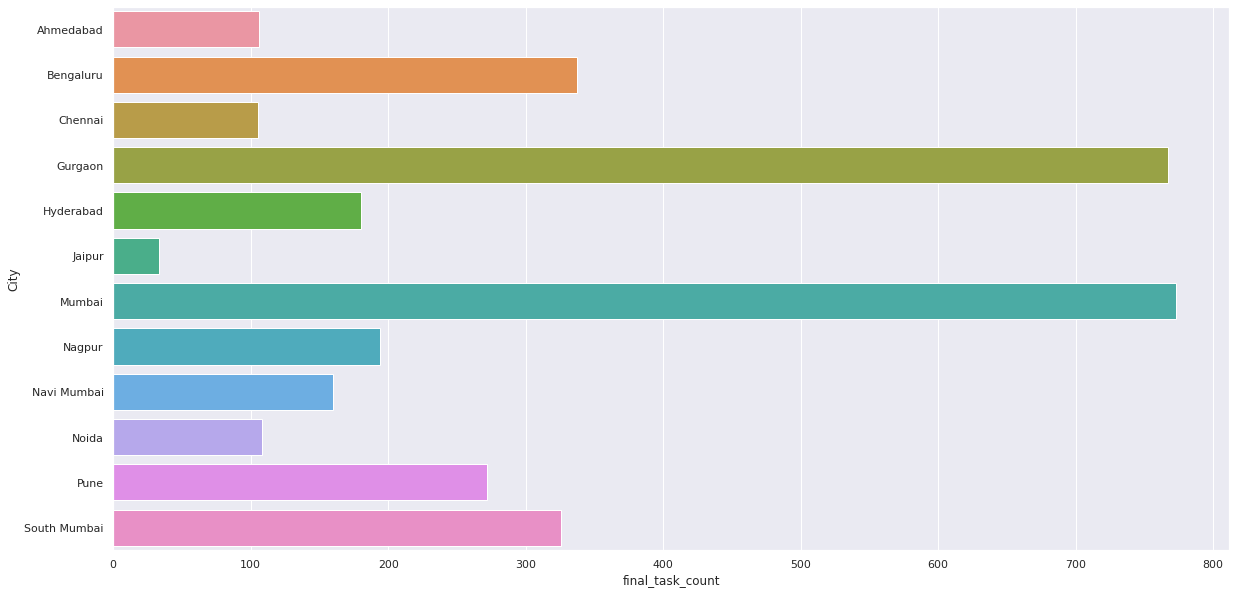

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(x = 'final_task_count',y = 'City', data = usage_summery,ci =None,estimator = max)
plt.show()

In [ ]:
px.pie(usage,usage.groupby('City').sum().index, usage.groupby('City').sum().final_meet_count, title = 'City wise Meeting Count',labels='City')

No handles with labels found to put in legend.


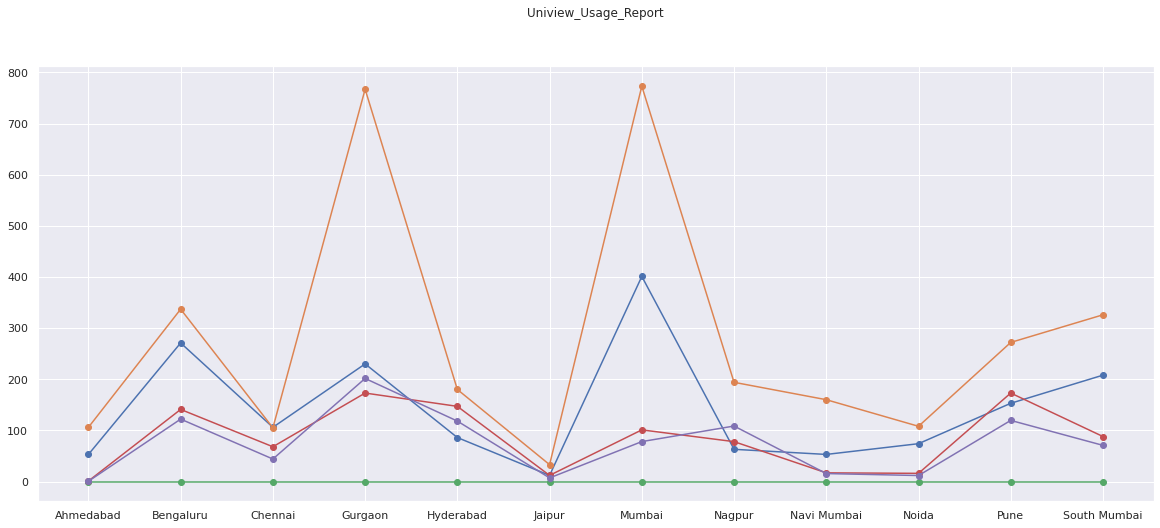

In [ ]:
fig = plt.figure(figsize= (20,8))
ax1 = plt.subplot(111)
ax1.plot(usage_summery.City, usage_summery.final_meet_count,'o-')
ax1.plot(usage_summery.City, usage_summery.final_task_count,'o-')
ax1.plot(usage_summery.City, usage_summery['Total Leads'],'o-')
ax1.plot(usage_summery.City, usage_summery['Total Calls Dialled'],'o-')
ax1.plot(usage_summery.City, usage_summery['Agent Talk Time (in Mins)'],'o-') 

ax1.legend(bbox_to_anchor = (0.84,1.1), frameon = False, ncol=10)
plt.title("Uniview_Usage_Report", y=1.1)      
plt.show()

#**Distance MTD**

In [ ]:
def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce')

def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.date


DumpDate = "01 January 2021"
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/"

In [ ]:
DumpDate = "01 September 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Sep 2021/"
Aug = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Aug[['day','first_time','last_time']] = Aug[['day','first_time','last_time']].apply(changeDateTimeFormat)
Aug['num_points'] = Aug['last_time'] - Aug['first_time']
Aug['num_points'] = (Aug['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Aug['total_distance'] = Aug['total_distance'].round(2)

Aug.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Aug = Aug[['Emp_Email','Date','total_distance','num_points']]
Aug['Emp_Email'] = Aug['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 October 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Oct 2021/"
Sep = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Sep[['day','first_time','last_time']] = Sep[['day','first_time','last_time']].apply(changeDateTimeFormat)
Sep['num_points'] = Sep['last_time'] - Sep['first_time']
Sep['num_points'] = (Sep['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Sep['total_distance'] = Sep['total_distance'].round(2)

Sep.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Sep = Sep[['Emp_Email','Date','total_distance','num_points']]
Sep['Emp_Email'] = Sep['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 November 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/"
Oct = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Oct[['day','first_time','last_time']] = Oct[['day','first_time','last_time']].apply(changeDateTimeFormat)
Oct['num_points'] = Oct['last_time'] - Oct['first_time']
Oct['num_points'] = (Oct['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Oct['total_distance'] = Oct['total_distance'].round(2)

Oct.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Oct = Oct[['Emp_Email','Date','total_distance','num_points']]
Oct['Emp_Email'] = Oct['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 December 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Dec 2021/"
Nov = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Nov[['day','first_time','last_time']] = Nov[['day','first_time','last_time']].apply(changeDateTimeFormat)
Nov['num_points'] = Nov['last_time'] - Nov['first_time']
Nov['num_points'] = (Nov['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Nov['total_distance'] = Nov['total_distance'].round(2)

Nov.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Nov = Nov[['Emp_Email','Date','total_distance','num_points']]
Nov['Emp_Email'] = Nov['Emp_Email'].str.lower().replace(" ", "")



DumpDate = "01 January 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/"
Dec = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Dec[['day','first_time','last_time']] = Dec[['day','first_time','last_time']].apply(changeDateTimeFormat)
Dec['num_points'] = Dec['last_time'] - Dec['first_time']
Dec['num_points'] = (Dec['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Dec['total_distance'] = Dec['total_distance'].round(2)

Dec.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Dec = Dec[['Emp_Email','Date','total_distance','num_points']]
Dec['Emp_Email'] = Dec['Emp_Email'].str.lower().replace(" ", "")


today = date.today()
DumpDate_1 = today.strftime("%d %B %Y")
dump_name = 'Agent Distances MTD'

file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/"
#Jan = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/18 January 2022/Hari/Agent Distances MTD.csv"
Jan = pd.read_csv(file_path + DumpDate_1 + "/Hari/"+ dump_name +".csv",parse_dates=True)
Jan[['day','first_time','last_time']] = Jan[['day','first_time','last_time']].apply(changeDateTimeFormat)
Jan['num_points'] = Jan['last_time'] - Jan['first_time']
Jan['num_points'] = (Jan['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Jan['total_distance'] = Jan['total_distance'].round(2)

Jan.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Jan = Jan[['Emp_Email','Date','total_distance','num_points']]
Jan['Emp_Email'] = Jan['Emp_Email'].str.lower().replace(" ", "")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

FileNotFoundError: ignored

In [ ]:
DumpDate_1

In [ ]:
Distance=Aug.append(Sep)
Distance=Distance.append(Oct)
Distance=Distance.append(Nov)
Distance=Distance.append(Dec)
Distance=Distance.append(Jan)

In [ ]:
  Hr = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet3 = Hr.get_worksheet(2)
Hr1 = pd.DataFrame(sheet3.get_all_records())

Hr1 = Hr1[['Emp Code','Employee Name','Official Email ID','Role','On Field Status','Status','Location']]


Hr1 = Hr1[Hr1['Status']=="Active"]
Hr1 = Hr1[Hr1['On Field Status'] == "On Field"]

Hr1 = Hr1[(Hr1['Role'] == "ASM") | (Hr1['Role'] == "AASM") | (Hr1['Role'] == "Senior TSM") | (Hr1['Role'] == "TSM") | (Hr1['Role'] == "ASM IC") | (Hr1['Role'] == "Senior ASM")
| (Hr1['Role'] == "KAM")| (Hr1['Role'] == "Senior KAM")| (Hr1['Role'] == "FSD Executive")| (Hr1['Role'] == "Senior FSD Executive")]
Hr1 = Hr1.rename(columns={'Official Email ID':'Emp_Email'})
Hr1
Hr2 = Hr1[['Emp_Email','Role','Location']]
Hr2['Emp_Email'] = Hr2['Emp_Email'].str.lower()

In [ ]:
Distance = pd.merge(Hr2,Distance,how='left',left_on='Emp_Email',right_on='Emp_Email')
Distance_1 = Distance.groupby(['Date','Role','Location'],sort=True, as_index=False).agg({'Emp_Email':'count','total_distance':'sum','num_points':'sum'})
Distance_1['Year'] = pd.DatetimeIndex(Distance_1['Date']).year
Distance_1['Month'] = pd.DatetimeIndex(Distance_1['Date']).month
Distance_1['day'] = pd.DatetimeIndex(Distance_1['Date']).day
Distance_1 = Distance_1.rename(columns={'Location':'City','Emp_Email':'Emp Email ID'})

In [ ]:
Distance_1 = Distance_1[['Role','Date','City','num_points','total_distance','Emp Email ID','day','Month','Year']]
Distance_1.loc[Distance_1['City'] == 'Bengaluru','City'] = 'Bangalore'
Distance_1

In [ ]:
from gspread_dataframe import get_as_dataframe, set_with_dataframe

spreadSheetId = "1-OGpSnP-Ok5FgQ7G2Rn_1OTqGal5EcI-xfuGD1BV9wo"
rangeName = "Distance_Group"

column = 1
row = 1

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)

#Clearing Sheet
ws.clear()

#Writting to sheet
set_with_dataframe(ws, Distance_1, row=row, col=column, include_index=False, include_column_header=True)